### ABSTRACT

Data mining solutions have been used for predictions of responses within the framework of developing new vaccines and serological tests for infectious diseases. Using training dataset for training the model and another hold-out dataset for predicting responses.  The data was splitted into two equal parts for training and testing.  The point at which the data  set was splitted and how it was splitted during data-pre-processing was very crucial to avoid data leakage and overfitting.  Fifteen features were selected using the principal components analysis. The training data was deployed to pipeline from sklearn library, this allows a number of processes to be carried out at the same time and presents a more organised display of methodology adopted. This was applied from data reprocessing, data scaling, dimensionality reduction using principal component analysis and all the respective models used for training the data were fitted in the pipeline.  Models accuracy were examined at three different times. First was prio to balancing the dataset, the second was after balancing the dataset and lastly after performing parameters tuning. The model with the highest accuracy was finally evaluated using confusion matrix with the F1-scores.

### INTRODUCTION

The motivation of this work was to elicit whether responses will be positive or negative in the unseen data.  Two data sets were provided; one for model development and the second for validation of the model. The data set contains the same features and data points except for the hold out set which was missing the target variable and was meant to be predicted by deploying the model after training.  The same process applies in preparing the two sets of data, except that the hold out data was only used for predictions.
The complete solution to the task shall be explained in the following headings:
Data Exploration: Data Viewing,	Statistical Summary and Visualization.  Data Quality and Cleaning, Data pre-processing, data scaling, dimensional reduction and Model deployment, model evaluation, data balancing, prediction of unseen data and conclusion.


#### DATA EXPPLORATION

The data sets(training and hold-out set) was explored through pandas modules by importing the CSV files, the initial  view, reveals the followings: 

TRAINING DATASET

•	The dataset is made up of 3 categorical values and 66  numeric values
•	The data set consists of 15,000 Observations and 69 input variabless in the columns.
•	Total count values in all the rows are 1,035,000 of which there are 997,530 real values and 37470 missing or NAN values
•	The missing values account for 3.6% of the total count value and duplicates account for 0.6%. Please see below codes for features with missing values and duplicates values.

HoLDING DATASET

•	The dataset is made up of categorical values and 66 numerical values. 15,000 Observations and 68 input variables or features.  •	The total count values are 1020,000, of which 982643 is real value while 37357 are missing values and 0.7% duplicates this accounts for 3.66% of total values.  See code  below codes for features with missing values.

Import and read the two dataset

In [1]:
import pandas as pd
df =pd.read_csv('CW_ModelDevelopment.csv')# Training set
Val_df =pd.read_csv('CW_Holdout(1).csv')# Hold-out set


Let's have a look at the dataset

In [2]:
df.head()

ID  Epitope       PP1       PP2       PP3       KF1       KF2  \
0  LDRLFNKKKELGQDK  E-10004  0.220667 -0.172667  0.055333 -0.175333  0.232667   
1  LKLDRLFNKKKELGQ  E-10004  0.094000 -0.111333  0.106000 -0.283333  0.247333   
2  NKYKLKLDRLFNKKK  E-10004  0.253333  0.012667  0.302000 -0.060667  0.552667   
3  RLFNKKKELGQDKMQ  E-10004  0.211333 -0.133333  0.107333 -0.269333  0.275333   
4  YKLKLDRLFNKKKEL  E-10004  0.161333  0.010000  0.152000 -0.280000  0.515333   

        KF3       KF4       KF5  ...   BLOSUM5   BLOSUM6   BLOSUM7   BLOSUM8  \
0 -0.378667  0.565333  0.084000  ...  0.127333  0.252667 -0.113333  0.211333   
1 -0.289333  0.438000  0.108667  ...  0.195333  0.274667  0.002000  0.186000   
2 -0.140667  0.614000  0.370000  ...  0.324667  0.220000  0.052667  0.043333   
3 -0.280667  0.609333  0.388667  ...  0.240667  0.248667 -0.038000  0.193333   
4 -0.240667  0.451333  0.131333  ...  0.245333  0.175333 -0.019333  0.106667   

    BLOSUM9  BLOSUM10   MSWHIM1   MSWHIM2   MSWHIM3     Class  
0 -0.048667 -0.317333 -0.208667  0.142000 -0.072667  Negative  
1 -0.068000 -0.300000 -0.265333  0.256667 -0.019333  Negative  
2 -0.124667 -0.518667 -0.225333  0.254667  0.089333  Negative  
3 -0.021333 -0.228667 -0.193333  0.294000 -0.039333  Negative  
4 -0.034667 -0.434000 -0.234000  0.258000  0.080000  Negative  

[5 rows x 69 columns]

In [3]:
Val_df.head()# Hold-out set

ID  Epitope       PP1       PP2       PP3       KF1       KF2  \
0  EEEIAQVATVSSNGD  E-43592  0.060000 -0.606000 -0.144667 -0.339333 -0.614667   
1  KNEEEIAQVATVSSN  E-43592  0.146667 -0.511333 -0.042667 -0.422000 -0.419333   
2  KNSSPVKNEEEIAQV  E-43592  0.170000 -0.438000 -0.026000 -0.220667 -0.228667   
3  PVKNEEEIAQVATVS  E-43592 -0.056000 -0.474000 -0.096000 -0.464000 -0.412000   
4  SSPVKNEEEIAQVAT  E-43592  0.038000 -0.500000 -0.048667 -0.360667 -0.436667   

        KF3       KF4       KF5  ...   BLOSUM4   BLOSUM5   BLOSUM6   BLOSUM7  \
0 -0.082000  0.362000 -0.359333  ...  0.061333 -0.177333  0.276667 -0.198667   
1  0.015333  0.486000 -0.190000  ...  0.033333 -0.012000  0.258667 -0.159333   
2 -0.092667  0.525333  0.040000  ... -0.080667 -0.057333  0.092667 -0.112667   
3  0.072000  0.327333 -0.096000  ... -0.109333 -0.156000  0.043333 -0.100667   
4 -0.053333  0.382000 -0.143333  ... -0.092000 -0.102667  0.068667 -0.100667   

    BLOSUM8   BLOSUM9  BLOSUM10   MSWHIM1   MSWHIM2   MSWHIM3  
0 -0.087333  0.382667  0.218667 -0.372667  0.242000 -0.555333  
1 -0.210000  0.324000  0.155333 -0.384000  0.346000 -0.445333  
2 -0.090667  0.207333  0.052667 -0.359333  0.330000 -0.344667  
3 -0.140667  0.351333  0.194000 -0.435333  0.393333 -0.413333  
4 -0.195333  0.376000  0.144667 -0.422000  0.381333 -0.441333  

[5 rows x 68 columns]

In [4]:
print("Training Set Shape:", df.shape)#Training Dataset
print("Hold-Out Set Shape:", Val_df.shape)# Hold-out set

Training Set Shape: (15000, 69)
Hold-Out Set Shape: (15000, 68)


Check data type

In [5]:
df.info()# Training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 69 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        15000 non-null  object 
 1   Epitope   15000 non-null  object 
 2   PP1       15000 non-null  float64
 3   PP2       15000 non-null  float64
 4   PP3       15000 non-null  float64
 5   KF1       15000 non-null  float64
 6   KF2       15000 non-null  float64
 7   KF3       15000 non-null  float64
 8   KF4       15000 non-null  float64
 9   KF5       15000 non-null  float64
 10  KF6       7307 non-null   float64
 11  KF7       15000 non-null  float64
 12  KF8       15000 non-null  float64
 13  KF9       7307 non-null   float64
 14  KF10      7307 non-null   float64
 15  Z1        15000 non-null  float64
 16  Z2        15000 non-null  float64
 17  Z3        15000 non-null  float64
 18  Z4        15000 non-null  float64
 19  Z5        15000 non-null  float64
 20  F1        1186 non-null   fl

In [6]:
Val_df.info() # Hold out set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 68 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        15000 non-null  object 
 1   Epitope   15000 non-null  object 
 2   PP1       15000 non-null  float64
 3   PP2       15000 non-null  float64
 4   PP3       15000 non-null  float64
 5   KF1       15000 non-null  float64
 6   KF2       15000 non-null  float64
 7   KF3       15000 non-null  float64
 8   KF4       15000 non-null  float64
 9   KF5       15000 non-null  float64
 10  KF6       7333 non-null   float64
 11  KF7       15000 non-null  float64
 12  KF8       15000 non-null  float64
 13  KF9       7333 non-null   float64
 14  KF10      7333 non-null   float64
 15  Z1        15000 non-null  float64
 16  Z2        15000 non-null  float64
 17  Z3        15000 non-null  float64
 18  Z4        15000 non-null  float64
 19  Z5        15000 non-null  float64
 20  F1        1214 non-null   fl

Check data value count for real values

In [7]:
import numpy as np
# This sum the total real values which are not NAN
np.sum(df.count())# Training Set

997530

In [8]:
# This sum the total real values which are not NAN
np.sum(Val_df.count()) # Hold-out Set

982643

Check missing Values

In [9]:
# To ascertain total Missing Values
df.isnull().values.sum()# Training set

37470

In [10]:
# To ascertain total Missing Values
Val_df.isnull().values.sum()# Hold-out set

37357

Check features with missing values

In [11]:
#For getting Columns having at least 1 null value. (column names)
df[df.columns[df.isnull().any()]].isnull().sum()# Training set
#df.nunique()

KF6      7693
KF9      7693
KF10     7693
F1      13814
T2        496
ST7        81
dtype: int64

In [12]:
Val_df[Val_df.columns[Val_df.isnull().any()]].isnull().sum() #Hold-out set

KF6      7667
KF9      7667
KF10     7667
F1      13786
T2        504
ST7        66
dtype: int64

o	The  “CLASS” variables consist of two labels

In [13]:
df['Class'].unique()

array(['Negative', 'Positive'], dtype=object)

#### STATISTICAL SUMMARY

In [14]:
# Training dataset  -  provides a statistical summary of all the quantitative variables.

df.describe() #Training set

PP1           PP2           PP3           KF1           KF2  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      -0.029791     -0.330619      0.017339     -0.098073     -0.188606   
std        0.231596      0.140761      0.155524      0.312390      0.310534   
min       -0.946000     -0.820000     -0.561333     -1.141333     -1.404000   
25%       -0.174167     -0.422667     -0.082000     -0.318000     -0.389333   
50%       -0.025333     -0.329333      0.018000     -0.112667     -0.174000   
75%        0.130667     -0.232000      0.117333      0.098667      0.030833   
max        0.828667      0.236000      0.547333      1.204667      0.684000   

                KF3           KF4           KF5          KF6           KF7  \
count  15000.000000  15000.000000  15000.000000  7307.000000  15000.000000   
mean      -0.054056      0.183694     -0.061103    -0.346425      0.013009   
std        0.269177      0.272455      0.237663     0.258922      0.273176   
min       -0.940667     -0.925333     -0.894667    -1.296000     -0.986000   
25%       -0.230667      0.002667     -0.226000    -0.514333     -0.171333   
50%       -0.054667      0.186000     -0.062667    -0.344667      0.019333   
75%        0.126000      0.360000      0.096000    -0.173333      0.200667   
max        0.816000      1.081333      0.797333     0.890667      0.851333   

       ...       BLOSUM4       BLOSUM5       BLOSUM6       BLOSUM7  \
count  ...  15000.000000  15000.000000  15000.000000  15000.000000   
mean   ...      0.015691     -0.048088      0.166925      0.003909   
std    ...      0.174066      0.165061      0.180068      0.198216   
min    ...     -0.556667     -0.665333     -0.954667     -0.723333   
25%    ...     -0.097333     -0.161333      0.067333     -0.139333   
50%    ...      0.016667     -0.046000      0.183333     -0.013333   
75%    ...      0.130667      0.061333      0.282667      0.140667   
max    ...      0.582000      0.835333      0.703333      0.716667   

            BLOSUM8       BLOSUM9      BLOSUM10       MSWHIM1       MSWHIM2  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      -0.052832      0.103248     -0.022130     -0.296229      0.350006   
std        0.189105      0.174482      0.145108      0.151192      0.145278   
min       -0.910000     -0.503333     -0.554000     -0.824667     -0.475333   
25%       -0.160000     -0.006667     -0.118667     -0.402667      0.260000   
50%       -0.032333      0.103333     -0.019333     -0.304667      0.353333   
75%        0.083333      0.220000      0.075333     -0.195333      0.447333   
max        0.459333      0.745333      0.422667      0.271333      0.799333   

            MSWHIM3  
count  15000.000000  
mean      -0.368621  
std        0.161714  
min       -0.880000  
25%       -0.484667  
50%       -0.381333  
75%       -0.254667  
max        0.130667  

[8 rows x 66 columns]

In [15]:
# Hold-out set dataset  -  provides a statistical summary of all the quantitative variables.
Val_df.describe() #Hold-out set

PP1           PP2           PP3           KF1           KF2  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      -0.027272     -0.350294      0.041833     -0.011050     -0.234883   
std        0.229832      0.148602      0.157315      0.324380      0.312703   
min       -0.946000     -0.820000     -0.561333     -1.038000     -1.546667   
25%       -0.176000     -0.448000     -0.058667     -0.238667     -0.436667   
50%       -0.018000     -0.351333      0.038000     -0.031333     -0.226000   
75%        0.129333     -0.247333      0.140000      0.196000     -0.009333   
max        0.733333      0.130667      0.672667      1.208667      0.770000   

                KF3           KF4           KF5          KF6           KF7  \
count  15000.000000  15000.000000  15000.000000  7333.000000  15000.000000   
mean       0.010309      0.179198     -0.067669    -0.295431     -0.043051   
std        0.278223      0.269635      0.238277     0.251116      0.276280   
min       -0.882000     -0.925333     -0.961333    -1.274000     -1.226000   
25%       -0.184667      0.005333     -0.235333    -0.458667     -0.230667   
50%        0.014667      0.182667     -0.070000    -0.293333     -0.042000   
75%        0.200667      0.351333      0.096667    -0.132000      0.151333   
max        0.987333      1.081333      0.901333     0.890667      0.870667   

       ...       BLOSUM4       BLOSUM5       BLOSUM6       BLOSUM7  \
count  ...  15000.000000  15000.000000  15000.000000  15000.000000   
mean   ...      0.019797     -0.045621      0.147042      0.023576   
std    ...      0.180067      0.171484      0.201072      0.191422   
min    ...     -0.556667     -0.665333     -0.954667     -0.637333   
25%    ...     -0.095333     -0.160000      0.044667     -0.110000   
50%    ...      0.026000     -0.046667      0.169333      0.011333   
75%    ...      0.136833      0.063333      0.278000      0.152667   
max    ...      0.876667      0.835333      0.730000      0.786667   

            BLOSUM8       BLOSUM9      BLOSUM10       MSWHIM1       MSWHIM2  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      -0.116409      0.110078     -0.005476     -0.309021      0.384943   
std        0.209986      0.178573      0.139475      0.156889      0.145837   
min       -0.941333     -0.503333     -0.554000     -0.824667     -0.333333   
25%       -0.225333     -0.004667     -0.098667     -0.422667      0.294667   
50%       -0.089333      0.110667     -0.002667     -0.316667      0.393333   
75%        0.032000      0.224000      0.092667     -0.202000      0.488667   
max        0.459333      0.745333      0.660000      0.262000      0.799333   

            MSWHIM3  
count  15000.000000  
mean      -0.408338  
std        0.165475  
min       -0.880000  
25%       -0.517333  
50%       -0.418000  
75%       -0.302667  
max        0.130667  

[8 rows x 66 columns]

▪Percentiles: -
This was used to calculate the interquartile range(IQR).
The training dataset presents ST4 with the lowest IQR score of 0.126 and the PROTPF2 with the highest IQR score of 1.705. This cannot be used for all the data, rather, The IQR was calculated for each features to examine values outside the range. 
The interquartile range was necessary to determine how spread out the middle values are, and used to determine values that are far apart. This is important to determine outliers. Details is found below under data cleaning as it was calculated and used to clean the data of outliers.

▪Measure of central tendency: -
.  The mean of the training dataset has T1 with lowest  -0.4555 and T5 highest 0.636, and has about 65% features having its mean values around the range of  -0.4 to 0.04. This was necessary to determine whether the data are symmetrical.

▪Measure of Spread: -
71% features has it's Standard deviation within  0.094 to 0.3.  this also shows that most of the data are clustered around the mean

#### VISUALIZATION	

##### Visualise the Class Labels

The data set is imbalanced; of the total 15,000 records, 13,046(86.97%) have the outcome “Negative” and 1,954 records(13.03%) have the outcome “Positive”.

In [16]:
df['Class'].value_counts()

Negative    13046
Positive     1954
Name: Class, dtype: int64

In [17]:
# import python modules to undertake the processes
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
#plt.style.use('ggplot')

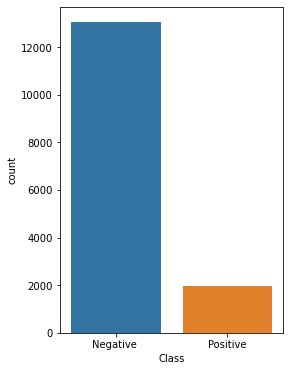

In [18]:
# visualize the target variable
plt.rcParams['figure.figsize'] = (4.0,6.0)
g = sns.countplot(df['Class'])
g.set_xticklabels(['Negative ','Positive'])
plt.show()

The below plots visualizes features against the classs. Most of the festures are of the negative class. Except epitope that have most of its count to be Positive

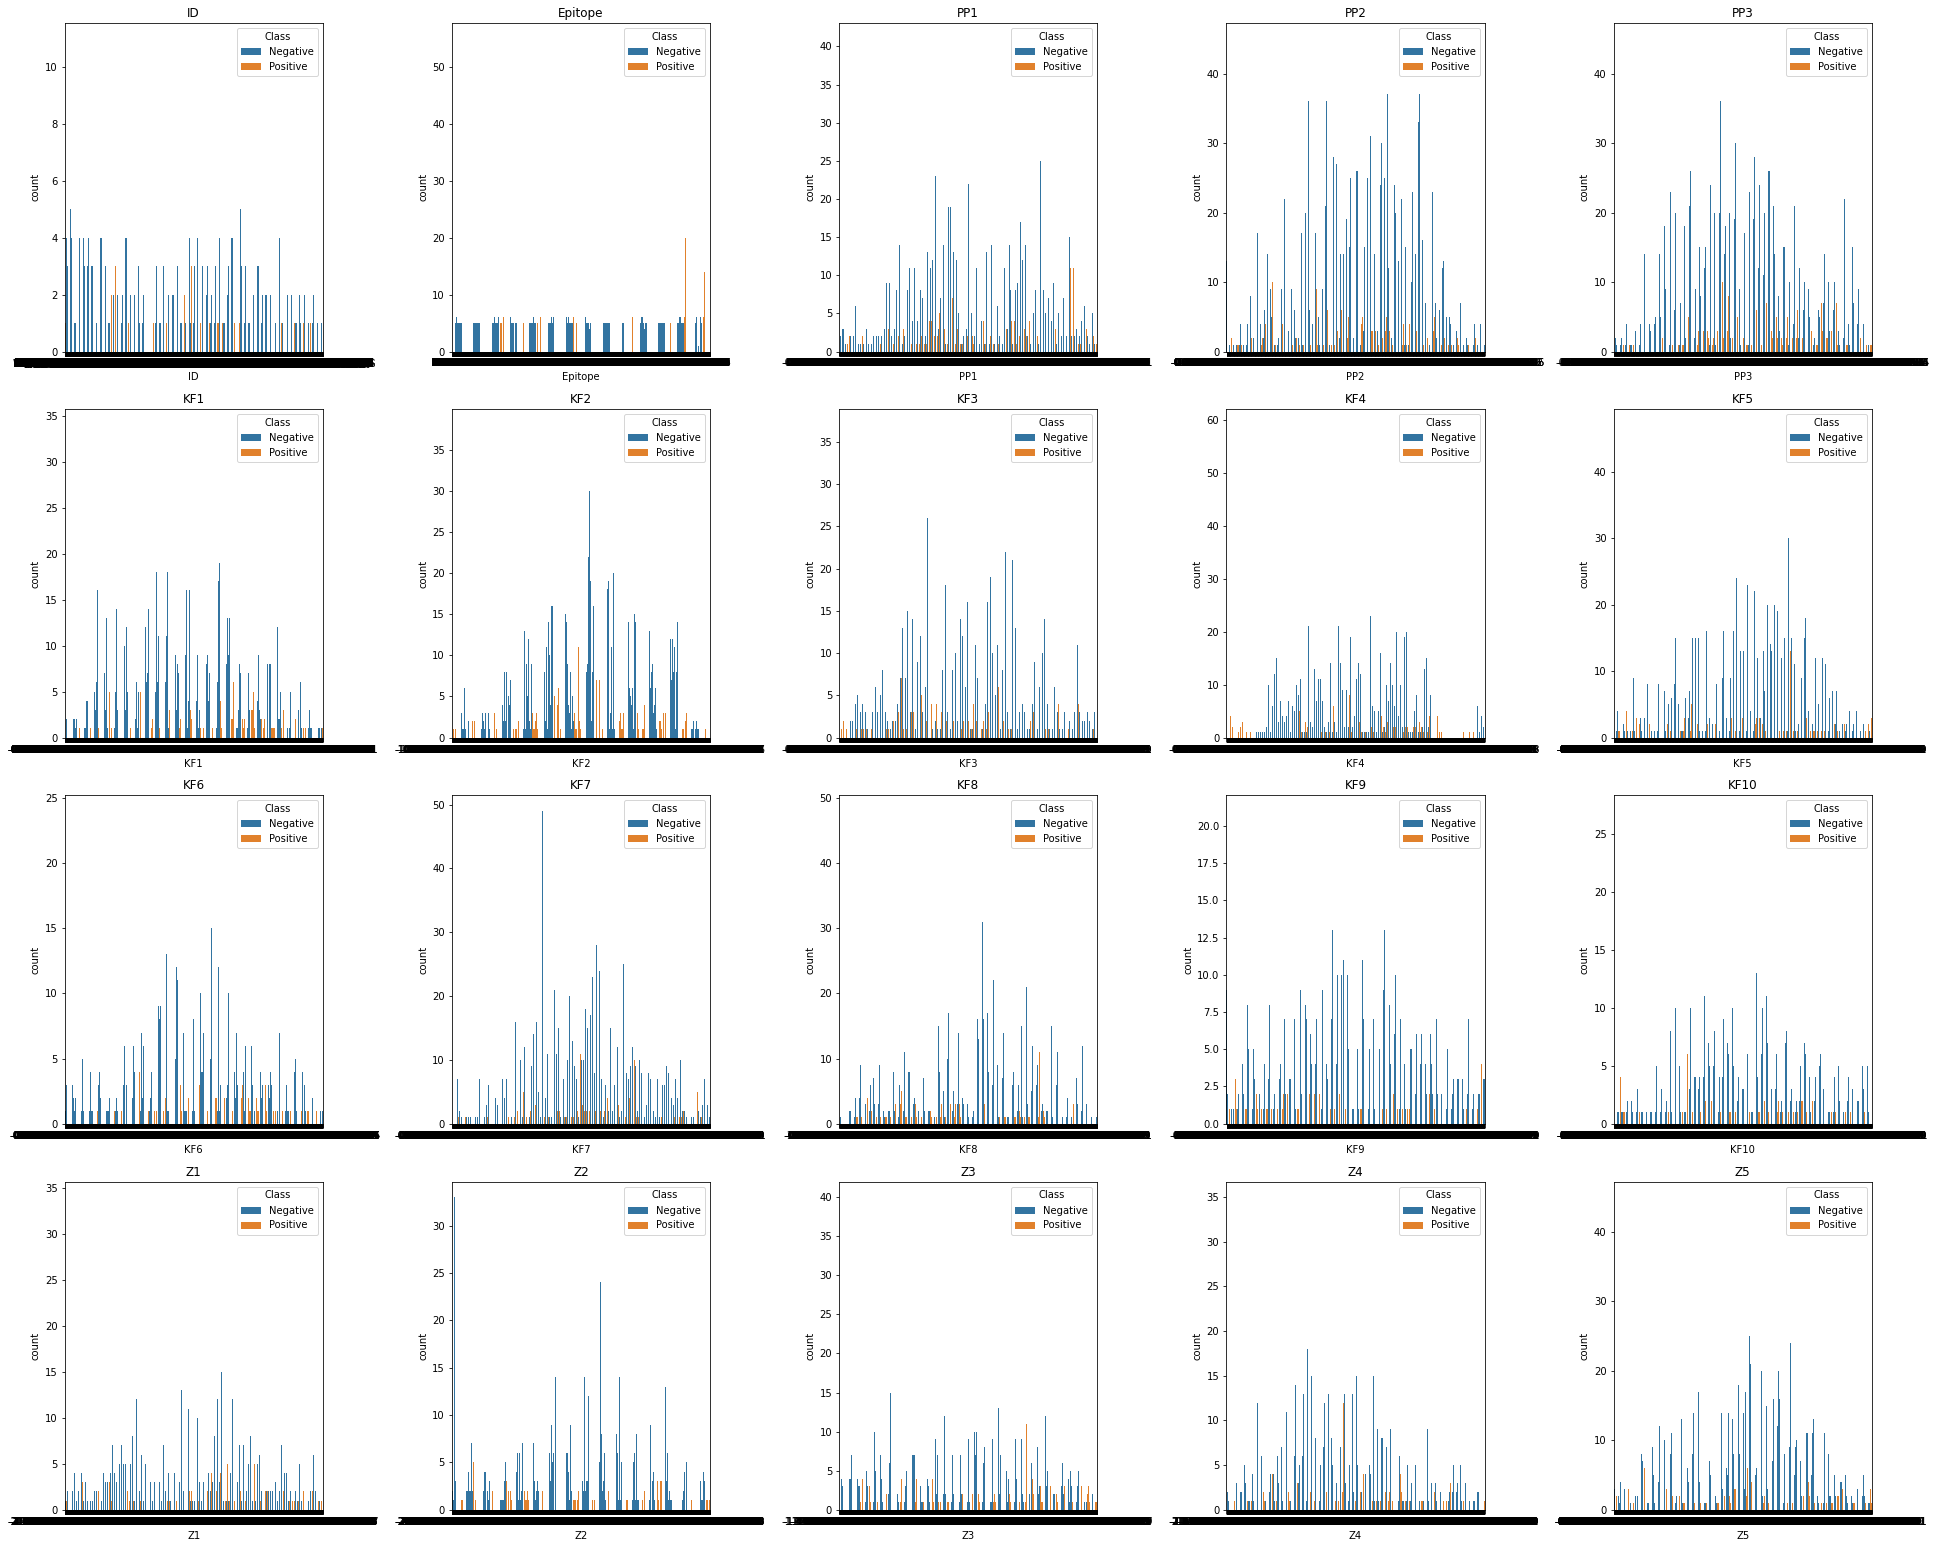

In [19]:
cols=['ID', 'Epitope', 'PP1', 'PP2', 'PP3', 'KF1', 'KF2', 'KF3', 'KF4', 'KF5',
      'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'F1',
     'F2', 'F3', 'F4', 'F5', 'F6', 'T1', 'T2', 'T3', 'T4', 'T5', 'VHSE1',
     'VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8',
     'ProtFP1', 'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP5', 'ProtFP6',
     'ProtFP7', 'ProtFP8', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7',
     'ST8', 'BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6',
     'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'MSWHIM1', 'MSWHIM2',
      'MSWHIM3']
       
n_rows =4
n_cols =5
fig,axs =plt.subplots(n_rows, n_cols,figsize = (n_cols * 5.4, n_rows *5.4))
for r in range(0, n_rows):
    for c in range(0,n_cols):
        
        i =r*n_cols + c # index to go through the number of columns
        ax = axs[r][c]#Show where to position each sub plot
        sns.countplot(df[cols[i]], hue =df['Class'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Class', loc ='upper right')
plt.tight_layout()

The above plot shows all the features have most of the count to be negatives

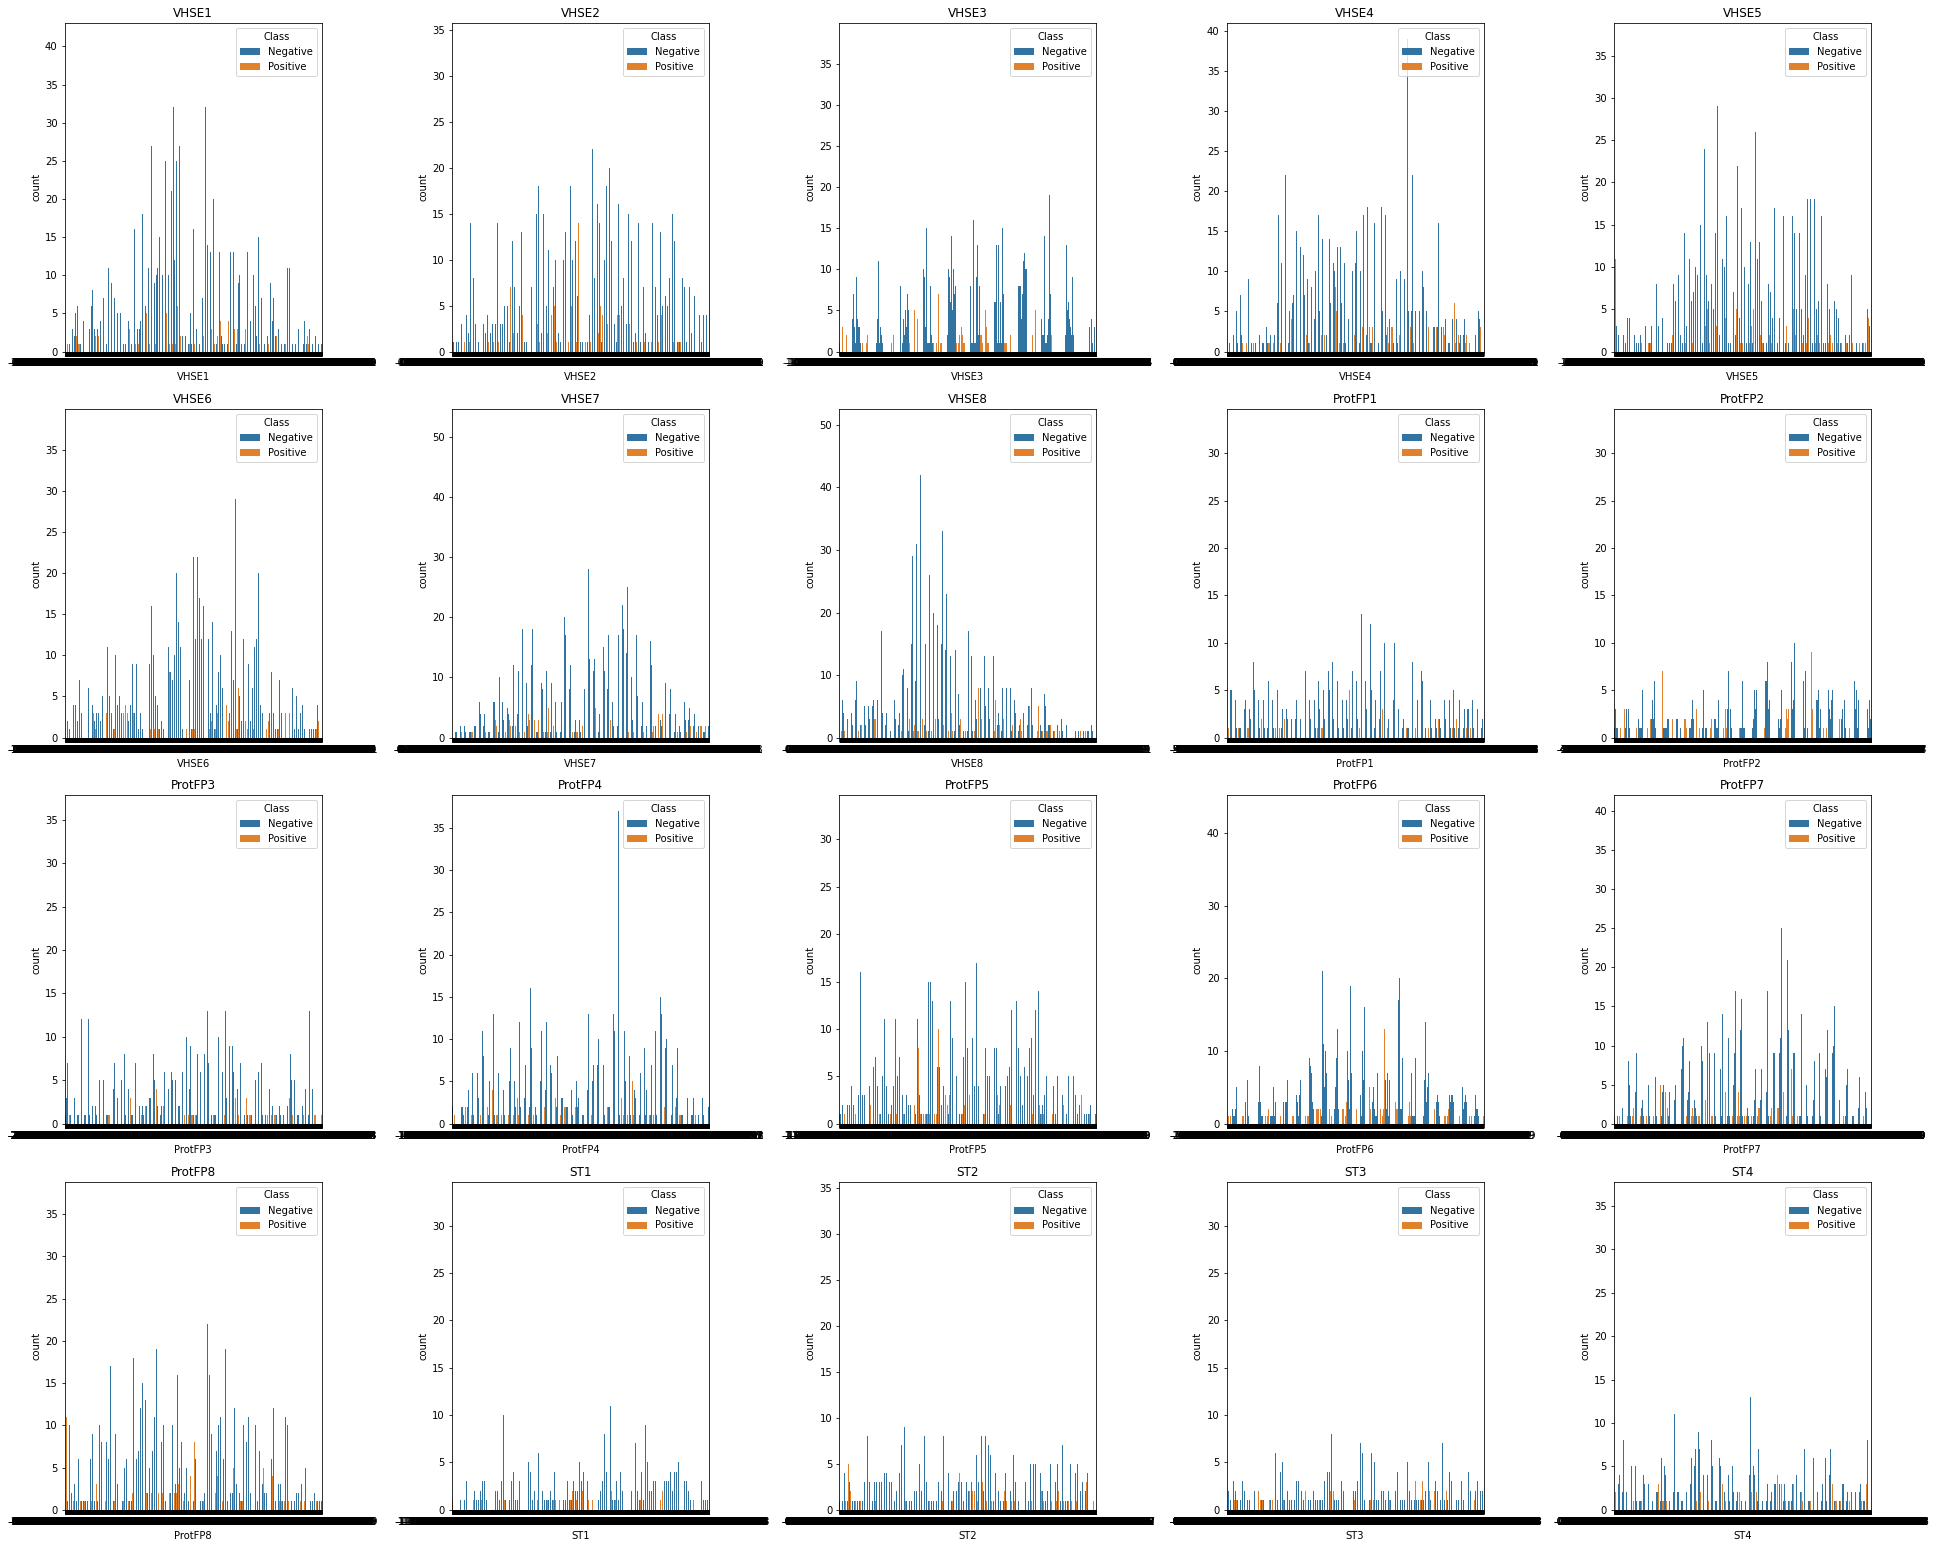

In [21]:
cols=['VHSE1','VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8',
     'ProtFP1', 'ProtFP2', 'ProtFP3', 'ProtFP4', 'ProtFP5', 'ProtFP6',
     'ProtFP7', 'ProtFP8', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7',
     'ST8', 'BLOSUM1', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6',
     'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10', 'MSWHIM1', 'MSWHIM2',
      'MSWHIM3']
       
n_rows =4
n_cols =5
fig,axs =plt.subplots(n_rows, n_cols,figsize = (n_cols * 5.4, n_rows *5.4))
for r in range(0, n_rows):
    for c in range(0,n_cols):
        
        i =r*n_cols + c # index to go through the number of columns
        ax = axs[r][c]#Show where to position each sub plot
        sns.countplot(df[cols[i]], hue =df['Class'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Class', loc ='upper right')
plt.tight_layout()

#### Visualisation of the two dataset

According to the writer of the attached article, skewness between -0.5 and +0.5 shows that the data is centered around the mean. The general visialization of th training data set reveals that most of the features are approximately symmetrical. Except for F5 and VHSE8 which are very skewed and have their values above -1 or+1.   http://web.ipac.caltech.edu/staff/fmasci/home/astro_refs/SkewStatSignif.pdf

visualizing training dataset

Looking at all the features at a glance shows most of the features are symetrical

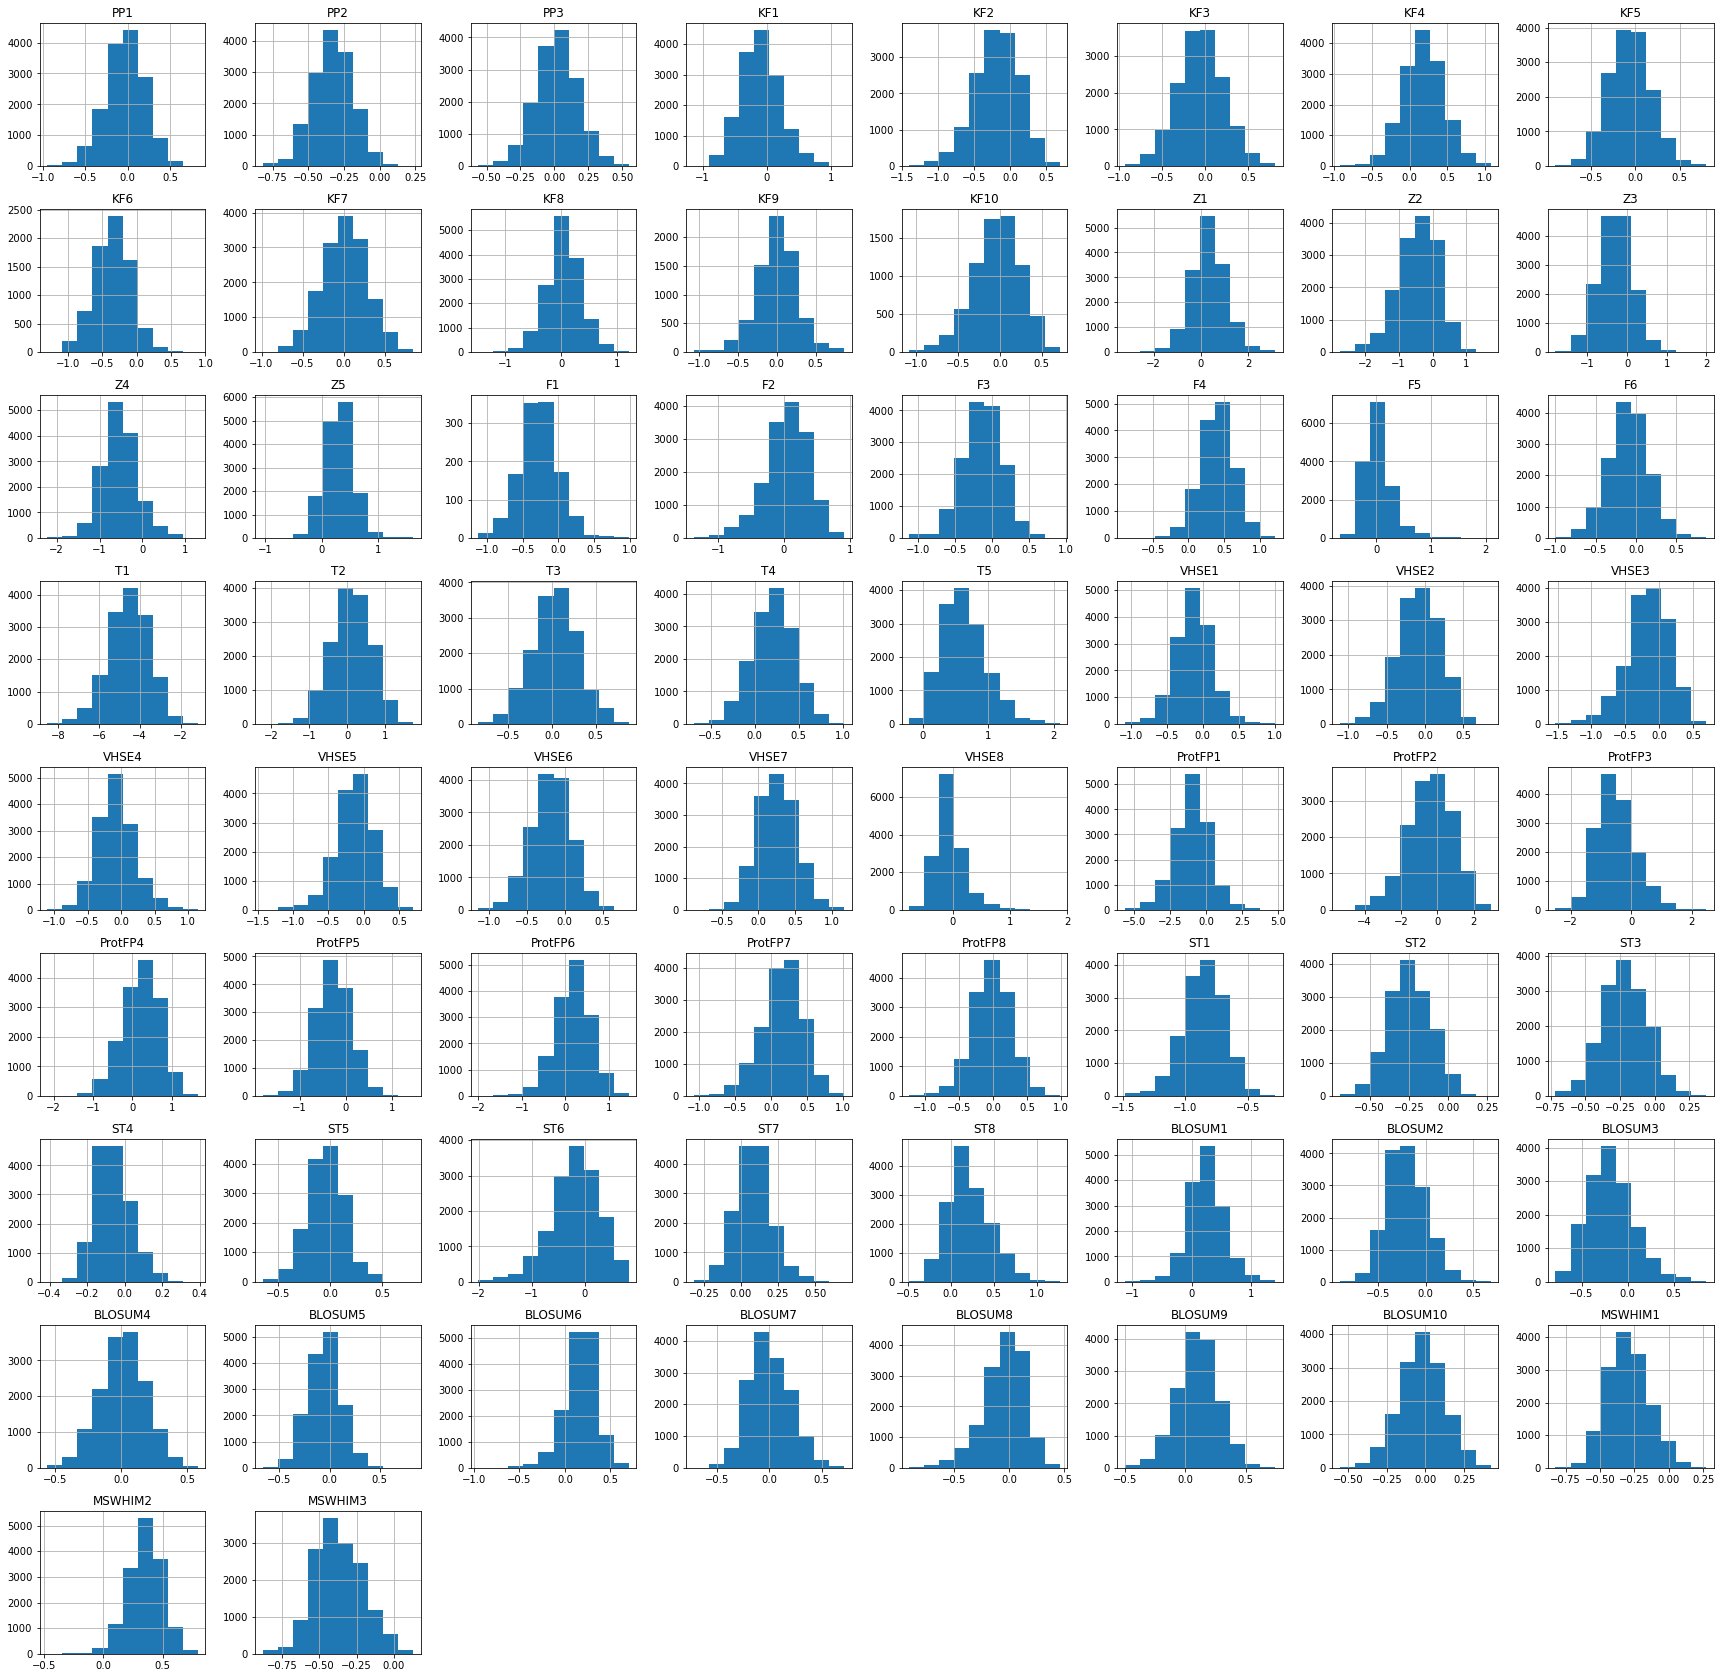

In [22]:
#import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30.0,30.0)
df.hist()
plt.show()

visualizing testing dataset

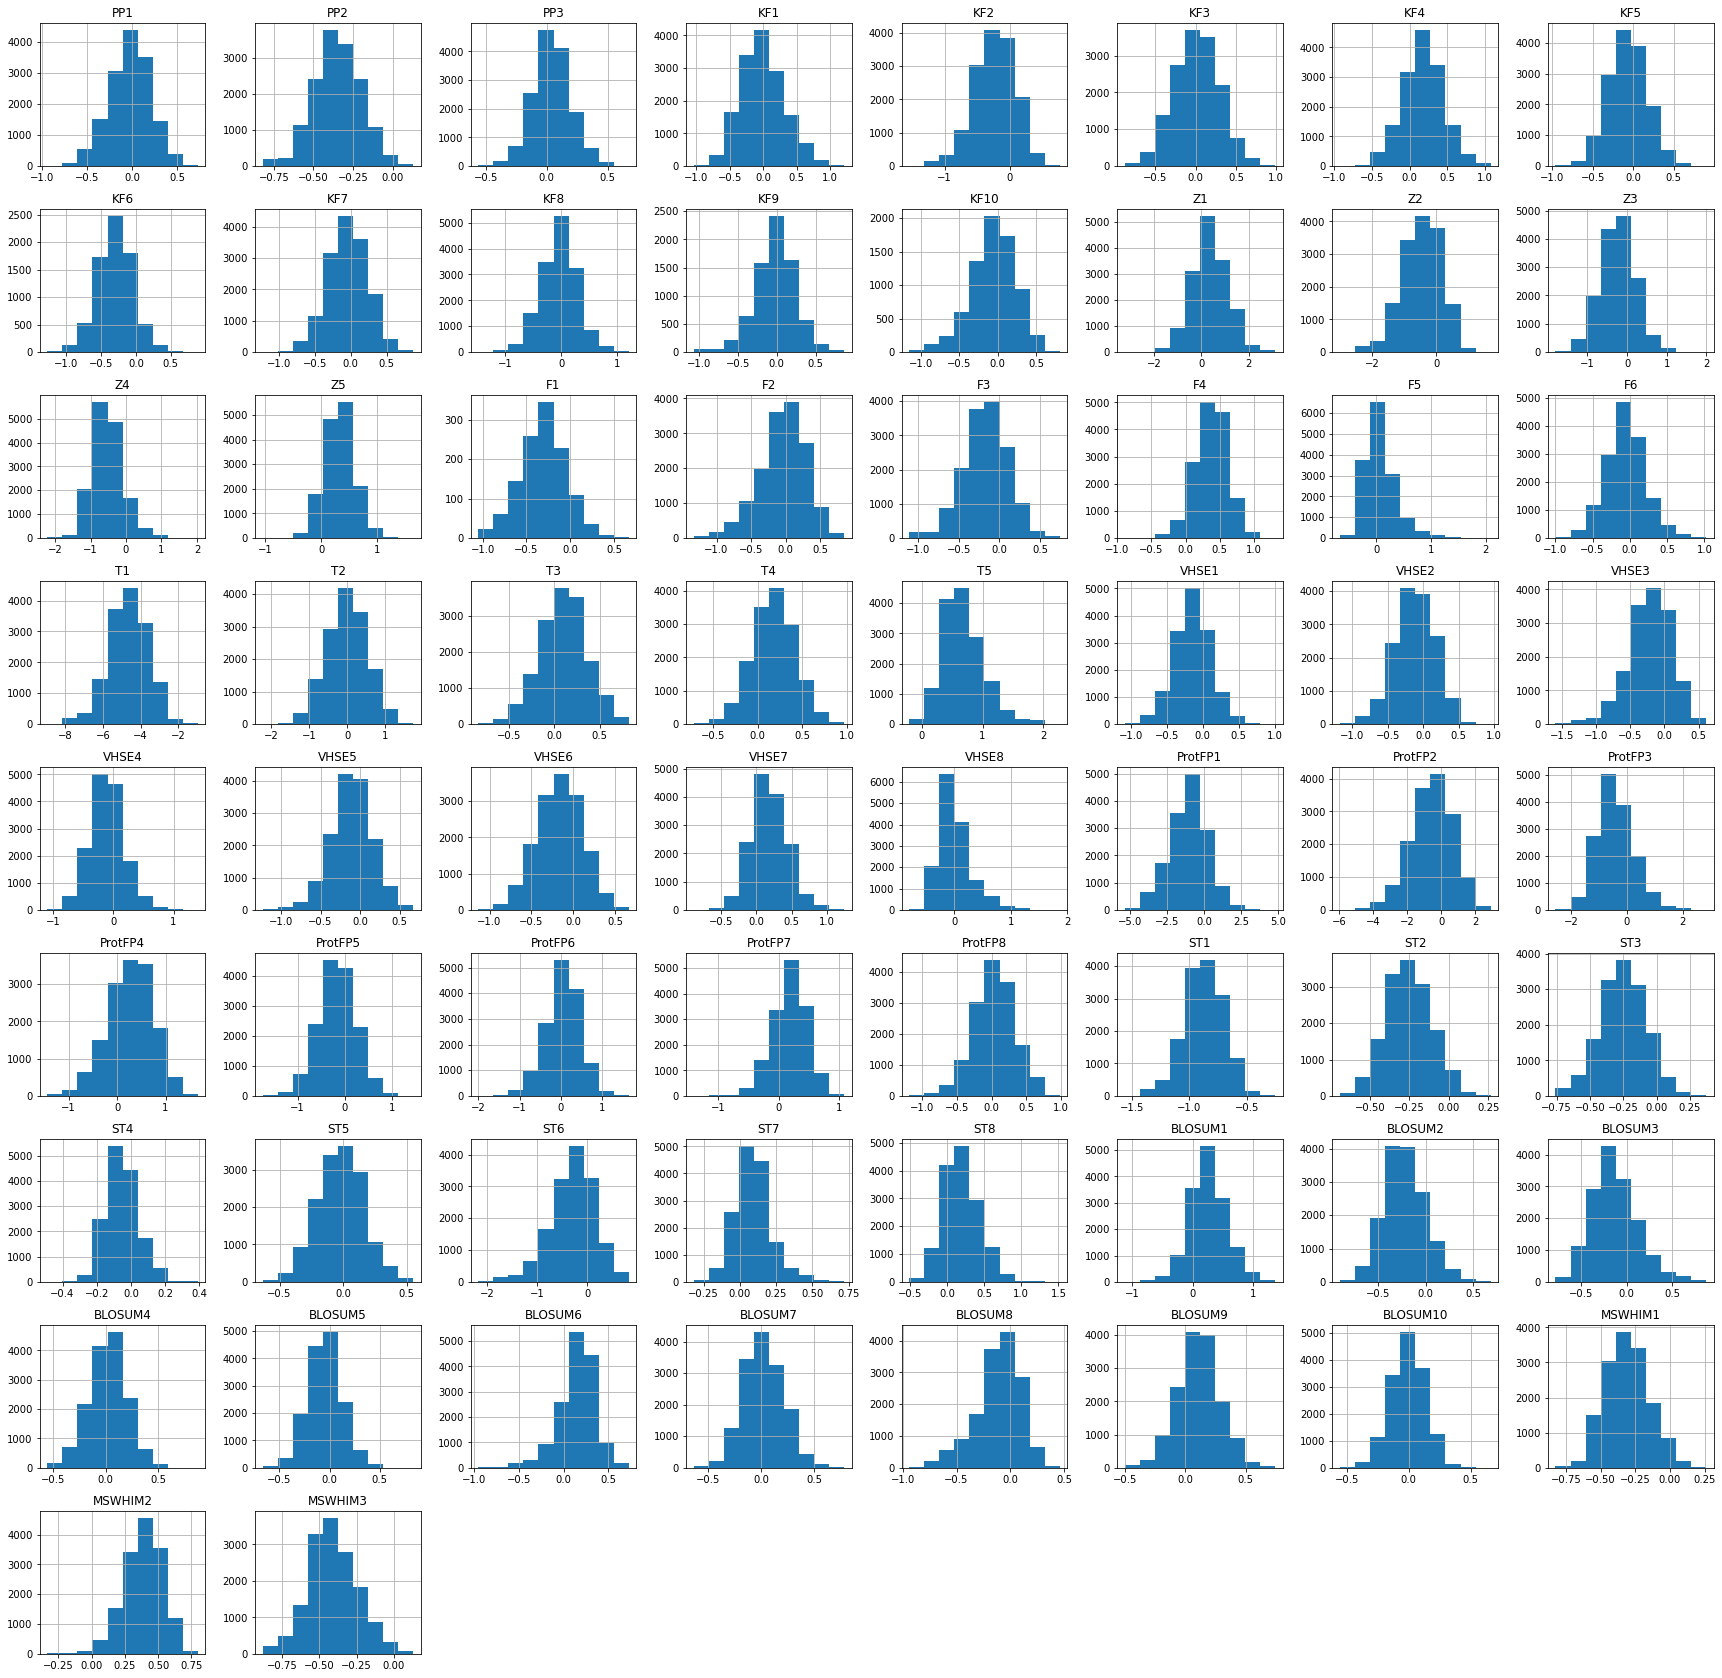

In [23]:
plt.rcParams['figure.figsize'] = (30.0,30.0)
Val_df.hist()
plt.show()

The individual visualization using the boxplot, reveals most of the features have outliers.  Outlier was also confirm using the interquartile range.  See data cleaning below for more details

TRAINNING DATASET-Visualising individual Features for outliers and skewness. The more a feature is skewed, either to the right or left, shows extreme outliers. The skewness value, which explains the extent to which the data is normally distributed Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values. In the data set most of the features are less than 1 but with the mean values, any extreme deviation from the mean values were identify as outliers.  The boxplots reveals majority of the features have outlier.  

-0.18687449629829653
The density of the PP1 data in the distplot lies in the range of -0.25 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers


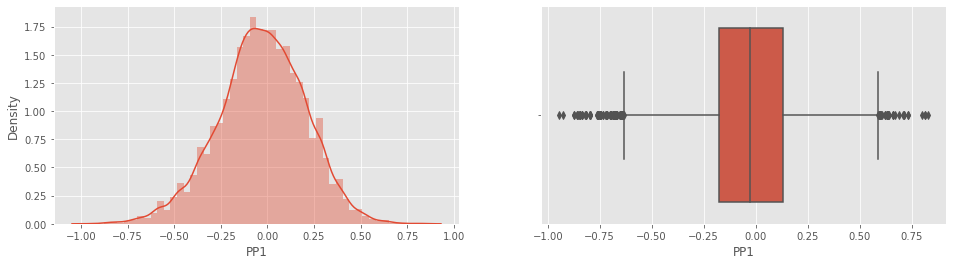

In [24]:
plt.style.use('ggplot')
f=plt.figure(figsize=(16,4))
print(df['PP1'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['PP1'])
f.add_subplot(1,2,2)
sns.boxplot(df['PP1'])
print('The density of the PP1 data in the distplot lies in the range of -0.25 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.135249085575036
The density of the PP2 data in the distplot lies in the range of -0.5 to -0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers


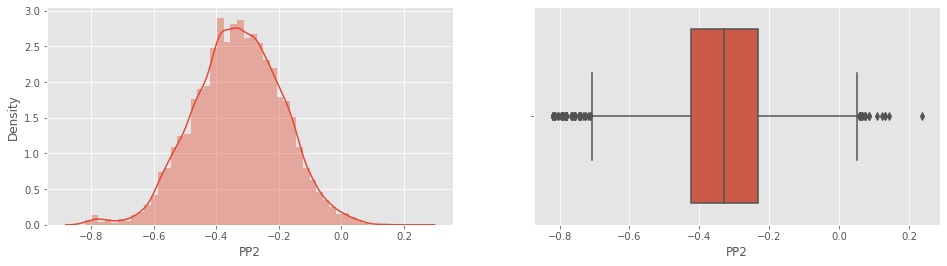

In [25]:
f=plt.figure(figsize=(16,4))
print(df['PP2'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['PP2'])
f.add_subplot(1,2,2)
sns.boxplot(df['PP2'])
print('The density of the PP2 data in the distplot lies in the range of -0.5 to -0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.038167037342448626
The density of the PP3 data in the distplot lies in the range of -0.1 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers


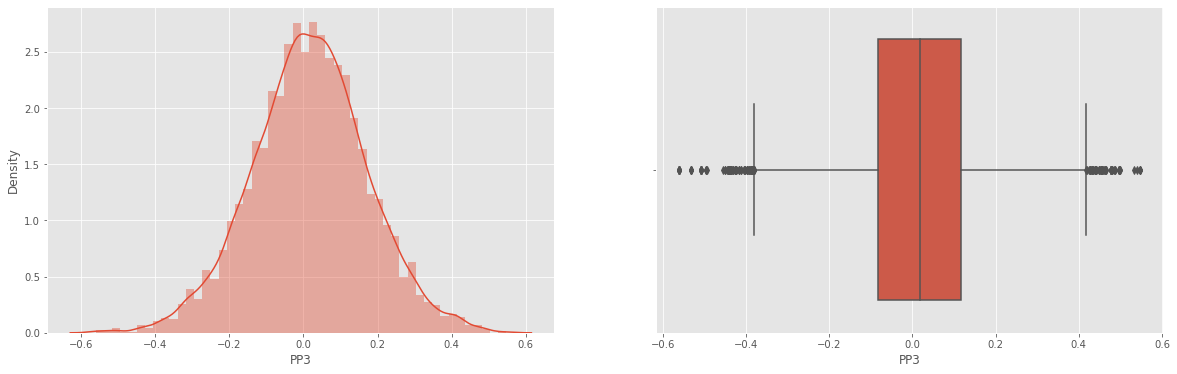

In [26]:
f=plt.figure(figsize=(20,6))
print(df['PP3'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['PP3'])
f.add_subplot(1,2,2)
sns.boxplot(df['PP3'])
print('The density of the PP3 data in the distplot lies in the range of -0.1 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

0.3324871180501503
The density of the KF1 data in the distplot lies in the range of -0.5 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers


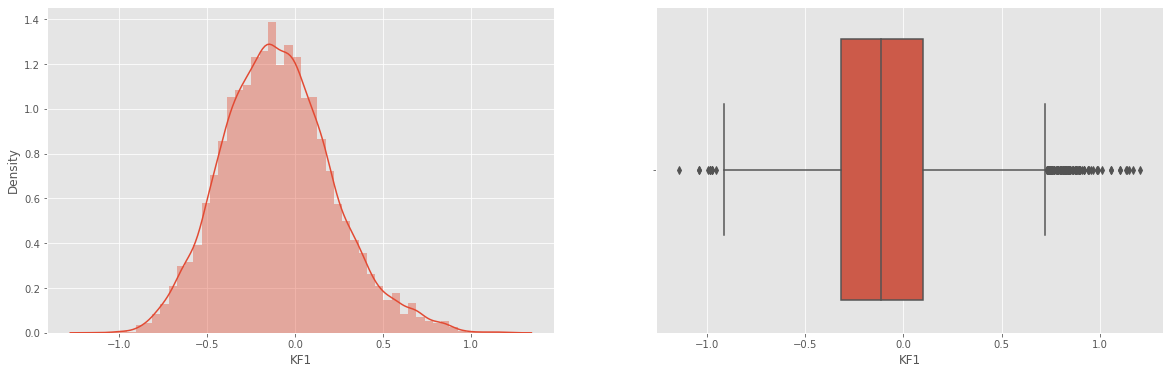

In [27]:
f=plt.figure(figsize=(20,6))
print(df['KF1'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['KF1'])
f.add_subplot(1,2,2)
sns.boxplot(df['KF1'])
print('The density of the KF1 data in the distplot lies in the range of -0.5 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.3395913997485992
The density of the KF2 data in the distplot lies in the range of -0.5 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers


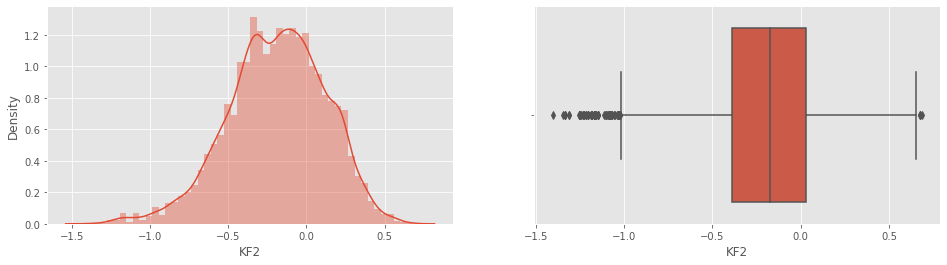

In [28]:
f=plt.figure(figsize=(16,4))
print(df['KF2'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['KF2'])
f.add_subplot(1,2,2)
sns.boxplot(df['KF2'])
print('The density of the KF2 data in the distplot lies in the range of -0.5 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.0051078349840169845
The density of the KF4 data in the distplot lies in the range of -0.35 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers


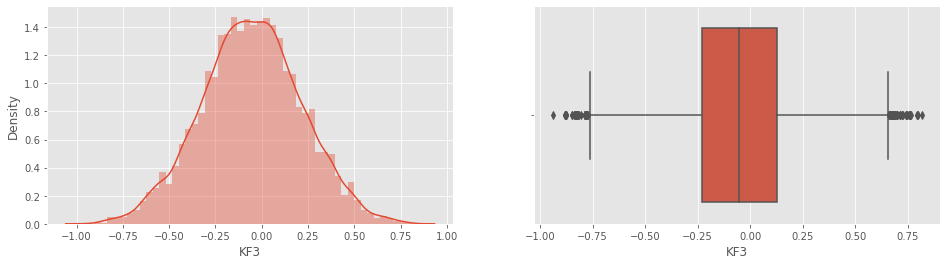

In [29]:
f=plt.figure(figsize=(16,4))
print(df['KF3'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['KF3'])
f.add_subplot(1,2,2)
sns.boxplot(df['KF3'])
print('The density of the KF4 data in the distplot lies in the range of -0.35 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.054788298755328486
The density of the KF4 data in the distplot lies in the range of -0.2 to 0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers


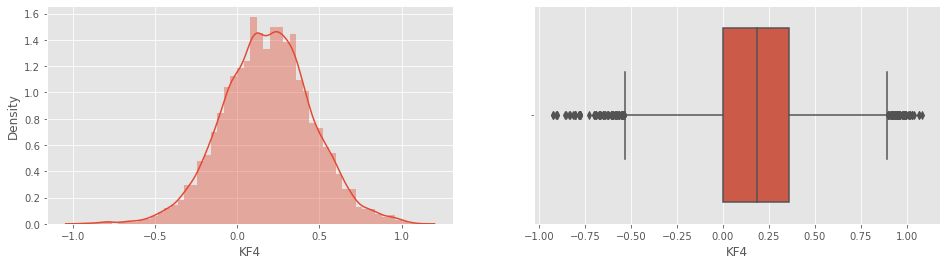

In [30]:
f=plt.figure(figsize=(16,4))
print(df['KF4'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['KF4'])
f.add_subplot(1,2,2)
sns.boxplot(df['KF4'])
print('The density of the KF4 data in the distplot lies in the range of -0.2 to 0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

0.06813807753317634
The density of the KF5 data in the distplot lies in the range of -0.35 to 0.23, the tail at both side shows outliers and the boxplot also reveals the data has outliers


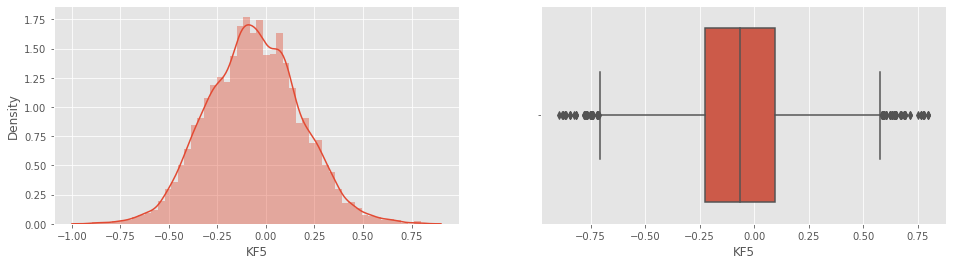

In [31]:
f=plt.figure(figsize=(16,4))
print(df['KF5'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['KF5'])
f.add_subplot(1,2,2)
sns.boxplot(df['KF5'])
print('The density of the KF5 data in the distplot lies in the range of -0.35 to 0.23, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

0.006596470346155262
The density of the KF6 data in the distplot lies in the range of -0.6 to -0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers


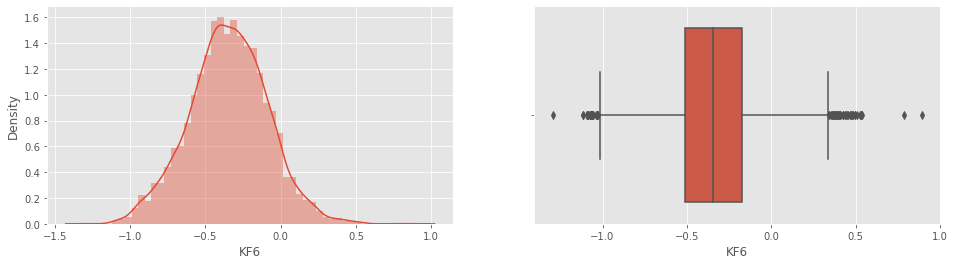

In [32]:
f=plt.figure(figsize=(16,4))
print(df['KF6'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['KF6'])
f.add_subplot(1,2,2)
sns.boxplot(df['KF6'])
print('The density of the KF6 data in the distplot lies in the range of -0.6 to -0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.07636835998374437
The density of the KF7 data in the distplot lies in the range of -0.25 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers


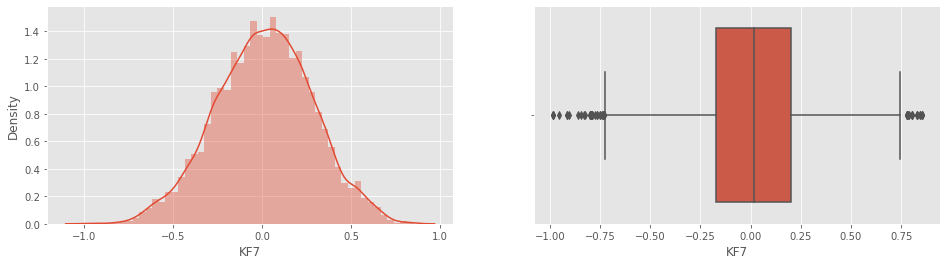

In [33]:
f=plt.figure(figsize=(16,4))
print(df['KF7'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['KF7'])
f.add_subplot(1,2,2)
sns.boxplot(df['KF7'])
print('The density of the KF7 data in the distplot lies in the range of -0.25 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.05452682707866679
The density of the KF8 data in the distplot lies in the range of -0.25 to 0.4, the tail at both side shows outliers and the boxplot also reveals the data has outliers


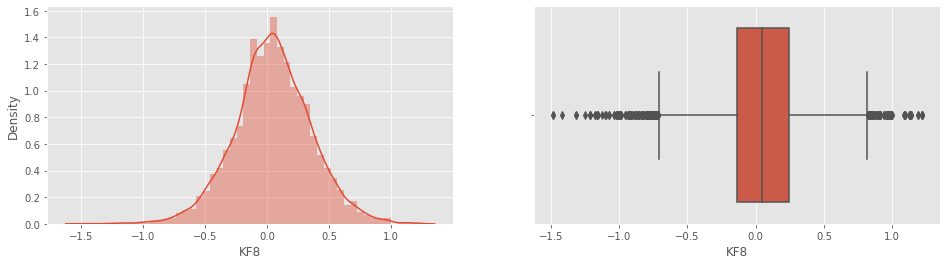

In [34]:
f=plt.figure(figsize=(16,4))
print(df['KF8'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['KF8'])
f.add_subplot(1,2,2)
sns.boxplot(df['KF8'])
print('The density of the KF8 data in the distplot lies in the range of -0.25 to 0.4, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.16837858684565296
The density of the KF9 data in the distplot lies in the range of -0.25 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers


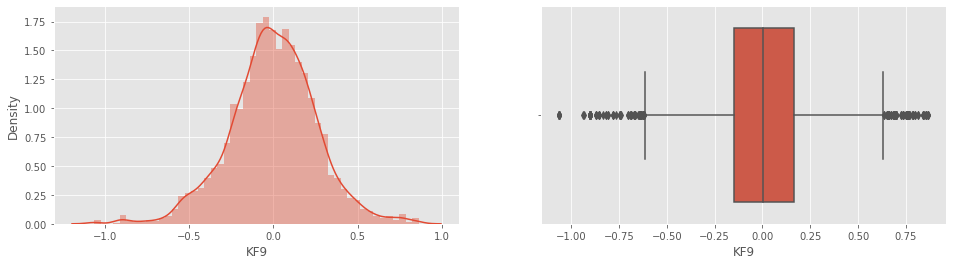

In [35]:
f=plt.figure(figsize=(16,4))
print(df['KF9'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['KF9'])
f.add_subplot(1,2,2)
sns.boxplot(df['KF9'])
print('The density of the KF9 data in the distplot lies in the range of -0.25 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.3808134961831936
The density of the KF10 data in the distplot lies in the range of -0.4 to 0.4, the tail at both side shows outliers and the boxplot also reveals the data has outliers


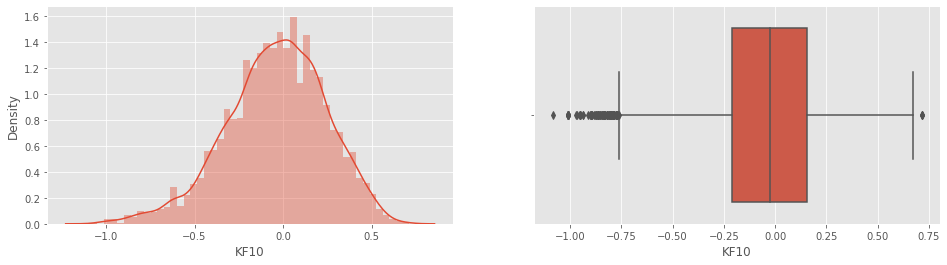

In [36]:
f=plt.figure(figsize=(16,4))
print(df['KF10'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['KF10'])
f.add_subplot(1,2,2)
sns.boxplot(df['KF10'])
print('The density of the KF10 data in the distplot lies in the range of -0.4 to 0.4, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.02792098005874518
The density of the Z1 data in the distplot lies in the range of -0.5 to 1, the tail at both side shows outliers and the boxplot also reveals the data has outliers


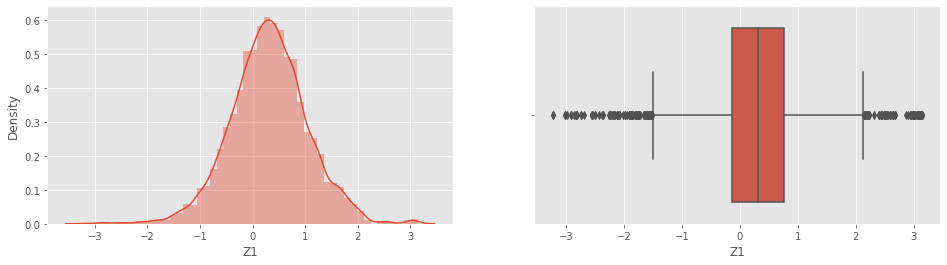

In [37]:
f=plt.figure(figsize=(16,4))
print(df['Z1'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['Z1'])
f.add_subplot(1,2,2)
sns.boxplot(df['Z1'])
print('The density of the Z1 data in the distplot lies in the range of -0.5 to 1, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.385823778573024
The density of the Z2 data in the distplot lies in the range of -0.1 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers


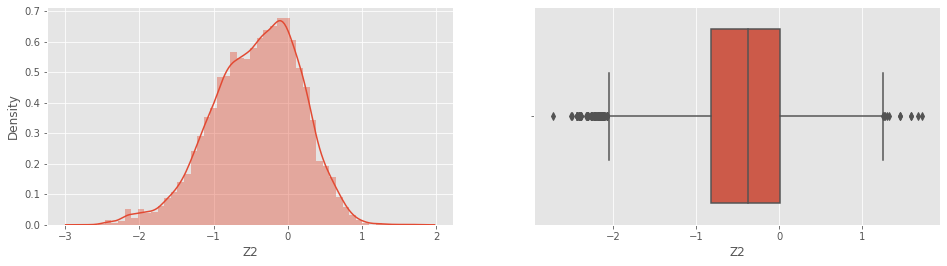

In [38]:
f=plt.figure(figsize=(16,4))
print(df['Z2'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['Z2'])
f.add_subplot(1,2,2)
sns.boxplot(df['Z2'])
print('The density of the Z2 data in the distplot lies in the range of -0.1 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

0.07407990631269781
The density of the Z3 data in the distplot lies in the range of -0.8 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers


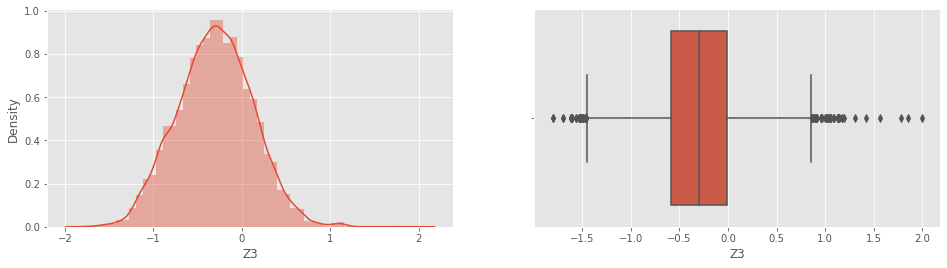

In [39]:
f=plt.figure(figsize=(16,4))
print(df['Z3'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['Z3'])
f.add_subplot(1,2,2)
sns.boxplot(df['Z3'])
print('The density of the Z3 data in the distplot lies in the range of -0.8 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

0.34205203761436903
The density of the Z4 data in the distplot lies in the range of -0.1 to -0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers


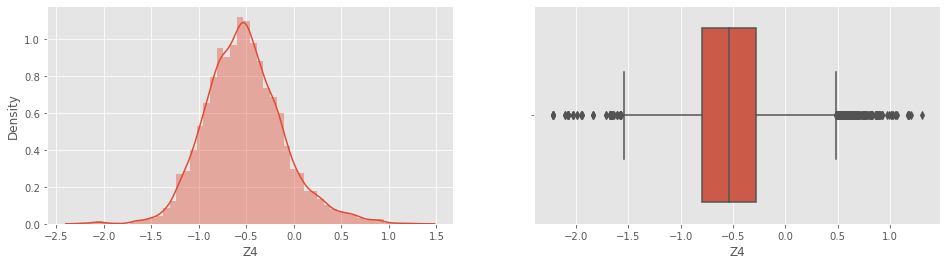

In [40]:
f=plt.figure(figsize=(16,4))
print(df['Z4'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['Z4'])
f.add_subplot(1,2,2)
sns.boxplot(df['Z4'])
print('The density of the Z4 data in the distplot lies in the range of -0.1 to -0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

0.2628223182306741
The density of the Z5 data in the distplot lies in the range of -0.0 to 0.7, the tail at both side shows outliers and the boxplot also reveals the data has outliers


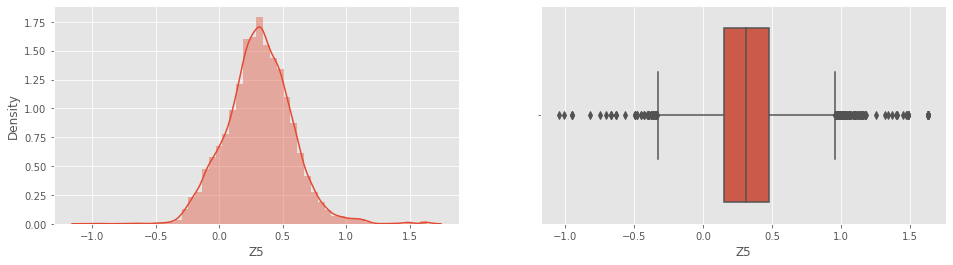

In [41]:
f=plt.figure(figsize=(16,4))
print(df['Z5'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['Z5'])
f.add_subplot(1,2,2)
sns.boxplot(df['Z5'])
print('The density of the Z5 data in the distplot lies in the range of -0.0 to 0.7, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

0.20545450700388324
The density of the F1 data in the distplot lies in the range of -0.5 to 0.0, the tail at both side shows outliers and the boxplot also reveals the data has outliers


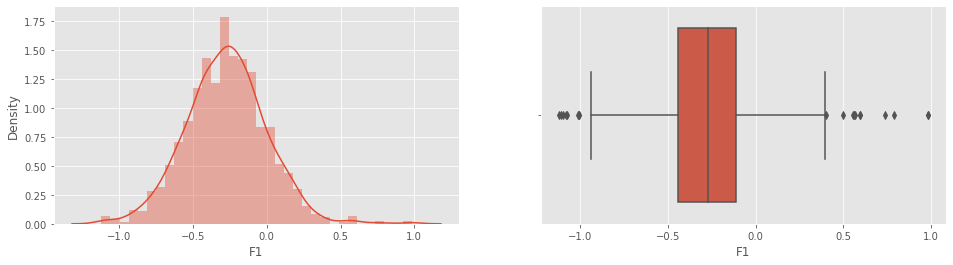

In [42]:
f=plt.figure(figsize=(16,4))
print(df['F1'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['F1'])
f.add_subplot(1,2,2)
sns.boxplot(df['F1'])
print('The density of the F1 data in the distplot lies in the range of -0.5 to 0.0, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.5059165402395616
The density of the F2 data in the distplot lies in the range of -0.3 to 0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers


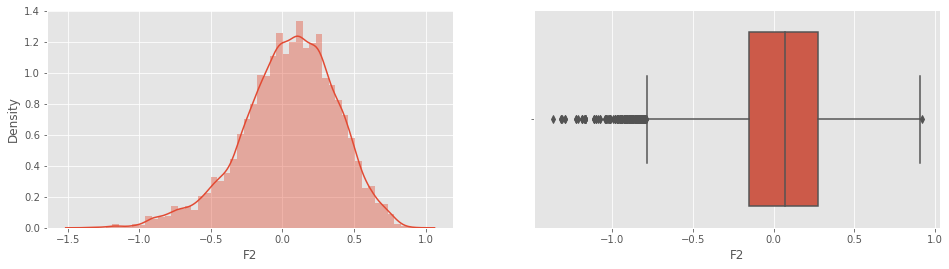

In [43]:
f=plt.figure(figsize=(16,4))
print(df['F2'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['F2'])
f.add_subplot(1,2,2)
sns.boxplot(df['F2'])
print('The density of the F2 data in the distplot lies in the range of -0.3 to 0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers')

-0.22962427973332658
The density of the F3 data in the distplot lies in the range of -0.5 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


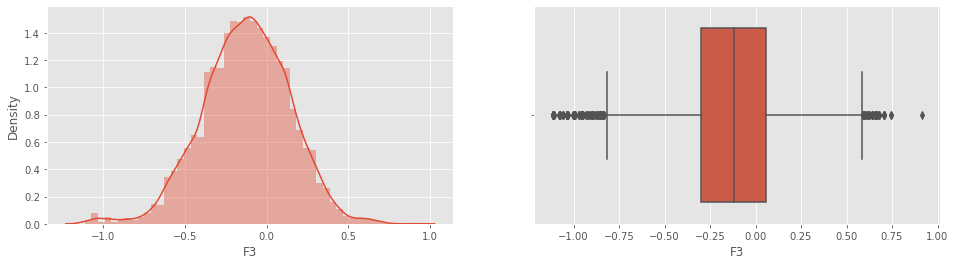

In [44]:
f=plt.figure(figsize=(16,4))
print(df['F3'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['F3'])
f.add_subplot(1,2,2)
sns.boxplot(df['F3'])
print('The density of the F3 data in the distplot lies in the range of -0.5 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.12430709177225478
The density of the F4 data in the distplot lies in the range of 0.1 to 0.7, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


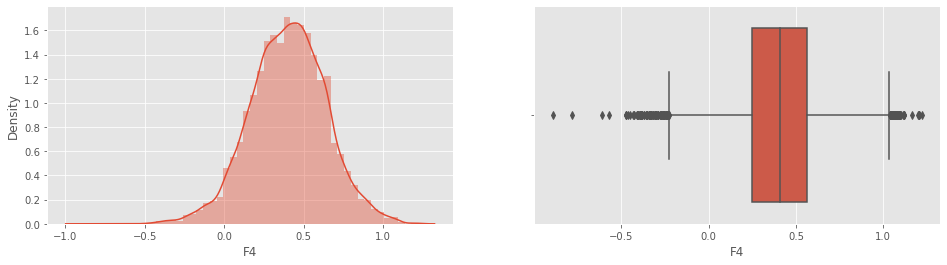

In [45]:
f=plt.figure(figsize=(16,4))
print(df['F4'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['F4'])
f.add_subplot(1,2,2)
sns.boxplot(df['F4'])
print('The density of the F4 data in the distplot lies in the range of 0.1 to 0.7, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

1.5539299561471178
The density of the F5 data in the distplot lies in the range of -0.3 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


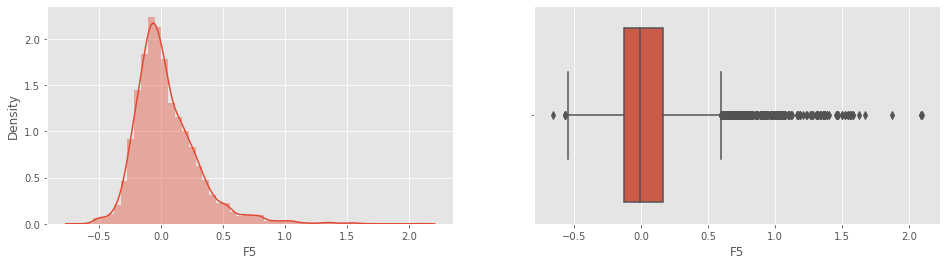

In [46]:
f=plt.figure(figsize=(16,4))
print(df['F5'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['F5'])
f.add_subplot(1,2,2)
sns.boxplot(df['F5'])
print('The density of the F5 data in the distplot lies in the range of -0.3 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.010599557694810127
The density of the F6 data in the distplot lies in the range of -0.4 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


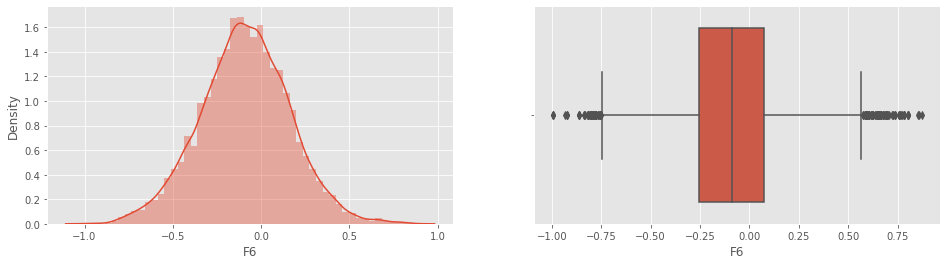

In [47]:
f=plt.figure(figsize=(16,4))
print(df['F6'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['F6'])
f.add_subplot(1,2,2)
sns.boxplot(df['F6'])
print('The density of the F6 data in the distplot lies in the range of -0.4 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.3059357279159473
The density of the T1 data in the distplot lies in the range of -5.8 to -0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


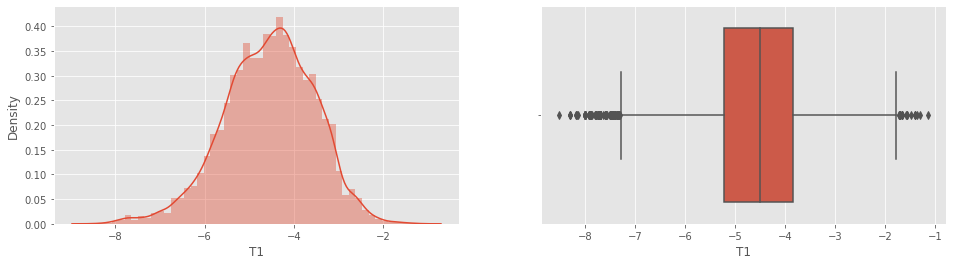

In [48]:
f=plt.figure(figsize=(16,4))
print(df['T1'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['T1'])
f.add_subplot(1,2,2)
sns.boxplot(df['T1'])
print('The density of the T1 data in the distplot lies in the range of -5.8 to -0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.14679771600302943
The density of the T2 data in the distplot lies in the range of -0.5 to 0.8, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


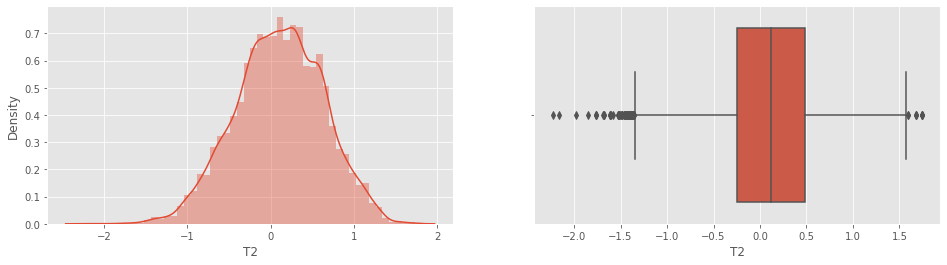

In [49]:
f=plt.figure(figsize=(16,4))
print(df['T2'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['T2'])
f.add_subplot(1,2,2)
sns.boxplot(df['T2'])
print('The density of the T2 data in the distplot lies in the range of -0.5 to 0.8, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.05029696732290187
The density of the T3 data in the distplot lies in the range of -0.25 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


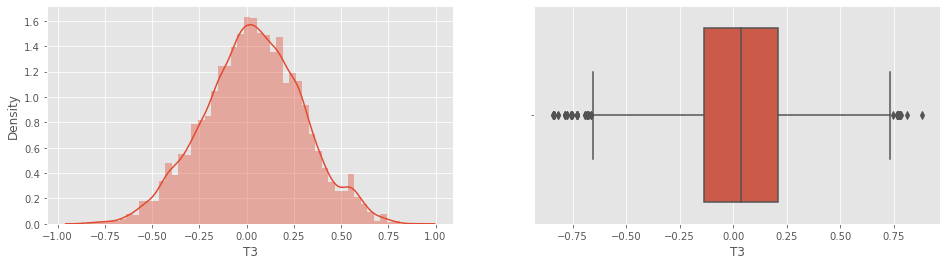

In [50]:
f=plt.figure(figsize=(16,4))
print(df['T3'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['T3'])
f.add_subplot(1,2,2)
sns.boxplot(df['T3'])
print('The density of the T3 data in the distplot lies in the range of -0.25 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.09183782802184043
The density of the T4 data in the distplot lies in the range of -0.1 to 0.4, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


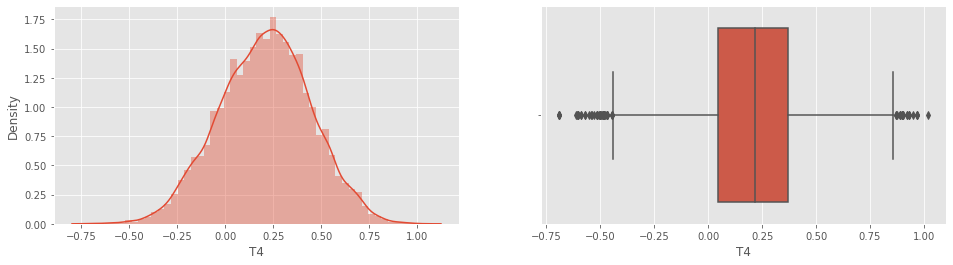

In [51]:
f=plt.figure(figsize=(16,4))
print(df['T4'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['T4'])
f.add_subplot(1,2,2)
sns.boxplot(df['T4'])
print('The density of the T4 data in the distplot lies in the range of -0.1 to 0.4, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.6238211827151714
The density of the T5 data in the distplot lies in the range of 0.2 to 1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


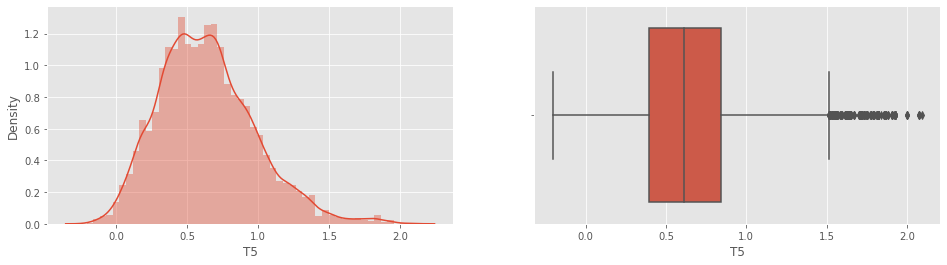

In [52]:
f=plt.figure(figsize=(16,4))
print(df['T5'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['T5'])
f.add_subplot(1,2,2)
sns.boxplot(df['T5'])
print('The density of the T5 data in the distplot lies in the range of 0.2 to 1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.06816381822351157
The density of the VHSE1 data in the distplot lies in the range of -0.4 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


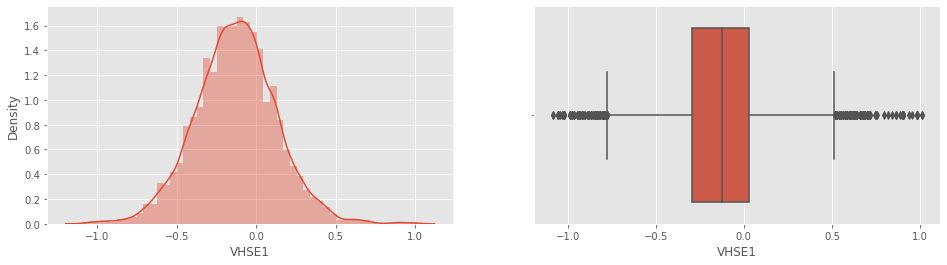

In [53]:
f=plt.figure(figsize=(16,4))
print(df['VHSE1'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['VHSE1'])
f.add_subplot(1,2,2)
sns.boxplot(df['VHSE1'])
print('The density of the VHSE1 data in the distplot lies in the range of -0.4 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.2248213430285739
The density of the VHSE data in the distplot lies in the range of -0.4 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


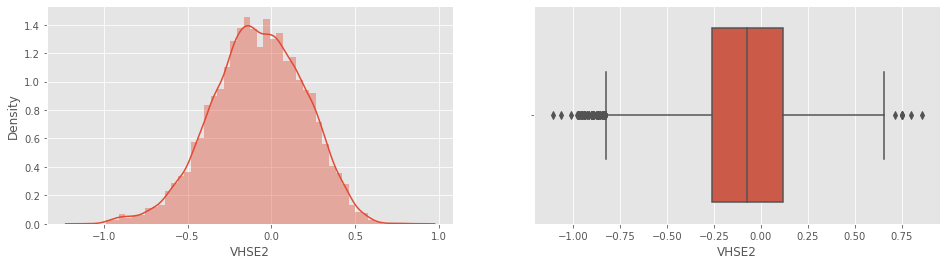

In [54]:
f=plt.figure(figsize=(16,4))
print(df['VHSE2'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['VHSE2'])
f.add_subplot(1,2,2)
sns.boxplot(df['VHSE2'])
print('The density of the VHSE data in the distplot lies in the range of -0.4 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.5784555775343598
The density of the VHSE3 data in the distplot lies in the range of -0.5 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


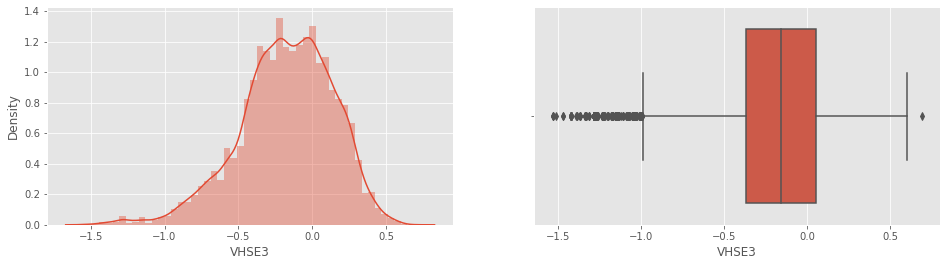

In [55]:
f=plt.figure(figsize=(16,4))
print(df['VHSE3'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['VHSE3'])
f.add_subplot(1,2,2)
sns.boxplot(df['VHSE3'])
print('The density of the VHSE3 data in the distplot lies in the range of -0.5 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.33755950811086577
The density of the VHSE4 data in the distplot lies in the range of -0.4 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


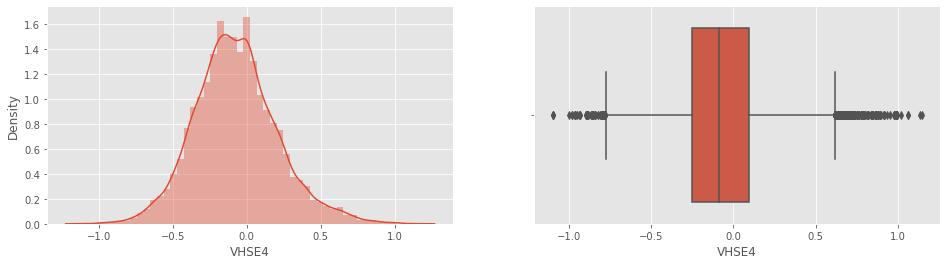

In [56]:
f=plt.figure(figsize=(16,4))
print(df['VHSE4'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['VHSE4'])
f.add_subplot(1,2,2)
sns.boxplot(df['VHSE4'])
print('The density of the VHSE4 data in the distplot lies in the range of -0.4 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.4101557150960778
The density of the VHSE5 data in the distplot lies in the range of -0.4 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


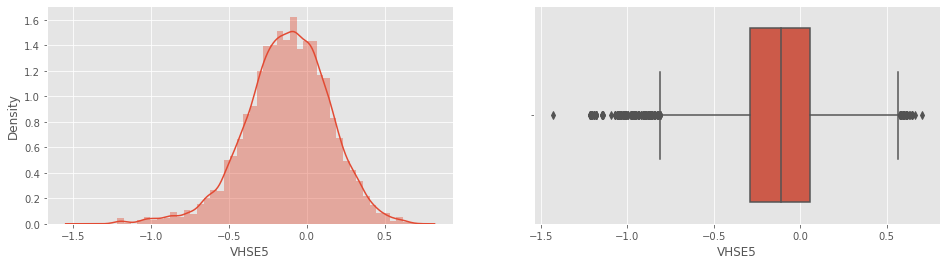

In [57]:
f=plt.figure(figsize=(16,4))
print(df['VHSE5'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['VHSE5'])
f.add_subplot(1,2,2)
sns.boxplot(df['VHSE5'])
print('The density of the VHSE5 data in the distplot lies in the range of -0.4 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.1613201779481616
The density of the VHSE data in the distplot lies in the range of -0.4 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


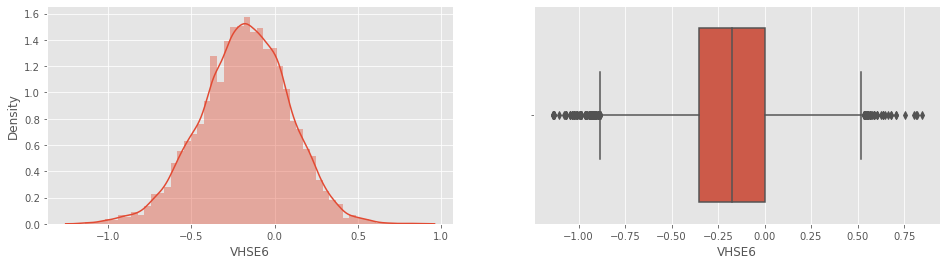

In [58]:
f=plt.figure(figsize=(16,4))
print(df['VHSE6'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['VHSE6'])
f.add_subplot(1,2,2)
sns.boxplot(df['VHSE6'])
print('The density of the VHSE data in the distplot lies in the range of -0.4 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.08028793343223058
The density of the VHSE7 data in the distplot lies in the range of -0.1 to 0.6, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


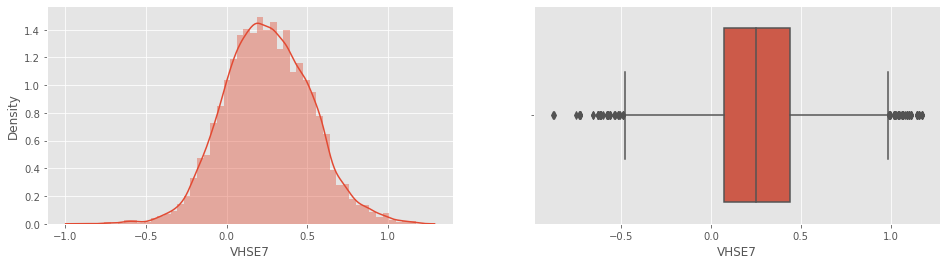

In [59]:
f=plt.figure(figsize=(16,4))
print(df['VHSE7'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['VHSE7'])
f.add_subplot(1,2,2)
sns.boxplot(df['VHSE7'])
print('The density of the VHSE7 data in the distplot lies in the range of -0.1 to 0.6, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

1.3194398604191742
The density of the VHSE8 data in the distplot lies in the range of -0.3 to 0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


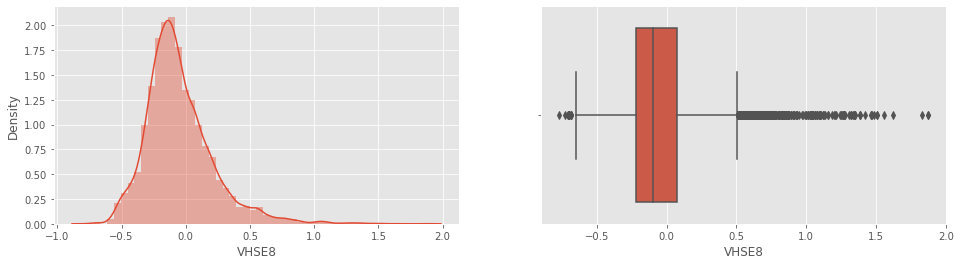

In [60]:
f=plt.figure(figsize=(16,4))
print(df['VHSE8'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['VHSE8'])
f.add_subplot(1,2,2)
sns.boxplot(df['VHSE8'])
print('The density of the VHSE8 data in the distplot lies in the range of -0.3 to 0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.005063312366699313
The density of the ProtFP1 data in the distplot lies in the range of -0.2 to 0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


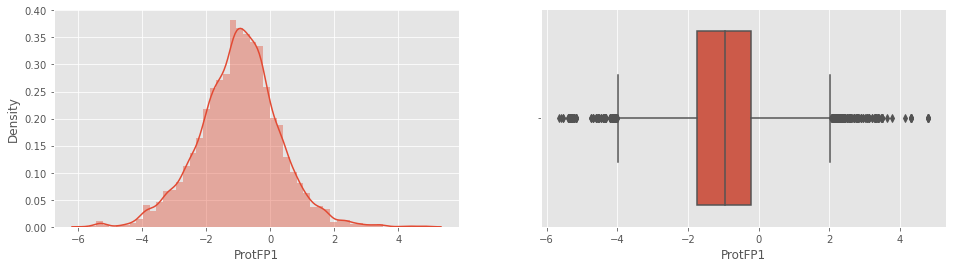

In [61]:
f=plt.figure(figsize=(16,4))
print(df['ProtFP1'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP1'])
f.add_subplot(1,2,2)
sns.boxplot(df['ProtFP1'])
print('The density of the ProtFP1 data in the distplot lies in the range of -0.2 to 0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.33281227070480474
The density of the ProtFP2 data in the distplot lies in the range of -0.18 to 1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


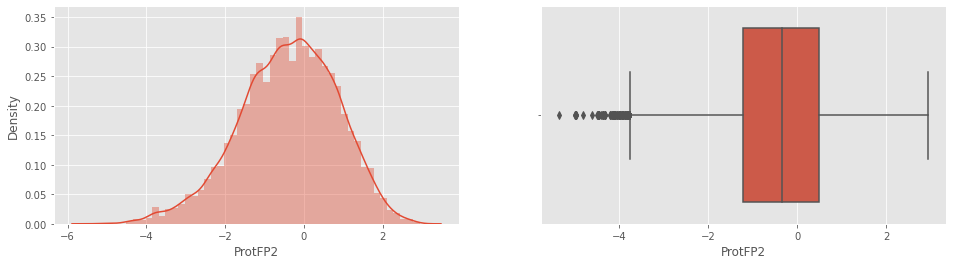

In [62]:
f=plt.figure(figsize=(16,4))
print(df['ProtFP2'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP2'])
f.add_subplot(1,2,2)
sns.boxplot(df['ProtFP2'])
print('The density of the ProtFP2 data in the distplot lies in the range of -0.18 to 1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')


0.5070643451781158
The density of the ProtFP3 data in the distplot lies in the range of -1.5 to 0, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


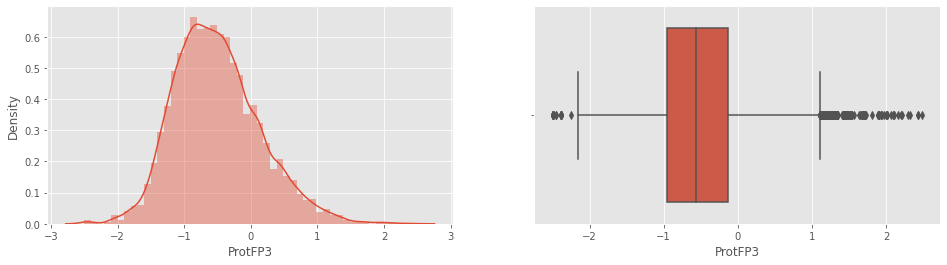

In [63]:
f=plt.figure(figsize=(16,4))
print(df['ProtFP3'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP3'])
f.add_subplot(1,2,2)
sns.boxplot(df['ProtFP3'])
print('The density of the ProtFP3 data in the distplot lies in the range of -1.5 to 0, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.3320897421833068
The density of the ProtFP4 data in the distplot lies in the range of -0.5 to 0.7, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


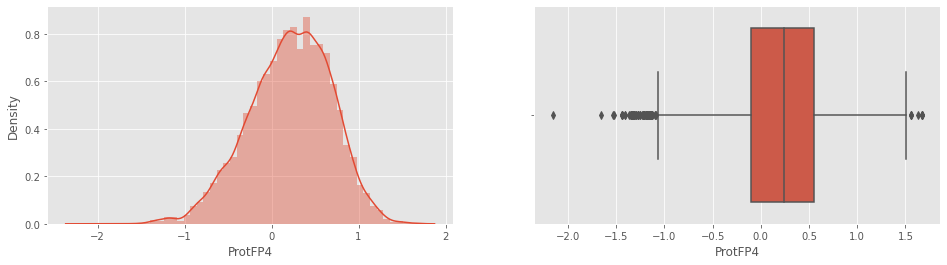

In [64]:
f=plt.figure(figsize=(16,4))
print(df['ProtFP4'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP4'])
f.add_subplot(1,2,2)
sns.boxplot(df['ProtFP4'])
print('The density of the ProtFP4 data in the distplot lies in the range of -0.5 to 0.7, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.05221415384880116
The density of the ProtFP5 data in the distplot lies in the range of -0.8 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


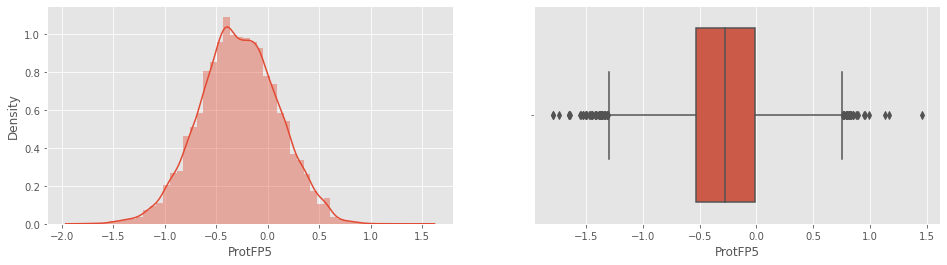

In [65]:
f=plt.figure(figsize=(16,4))
print(df['ProtFP5'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP5'])
f.add_subplot(1,2,2)
sns.boxplot(df['ProtFP5'])
print('The density of the ProtFP5 data in the distplot lies in the range of -0.8 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.32448827023278576
The density of the ProtFP6 data in the distplot lies in the range of -0.3 to 0.7, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


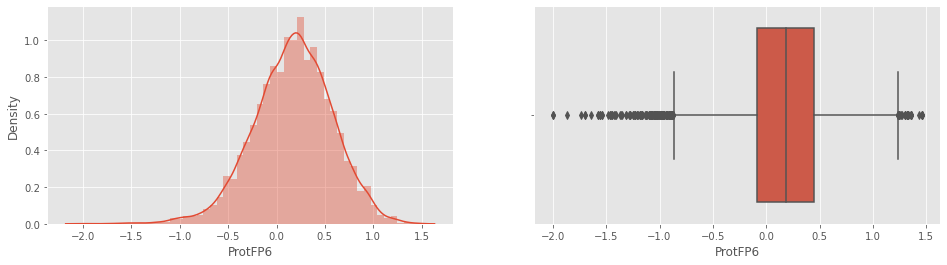

In [66]:
f=plt.figure(figsize=(16,4))
print(df['ProtFP6'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP6'])
f.add_subplot(1,2,2)
sns.boxplot(df['ProtFP6'])
print('The density of the ProtFP6 data in the distplot lies in the range of -0.3 to 0.7, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.39023021748396086
The density of the ProtFP7 data in the distplot lies in the range of -0.2 to 0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


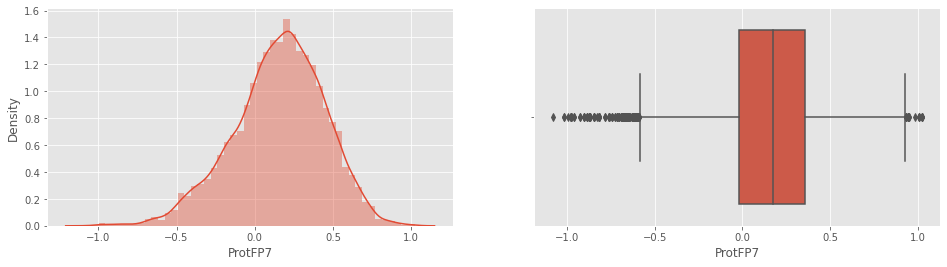

In [67]:
f=plt.figure(figsize=(16,4))
print(df['ProtFP7'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP7'])
f.add_subplot(1,2,2)
sns.boxplot(df['ProtFP7'])
print('The density of the ProtFP7 data in the distplot lies in the range of -0.2 to 0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.23838135499355734
The density of the ProtFP8 data in the distplot lies in the range of -0.3 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


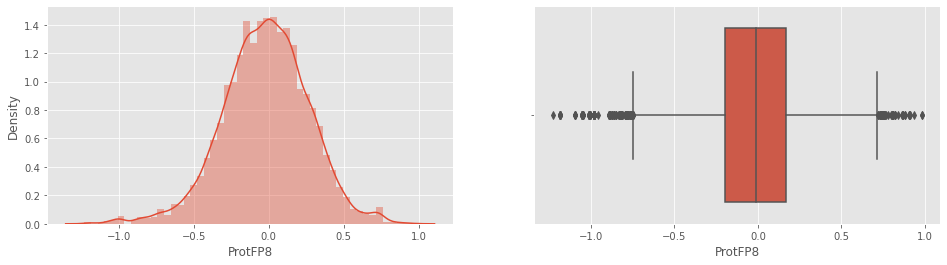

In [68]:
f=plt.figure(figsize=(16,4))
print(df['ProtFP8'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP8'])
f.add_subplot(1,2,2)
sns.boxplot(df['ProtFP8'])
print('The density of the ProtFP8 data in the distplot lies in the range of -0.3 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.25113521525441823
The density of the ST1 data in the distplot lies in the range of -1 to -0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


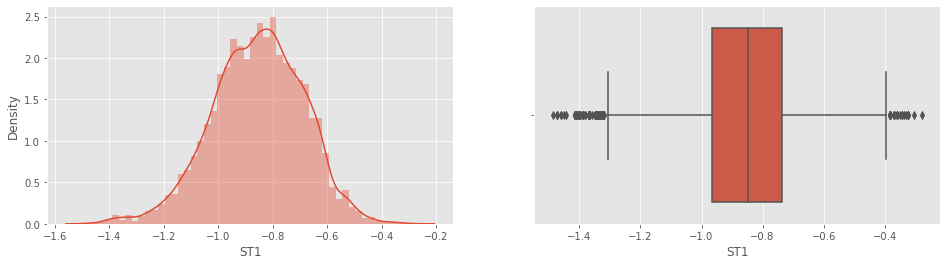

In [69]:
f=plt.figure(figsize=(16,4))
print(df['ST1'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ST1'])
f.add_subplot(1,2,2)
sns.boxplot(df['ST1'])
print('The density of the ST1 data in the distplot lies in the range of -1 to -0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.011727058689388349
The density of the ST2 data in the distplot lies in the range of -0.4 to 0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


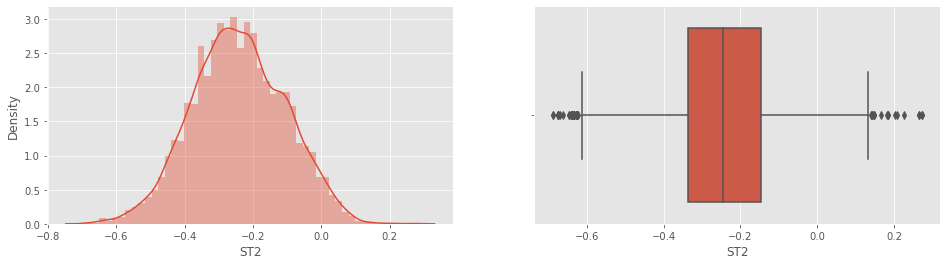

In [70]:
f=plt.figure(figsize=(16,4))
print(df['ST2'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ST2'])
f.add_subplot(1,2,2)
sns.boxplot(df['ST2'])
print('The density of the ST2 data in the distplot lies in the range of -0.4 to 0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.05822001771436881
The density of the ST3 data in the distplot lies in the range of -0.4 to -0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


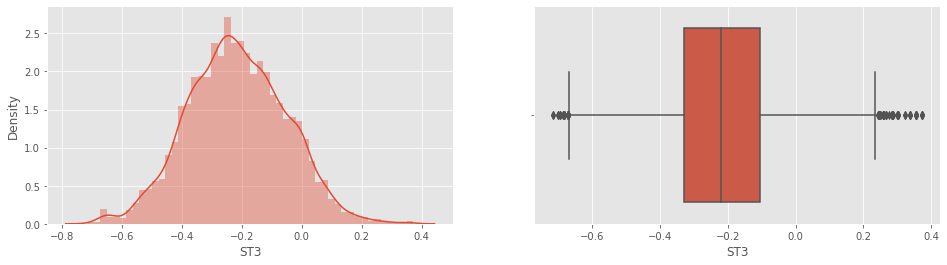

In [71]:
f=plt.figure(figsize=(16,4))
print(df['ST3'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ST3'])
f.add_subplot(1,2,2)
sns.boxplot(df['ST3'])
print('The density of the ST3 data in the distplot lies in the range of -0.4 to -0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.40335945083645613
The density of the ST4 data in the distplot lies in the range of -0.2 to 0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


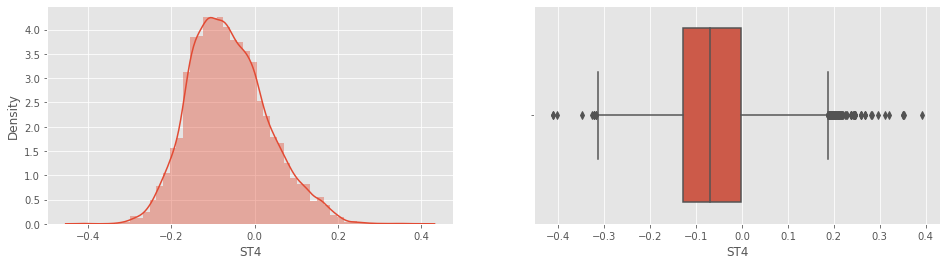

In [72]:
f=plt.figure(figsize=(16,4))
print(df['ST4'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ST4'])
f.add_subplot(1,2,2)
sns.boxplot(df['ST4'])
print('The density of the ST4 data in the distplot lies in the range of -0.2 to 0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.015609317771528785
The density of the ST5 data in the distplot lies in the range of -0.2 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


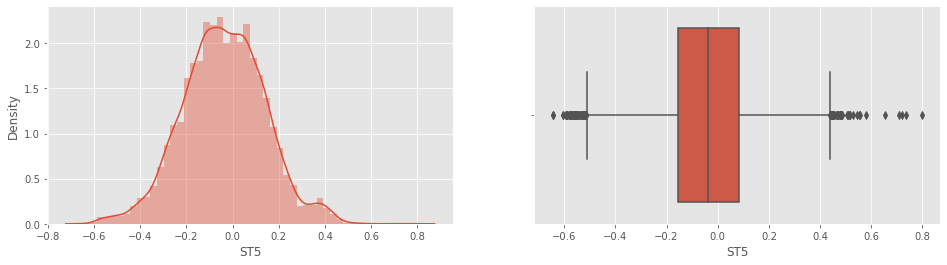

In [73]:
f=plt.figure(figsize=(16,4))
print(df['ST5'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ST5'])
f.add_subplot(1,2,2)
sns.boxplot(df['ST5'])
print('The density of the ST5 data in the distplot lies in the range of -0.2 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.4883650651481308
The density of the ST6 data in the distplot lies in the range of -0.5 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


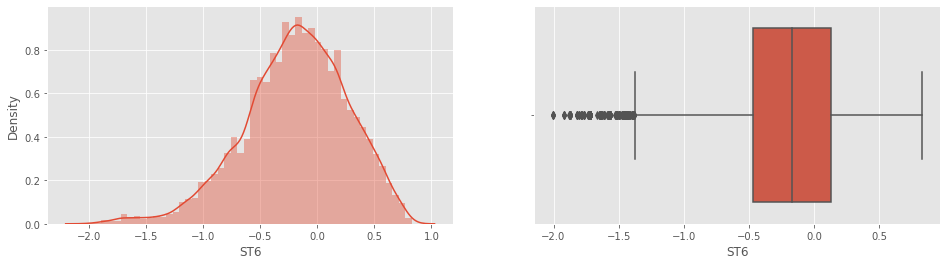

In [74]:
f=plt.figure(figsize=(16,4))
print(df['ST6'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ST6'])
f.add_subplot(1,2,2)
sns.boxplot(df['ST6'])
print('The density of the ST6 data in the distplot lies in the range of -0.5 to 0.25, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.2854960123883287
The density of the ST7 data in the distplot lies in the range of -0.1 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


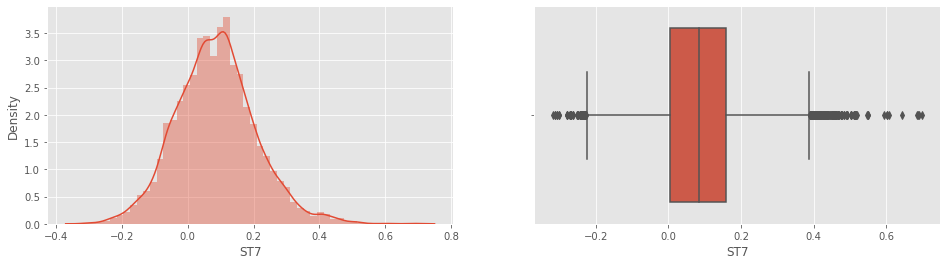

In [75]:
f=plt.figure(figsize=(16,4))
print(df['ST7'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ST7'])
f.add_subplot(1,2,2)
sns.boxplot(df['ST7'])
print('The density of the ST7 data in the distplot lies in the range of -0.1 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.5184103739616988
The density of the ST8 data in the distplot lies in the range of 0 to 0.35, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


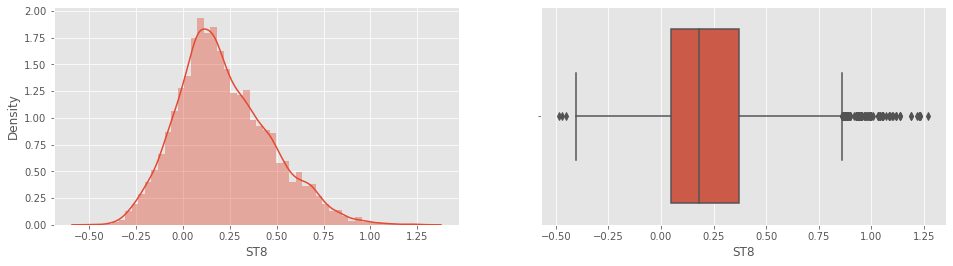

In [76]:
f=plt.figure(figsize=(16,4))
print(df['ST8'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['ST8'])
f.add_subplot(1,2,2)
sns.boxplot(df['ST8'])
print('The density of the ST8 data in the distplot lies in the range of 0 to 0.35, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.05224930055462429
The density of the BLOSUM1 data in the distplot lies in the range of 0 to 0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


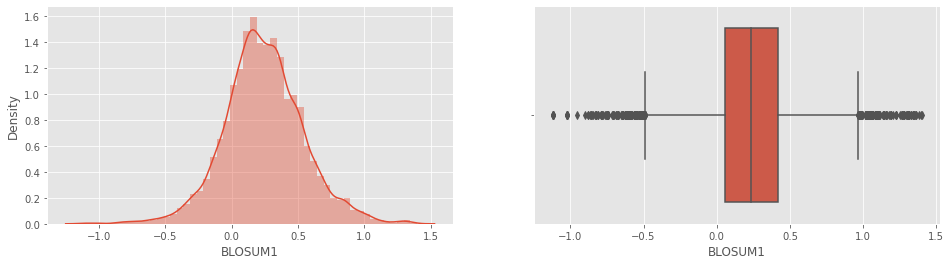

In [77]:
f=plt.figure(figsize=(16,4))
print(df['BLOSUM1'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM1'])
f.add_subplot(1,2,2)
sns.boxplot(df['BLOSUM1'])
print('The density of the BLOSUM1 data in the distplot lies in the range of 0 to 0.5, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.3008872469392341
The density of the Blosum2 data in the distplot lies in the range of -0.4 to 0, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


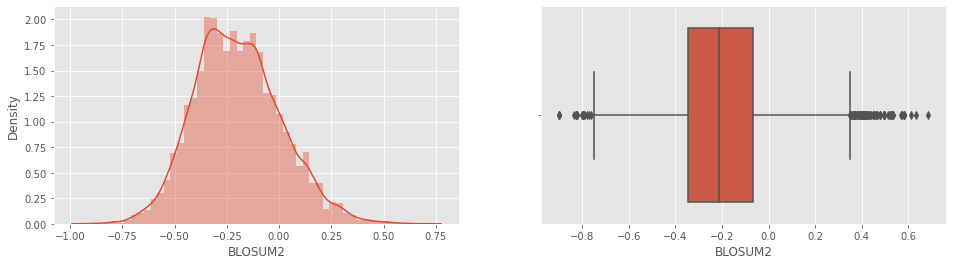

In [78]:
f=plt.figure(figsize=(16,4))
print(df['BLOSUM2'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM2'])
f.add_subplot(1,2,2)
sns.boxplot(df['BLOSUM2'])
print('The density of the Blosum2 data in the distplot lies in the range of -0.4 to 0, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.5501112560417255
The density of the BLOSUM3 data in the distplot lies in the range of -0.3 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


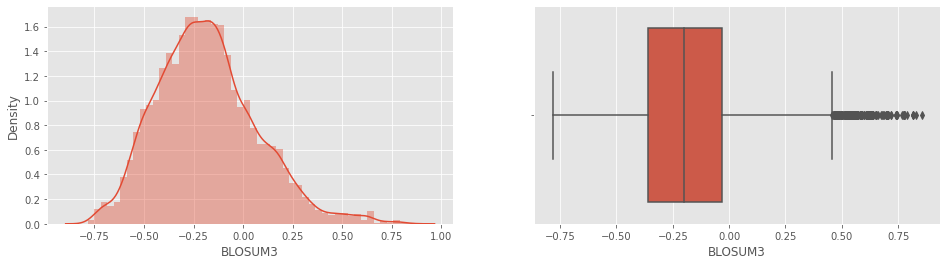

In [79]:
f=plt.figure(figsize=(16,4))
print(df['BLOSUM3'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM3'])
f.add_subplot(1,2,2)
sns.boxplot(df['BLOSUM3'])
print('The density of the BLOSUM3 data in the distplot lies in the range of -0.3 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.05370099465504765
The density of the Blosum4 data in the distplot lies in the range of -0.2 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


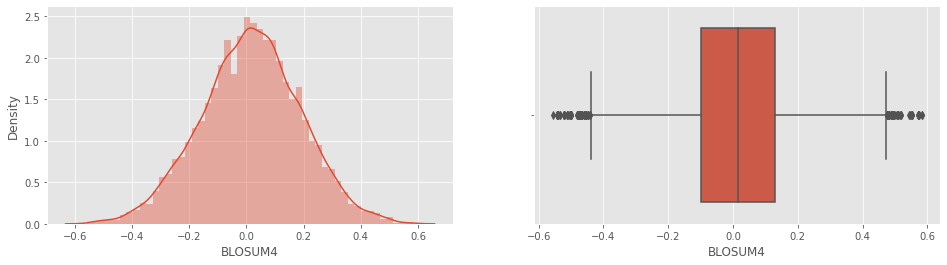

In [80]:
f=plt.figure(figsize=(16,4))
print(df['BLOSUM4'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM4'])
f.add_subplot(1,2,2)
sns.boxplot(df['BLOSUM4'])
print('The density of the Blosum4 data in the distplot lies in the range of -0.2 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.06187409132557913
The density of the Blosum5 data in the distplot lies in the range of -0.2 to 0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


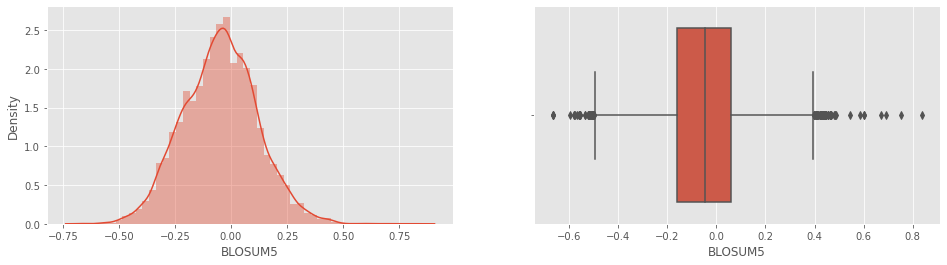

In [81]:
f=plt.figure(figsize=(16,4))
print(df['BLOSUM5'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM5'])
f.add_subplot(1,2,2)
sns.boxplot(df['BLOSUM5'])
print('The density of the Blosum5 data in the distplot lies in the range of -0.2 to 0.1, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.7810206433097696
The density of the Blosum6 data in the distplot lies in the range of -0.0 to 0.35, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


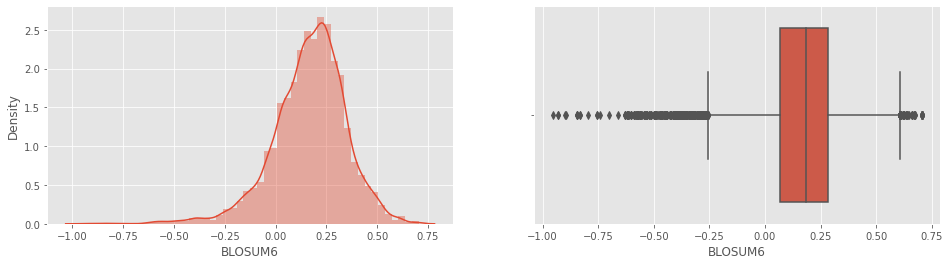

In [82]:
f=plt.figure(figsize=(16,4))
print(df['BLOSUM6'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM6'])
f.add_subplot(1,2,2)
sns.boxplot(df['BLOSUM6'])
print('The density of the Blosum6 data in the distplot lies in the range of -0.0 to 0.35, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.2450926212811337
The density of the Blossom data in the distplot lies in the range of -0.2 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


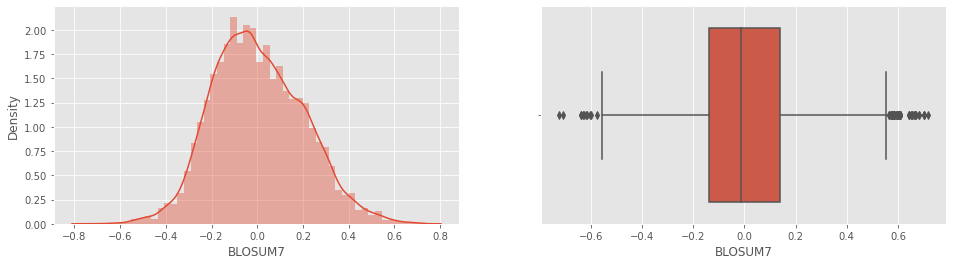

In [83]:
f=plt.figure(figsize=(16,4))
print(df['BLOSUM7'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM7'])
f.add_subplot(1,2,2)
sns.boxplot(df['BLOSUM7'])
print('The density of the Blossom data in the distplot lies in the range of -0.2 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.7321853940957384
The density of the Blosum8 data in the distplot lies in the range of -0.2 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


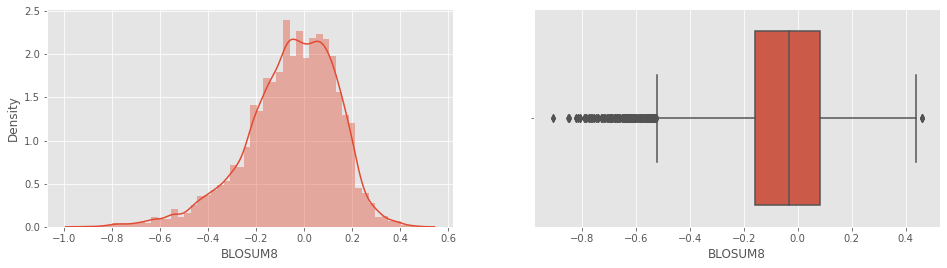

In [84]:
f=plt.figure(figsize=(16,4))
print(df['BLOSUM8'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM8'])
f.add_subplot(1,2,2)
sns.boxplot(df['BLOSUM8'])
print('The density of the Blosum8 data in the distplot lies in the range of -0.2 to 0.2, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.11283996874624591
The density of the Blosum9 data in the distplot lies in the range of -0.1 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


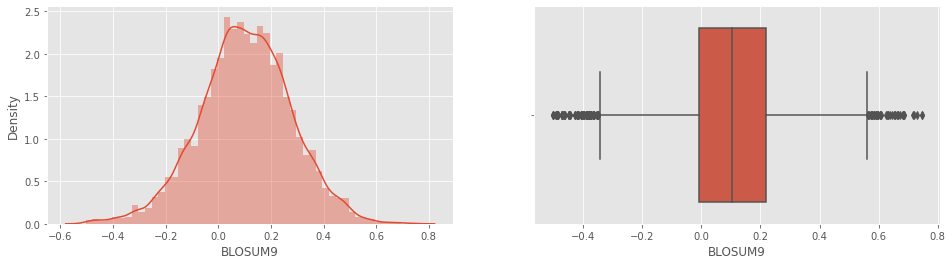

In [85]:
f=plt.figure(figsize=(16,4))
print(df['BLOSUM9'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM9'])
f.add_subplot(1,2,2)
sns.boxplot(df['BLOSUM9'])
print('The density of the Blosum9 data in the distplot lies in the range of -0.1 to 0.3, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.10179694290051473
The density of the Blosum10 data in the distplot lies in the range of -0.17 to 0.18, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


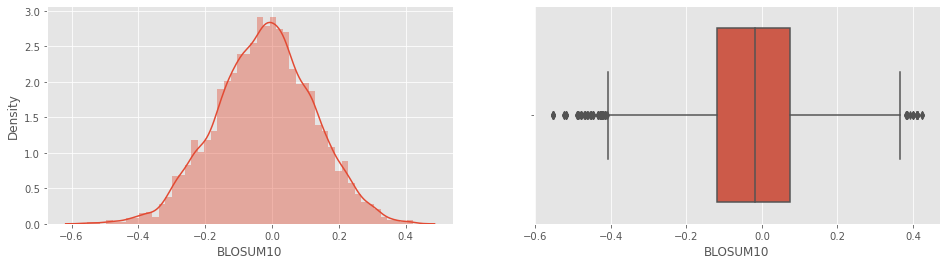

In [86]:
f=plt.figure(figsize=(16,4))
print(df['BLOSUM10'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM10'])
f.add_subplot(1,2,2)
sns.boxplot(df['BLOSUM10'])
print('The density of the Blosum10 data in the distplot lies in the range of -0.17 to 0.18, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.22169199188570773
The density of the MSWHIM1 data in the distplot lies in the range of -0.5 to -0.15, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


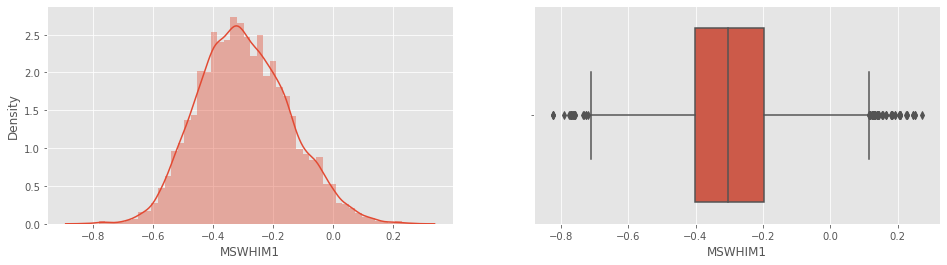

In [87]:
f=plt.figure(figsize=(16,4))
print(df['MSWHIM1'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['MSWHIM1'])
f.add_subplot(1,2,2)
sns.boxplot(df['MSWHIM1'])
print('The density of the MSWHIM1 data in the distplot lies in the range of -0.5 to -0.15, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

-0.3489315035030427
The density of the MSWHIM2 data in the distplot lies in the range of 0.2 to 0.55, the tail at both side shows outliers and the boxplot also reveals the data has outliers.


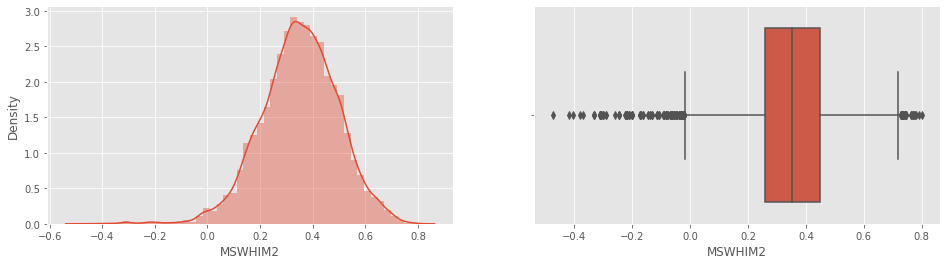

In [88]:
f=plt.figure(figsize=(16,4))
print(df['MSWHIM2'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['MSWHIM2'])
f.add_subplot(1,2,2)
sns.boxplot(df['MSWHIM2'])
print('The density of the MSWHIM2 data in the distplot lies in the range of 0.2 to 0.55, the tail at both side shows outliers and the boxplot also reveals the data has outliers.')

0.15686605274141377
The density of the MSWHIM3 data in the distplot lies in the range of -0.58 to -0.2, the boxplot also reveals the data have few outliers.


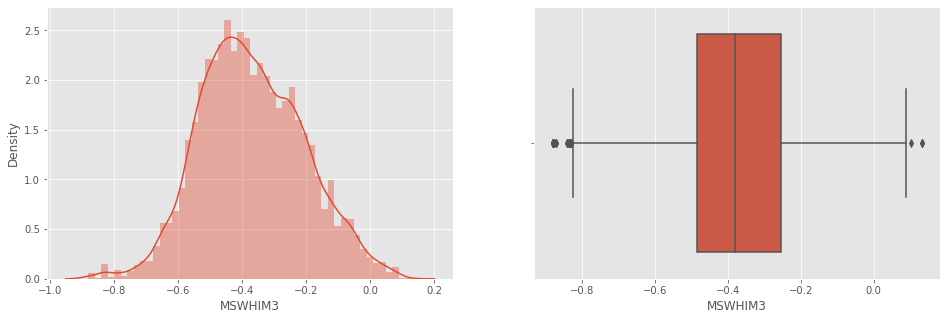

In [89]:
f=plt.figure(figsize=(16,5))
print(df['MSWHIM3'].skew())
f.add_subplot(1,2,1)
sns.distplot(df['MSWHIM3'])
f.add_subplot(1,2,2)
sns.boxplot(df['MSWHIM3'])
print('The density of the MSWHIM3 data in the distplot lies in the range of -0.58 to -0.2, the boxplot also reveals the data have few outliers.')

### DATA CLEANING

##### Removing Noise and outliers   ▪missing values  ▪duplicate data 

#### Trainning dataset
Identifying Outliers with Interquartile Range (IQR)
The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. IQR scores is used to detect outliers as calculated by the code below.

In [90]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#prints the IQR scores, which can be used to detect outliers
print(IQR)

PP1         0.304833
PP2         0.190667
PP3         0.199333
KF1         0.416667
KF2         0.420167
              ...   
BLOSUM9     0.226667
BLOSUM10    0.194000
MSWHIM1     0.207333
MSWHIM2     0.187333
MSWHIM3     0.230000
Length: 66, dtype: float64


The below codes, generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier

In [91]:
#print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

IQR scores calculated earlier is used to remove outliers. The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. This post-cleaned data is as seen below.  The dataset has reduced from 15,000 down to 11,249

In [92]:
#IQR scores calculated earlier to remove outliers
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(11249, 69)


Viewing Individual Feature again.  There is difference in the way the boxplot is looking compare to prio-cleaning of the outliers(see above for initial  individual view of features).  The skewness visualised with displot has also be transformed. The comparative skewness figures is displayed along the visuals.  

Original feature skewness with orange color long tail in distplot: -0.18687449629829653
Cleaned feature new skewness with blue color short  tail in displot: -0.12965217342460944
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='PP1', ylabel='Density'>

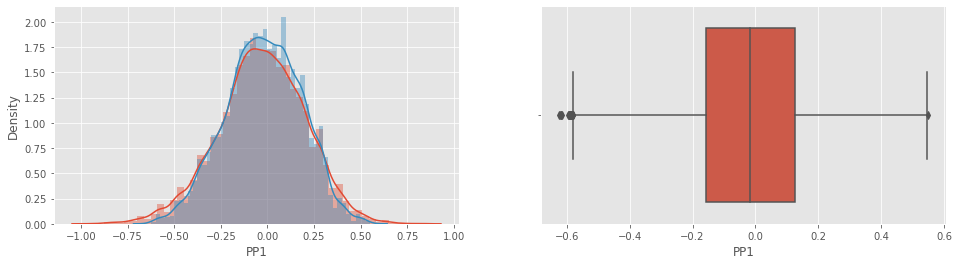

In [93]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['PP1'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['PP1'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['PP1'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['PP1'])
f.add_subplot(1,2,1)
sns.distplot(df_out['PP1'])

Original feature skewness with orange color long tail in distplot: -0.135249085575036
Cleaned feature new skewness with blue color short  tail in displot: 0.015197559405023658
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='PP2', ylabel='Density'>

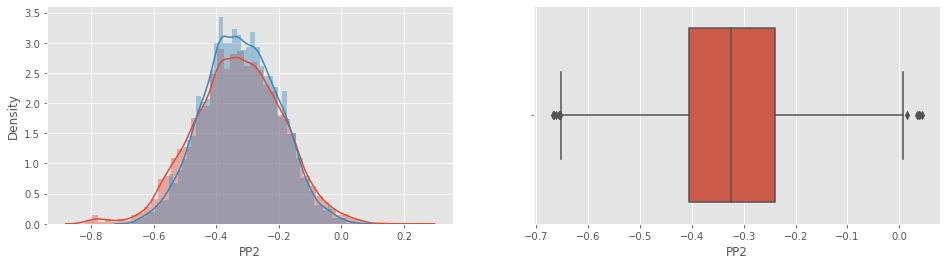

In [94]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['PP2'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['PP2'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['PP2'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['PP2'])
f.add_subplot(1,2,1)
sns.distplot(df_out['PP2'])

Original feature skewness with orange color long tail in distplot: -0.038167037342448626
Cleaned feature new skewness with blue color short  tail in displot: -0.06800800352238599
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='PP3', ylabel='Density'>

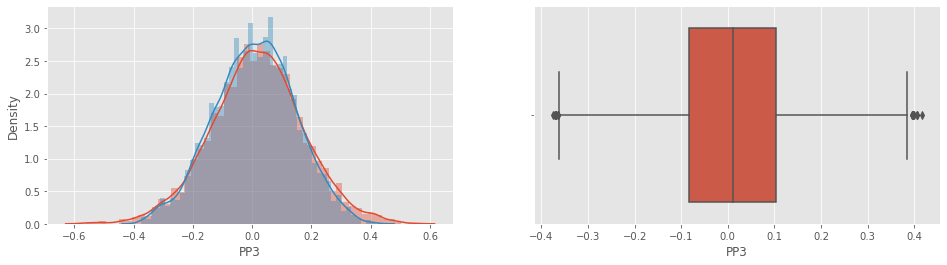

In [95]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['PP3'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['PP3'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['PP3'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['PP3'])
f.add_subplot(1,2,1)
sns.distplot(df_out['PP3'])

Original feature skewness with orange color long tail in distplot: 0.3324871180501503
Cleaned feature new skewness with blue color short  tail in displot: 0.04968333096016729
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='KF1', ylabel='Density'>

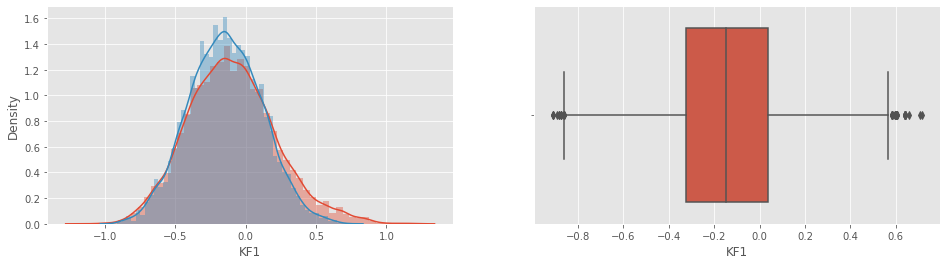

In [96]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['KF1'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['KF1'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['KF1'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['KF1'])
f.add_subplot(1,2,1)
sns.distplot(df_out['KF1'])

Original feature skewness with orange color long tail in distplot: -0.3395913997485992
Cleaned feature new skewness with blue color short  tail in displot: -0.1373345776024927
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='KF2', ylabel='Density'>

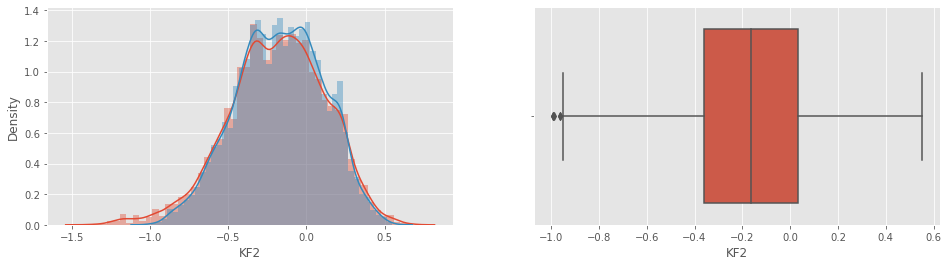

In [97]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['KF2'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['KF2'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['KF2'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['KF2'])
f.add_subplot(1,2,1)
sns.distplot(df_out['KF2'])

Original feature skewness with orange color long tail in distplot: -0.0051078349840169845
Cleaned feature new skewness with blue color short  tail in displot: 0.03366330941052404
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='KF3', ylabel='Density'>

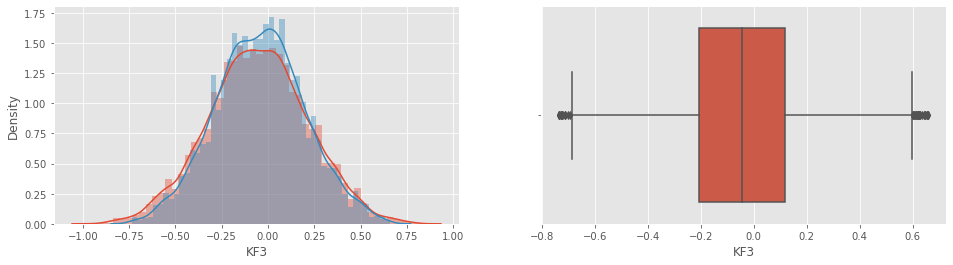

In [98]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['KF3'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['KF3'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['KF3'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['KF3'])
f.add_subplot(1,2,1)
sns.distplot(df_out['KF3'])

Original feature skewness with orange color long tail in distplot: -0.054788298755328486
Cleaned feature new skewness with blue color short  tail in displot: 0.04864278886524642
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='KF4', ylabel='Density'>

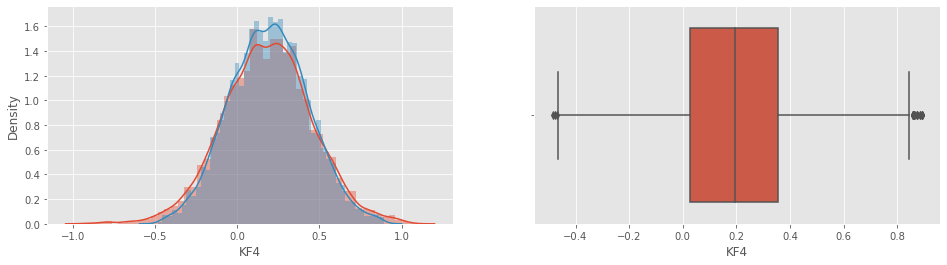

In [99]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['KF4'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['KF4'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['KF4'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['KF4'])
f.add_subplot(1,2,1)
sns.distplot(df_out['KF4'])

Original feature skewness with orange color long tail in distplot: 0.06813807753317634
Cleaned feature new skewness with blue color short  tail in displot: -0.0002845813193073616
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='KF5', ylabel='Density'>

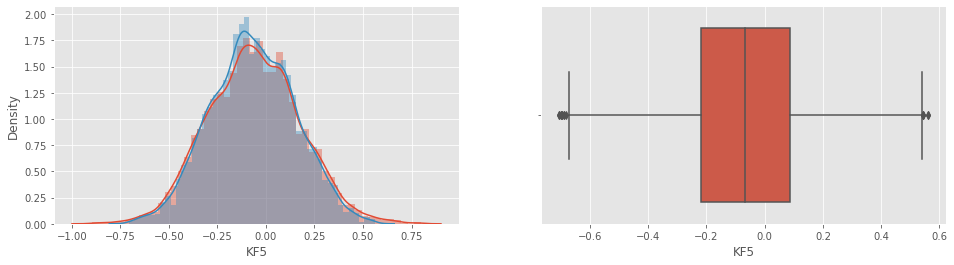

In [100]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['KF5'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['KF5'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['KF5'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['KF5'])
f.add_subplot(1,2,1)
sns.distplot(df_out['KF5'])

Original feature skewness with orange color long tail in distplot: 0.006596470346155262
Cleaned feature new skewness with blue color short  tail in displot: -0.09320833929064762
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='KF6', ylabel='Density'>

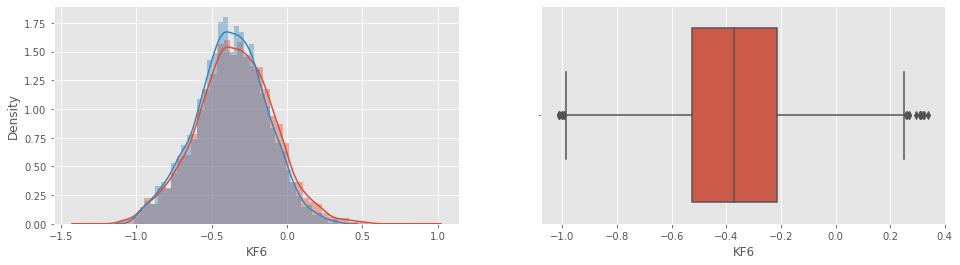

In [101]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['KF6'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['KF6'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['KF6'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['KF6'])
f.add_subplot(1,2,1)
sns.distplot(df_out['KF6'])

Original feature skewness with orange color long tail in distplot: -0.07636835998374437
Cleaned feature new skewness with blue color short  tail in displot: -0.10679562588322555
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='KF7', ylabel='Density'>

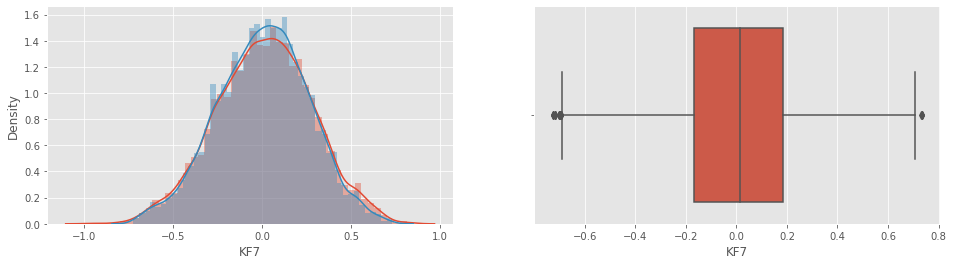

In [102]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['KF7'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['KF7'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['KF7'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['KF7'])
f.add_subplot(1,2,1)
sns.distplot(df_out['KF7'])

Original feature skewness with orange color long tail in distplot: -0.05452682707866679
Cleaned feature new skewness with blue color short  tail in displot: 0.1075554575715818
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='KF8', ylabel='Density'>

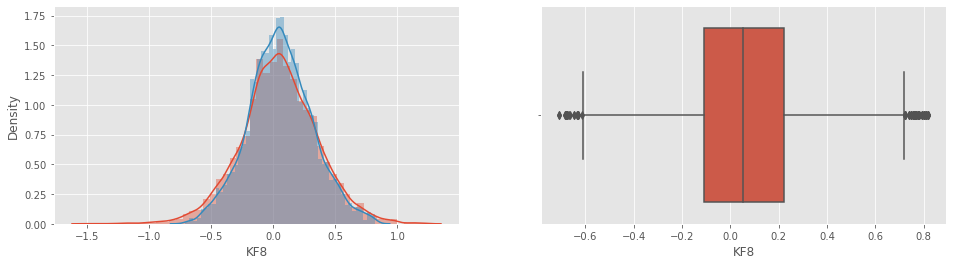

In [103]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['KF8'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['KF8'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['KF8'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['KF8'])
f.add_subplot(1,2,1)
sns.distplot(df_out['KF8'])

Original feature skewness with orange color long tail in distplot: -0.16837858684565296
Cleaned feature new skewness with blue color short  tail in displot: -0.07148376805226347
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='KF9', ylabel='Density'>

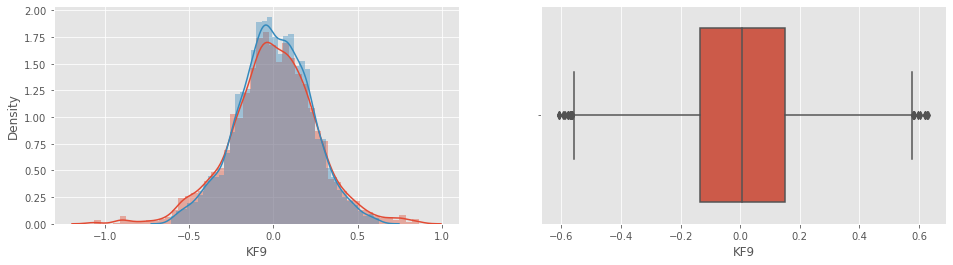

In [104]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['KF9'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['KF9'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['KF9'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['KF9'])
f.add_subplot(1,2,1)
sns.distplot(df_out['KF9'])

Original feature skewness with orange color long tail in distplot: -0.3808134961831936
Cleaned feature new skewness with blue color short  tail in displot: -0.14998141919428687
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='KF10', ylabel='Density'>

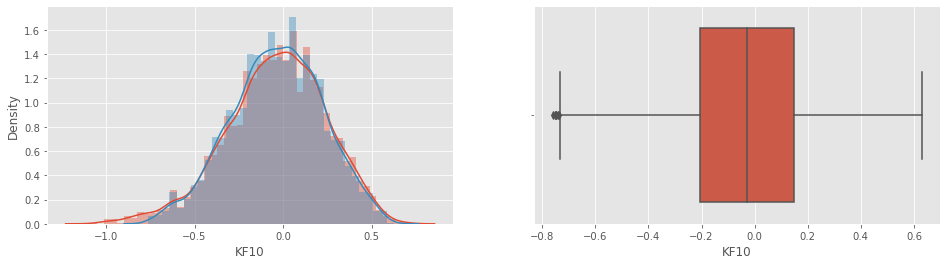

In [105]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['KF10'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['KF10'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['KF10'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['KF10'])
f.add_subplot(1,2,1)
sns.distplot(df_out['KF10'])

Original feature skewness with orange color long tail in distplot: -0.02792098005874518
Cleaned feature new skewness with blue color short  tail in displot: -0.066923257627468
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='Z1', ylabel='Density'>

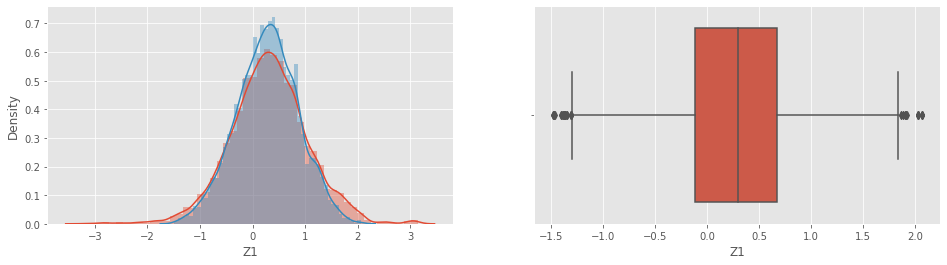

In [106]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['Z1'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['Z1'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['Z1'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['Z1'])
f.add_subplot(1,2,1)
sns.distplot(df_out['Z1'])

Original feature skewness with orange color long tail in distplot: -0.385823778573024
Cleaned feature new skewness with blue color short  tail in displot: -0.20575347970344213
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='Z2', ylabel='Density'>

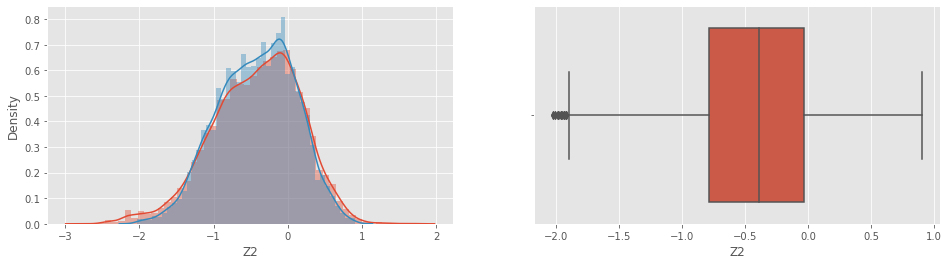

In [107]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['Z2'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['Z2'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['Z2'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['Z2'])
f.add_subplot(1,2,1)
sns.distplot(df_out['Z2'])

Original feature skewness with orange color long tail in distplot: 0.07407990631269781
Cleaned feature new skewness with blue color short  tail in displot: -0.040139890982336286
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='Z3', ylabel='Density'>

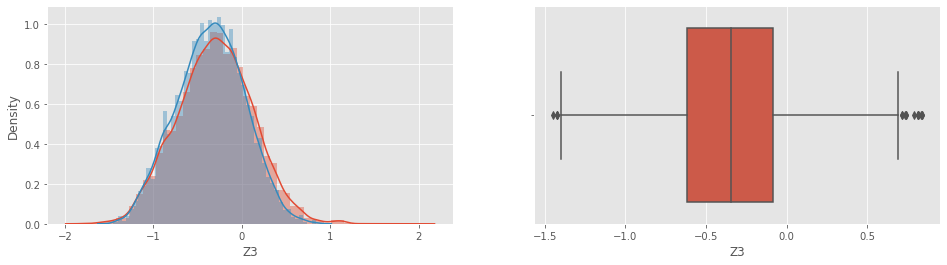

In [108]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['Z3'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['Z3'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['Z3'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['Z3'])
f.add_subplot(1,2,1)
sns.distplot(df_out['Z3'])

Original feature skewness with orange color long tail in distplot: 0.34205203761436903
Cleaned feature new skewness with blue color short  tail in displot: 0.17413448595143574
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='Z4', ylabel='Density'>

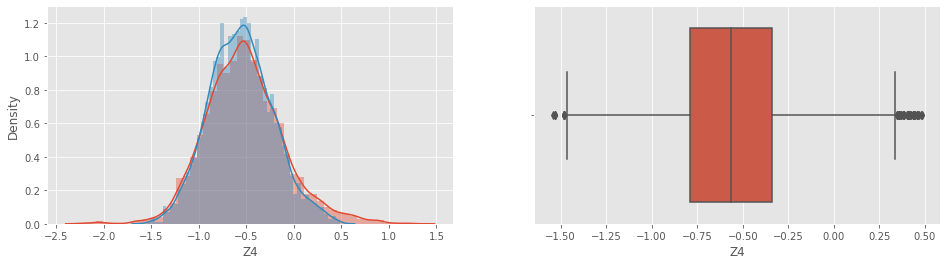

In [109]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['Z4'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['Z4'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['Z4'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['Z4'])
f.add_subplot(1,2,1)
sns.distplot(df_out['Z4'])

Original feature skewness with orange color long tail in distplot: 0.2628223182306741
Cleaned feature new skewness with blue color short  tail in displot: -0.11331249622232238
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='Z5', ylabel='Density'>

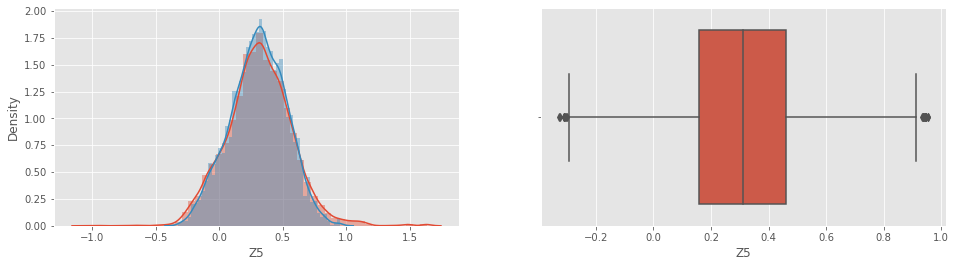

In [110]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['Z5'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['Z5'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['Z5'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['Z5'])
f.add_subplot(1,2,1)
sns.distplot(df_out['Z5'])

Original feature skewness with orange color long tail in distplot: 0.20545450700388324
Cleaned feature new skewness with blue color short  tail in displot: 0.024956845917429193
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='F1', ylabel='Density'>

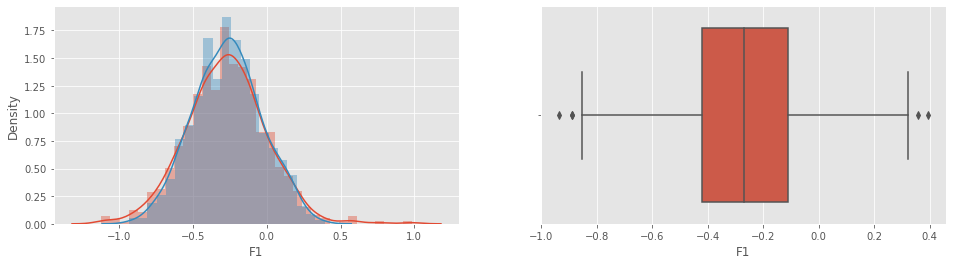

In [111]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['F1'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['F1'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['F1'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['F1'])
f.add_subplot(1,2,1)
sns.distplot(df_out['F1'])

Original feature skewness with orange color long tail in distplot: -0.5059165402395616
Cleaned feature new skewness with blue color short  tail in displot: -0.13842441294168908
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='F2', ylabel='Density'>

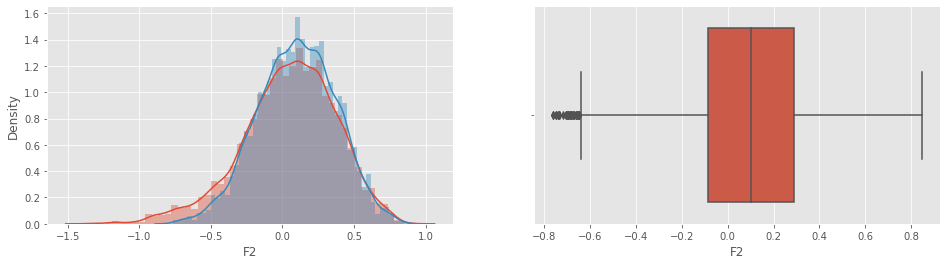

In [112]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['F2'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['F2'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['F2'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['F2'])
f.add_subplot(1,2,1)
sns.distplot(df_out['F2'])

Original feature skewness with orange color long tail in distplot: -0.22962427973332658
Cleaned feature new skewness with blue color short  tail in displot: -0.08920161856359733
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='F3', ylabel='Density'>

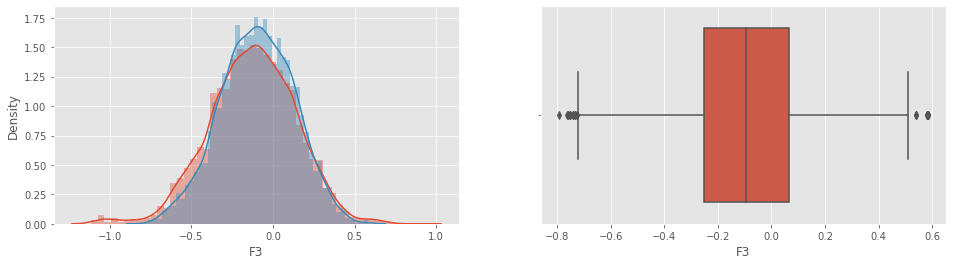

In [113]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['F3'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['F3'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['F3'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['F3'])
f.add_subplot(1,2,1)
sns.distplot(df_out['F3'])

Original feature skewness with orange color long tail in distplot: -0.12430709177225478
Cleaned feature new skewness with blue color short  tail in displot: -0.03725677035288746
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='F4', ylabel='Density'>

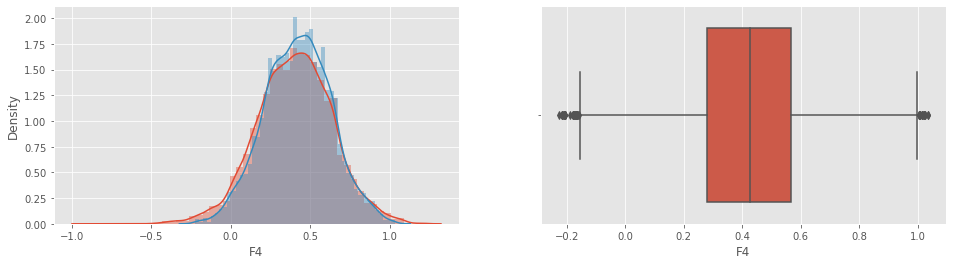

In [114]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['F4'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['F4'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['F4'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['F4'])
f.add_subplot(1,2,1)
sns.distplot(df_out['F4'])

Original feature skewness with orange color long tail in distplot: 1.5539299561471178
Cleaned feature new skewness with blue color short  tail in displot: 0.5107131726420393
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='F5', ylabel='Density'>

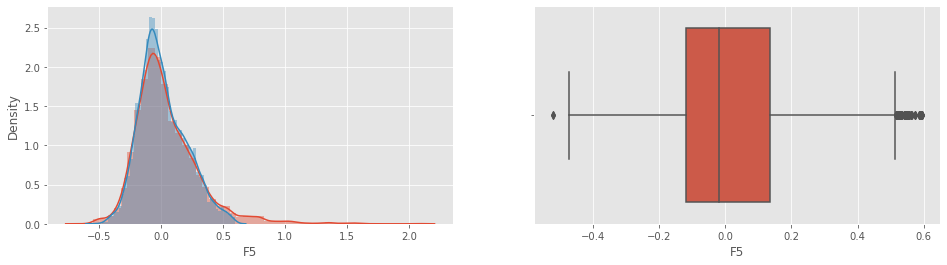

In [115]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['F5'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['F5'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['F5'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['F5'])
f.add_subplot(1,2,1)
sns.distplot(df_out['F5'])

Original feature skewness with orange color long tail in distplot: 0.010599557694810127
Cleaned feature new skewness with blue color short  tail in displot: -0.004903440234305573
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='F6', ylabel='Density'>

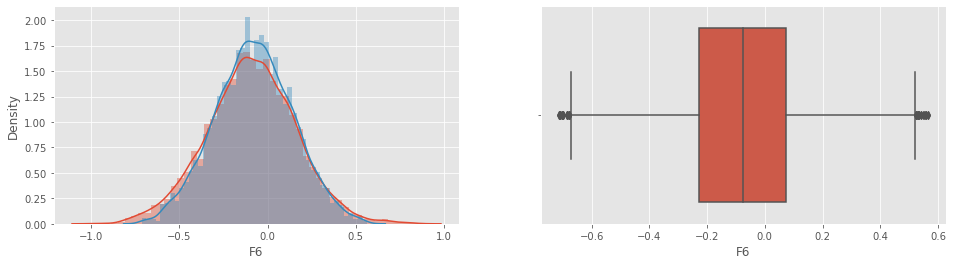

In [116]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['F6'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['F6'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['F6'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['F6'])
f.add_subplot(1,2,1)
sns.distplot(df_out['F6'])

Original feature skewness with orange color long tail in distplot: -0.3059357279159473
Cleaned feature new skewness with blue color short  tail in displot: -0.12919678721520048
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='T1', ylabel='Density'>

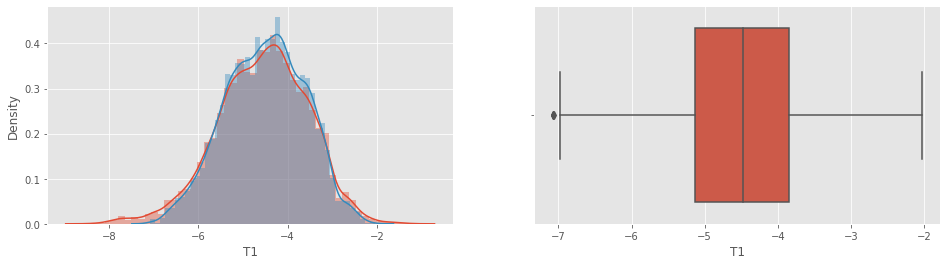

In [117]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['T1'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['T1'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['T1'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['T1'])
f.add_subplot(1,2,1)
sns.distplot(df_out['T1'])

Original feature skewness with orange color long tail in distplot: -0.14679771600302943
Cleaned feature new skewness with blue color short  tail in displot: -0.005412112186802333
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='T2', ylabel='Density'>

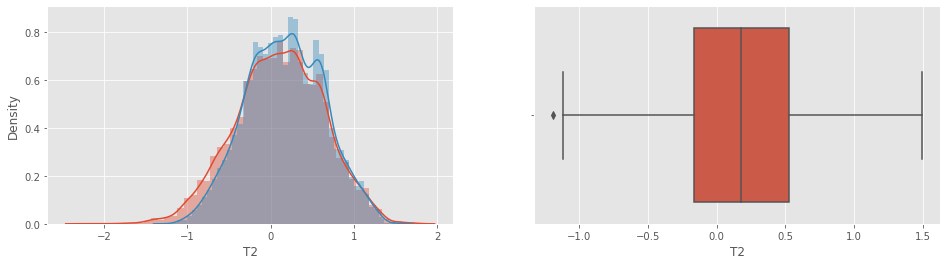

In [118]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['T2'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['T2'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['T2'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['T2'])
f.add_subplot(1,2,1)
sns.distplot(df_out['T2'])

Original feature skewness with orange color long tail in distplot: -0.05029696732290187
Cleaned feature new skewness with blue color short  tail in displot: -0.17849966420732882
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='T3', ylabel='Density'>

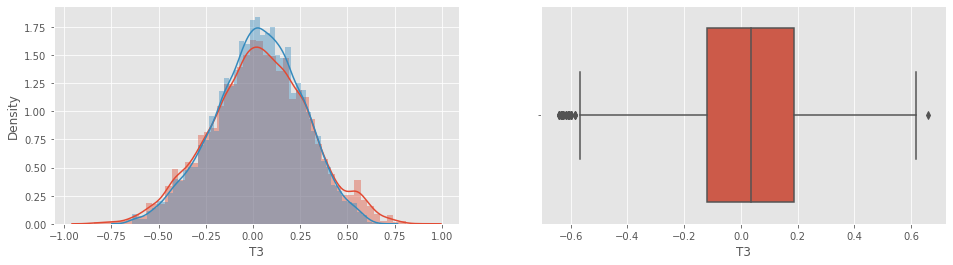

In [119]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['T3'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['T3'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['T3'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['T3'])
f.add_subplot(1,2,1)
sns.distplot(df_out['T3'])

Original feature skewness with orange color long tail in distplot: -0.09183782802184043
Cleaned feature new skewness with blue color short  tail in displot: -0.15160807378627322
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='T4', ylabel='Density'>

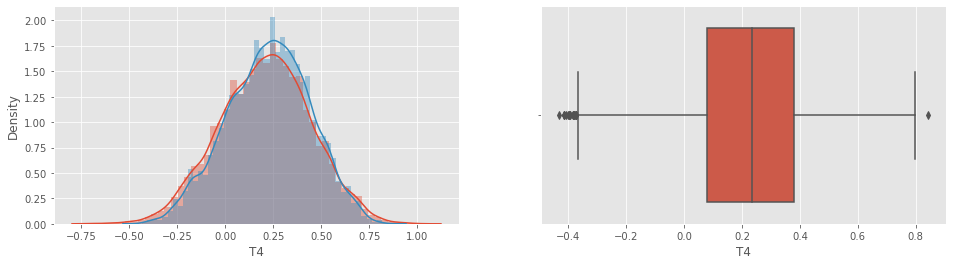

In [120]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['T4'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['T4'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['T4'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['T4'])
f.add_subplot(1,2,1)
sns.distplot(df_out['T4'])

Original feature skewness with orange color long tail in distplot: 0.6238211827151714
Cleaned feature new skewness with blue color short  tail in displot: 0.3341509768213834
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='T5', ylabel='Density'>

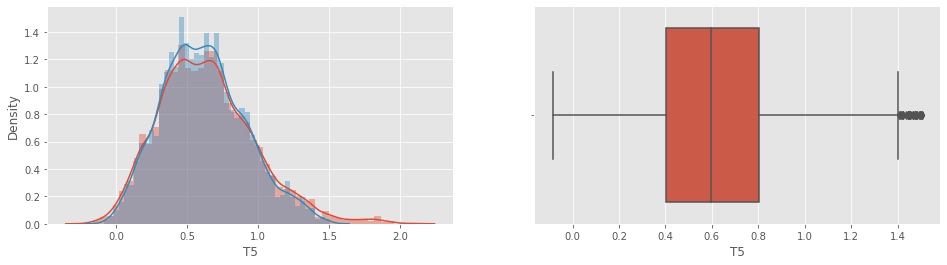

In [121]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['T5'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['T5'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['T5'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['T5'])
f.add_subplot(1,2,1)
sns.distplot(df_out['T5'])

Original feature skewness with orange color long tail in distplot: 0.06816381822351157
Cleaned feature new skewness with blue color short  tail in displot: 0.036603850268903546
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='VHSE1', ylabel='Density'>

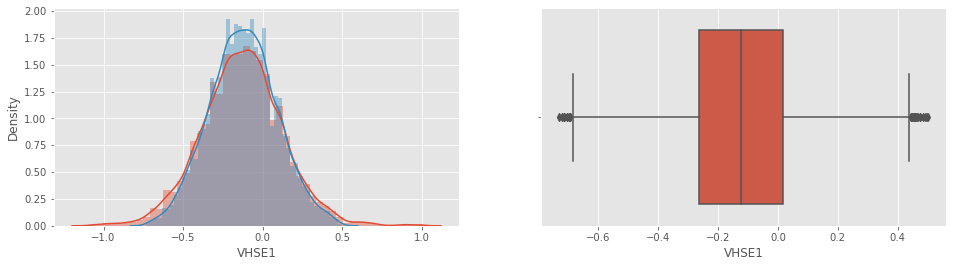

In [122]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['VHSE1'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['VHSE1'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['VHSE1'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['VHSE1'])
f.add_subplot(1,2,1)
sns.distplot(df_out['VHSE1'])

Original feature skewness with orange color long tail in distplot: -0.2248213430285739
Cleaned feature new skewness with blue color short  tail in displot: -0.08860660648732509
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='VHSE2', ylabel='Density'>

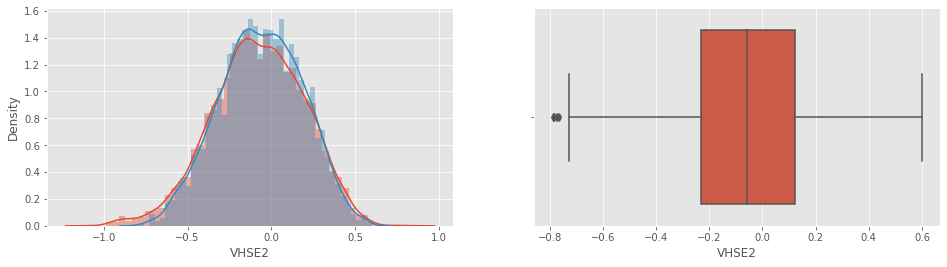

In [123]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['VHSE2'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['VHSE2'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['VHSE2'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['VHSE2'])
f.add_subplot(1,2,1)
sns.distplot(df_out['VHSE2'])

Original feature skewness with orange color long tail in distplot: -0.5784555775343598
Cleaned feature new skewness with blue color short  tail in displot: -0.28040546768749647
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='VHSE3', ylabel='Density'>

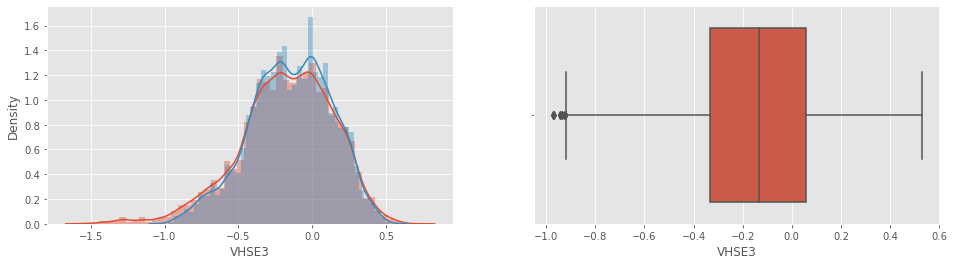

In [124]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['VHSE3'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['VHSE3'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['VHSE3'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['VHSE3'])
f.add_subplot(1,2,1)
sns.distplot(df_out['VHSE3'])

Original feature skewness with orange color long tail in distplot: 0.33755950811086577
Cleaned feature new skewness with blue color short  tail in displot: 0.0823256257294131
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='VHSE4', ylabel='Density'>

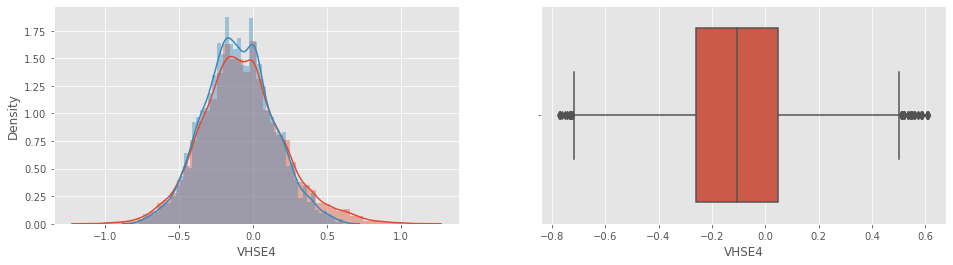

In [125]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['VHSE4'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['VHSE4'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['VHSE4'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['VHSE4'])
f.add_subplot(1,2,1)
sns.distplot(df_out['VHSE4'])

Original feature skewness with orange color long tail in distplot: -0.4101557150960778
Cleaned feature new skewness with blue color short  tail in displot: -0.09119143804679421
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='VHSE5', ylabel='Density'>

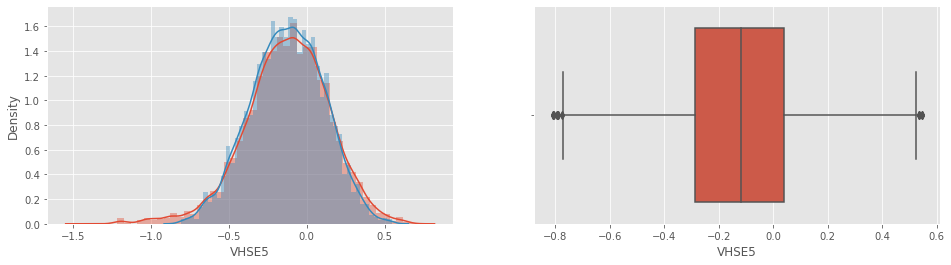

In [126]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['VHSE5'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['VHSE5'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['VHSE5'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['VHSE5'])
f.add_subplot(1,2,1)
sns.distplot(df_out['VHSE5'])

Original feature skewness with orange color long tail in distplot: -0.1613201779481616
Cleaned feature new skewness with blue color short  tail in displot: -0.08784791640769042
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='VHSE6', ylabel='Density'>

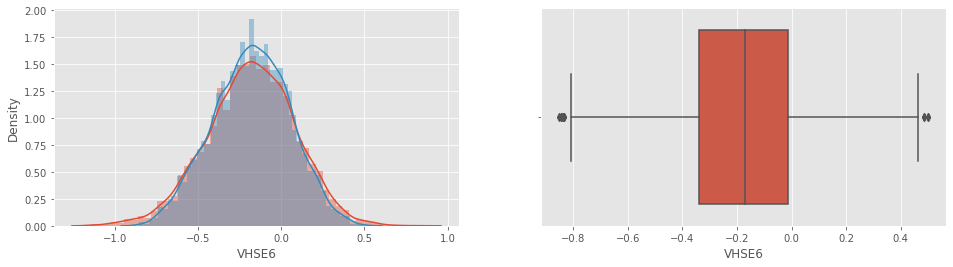

In [127]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['VHSE6'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['VHSE6'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['VHSE6'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['VHSE6'])
f.add_subplot(1,2,1)
sns.distplot(df_out['VHSE6'])

Original feature skewness with orange color long tail in distplot: 0.08028793343223058
Cleaned feature new skewness with blue color short  tail in displot: -0.02205753055298458
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='VHSE7', ylabel='Density'>

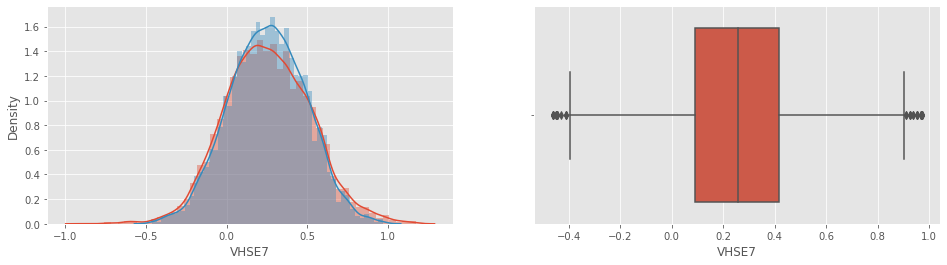

In [128]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['VHSE7'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['VHSE7'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['VHSE7'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['VHSE7'])
f.add_subplot(1,2,1)
sns.distplot(df_out['VHSE7'])

Original feature skewness with orange color long tail in distplot: 1.3194398604191742
Cleaned feature new skewness with blue color short  tail in displot: 0.34249681641929663
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='VHSE8', ylabel='Density'>

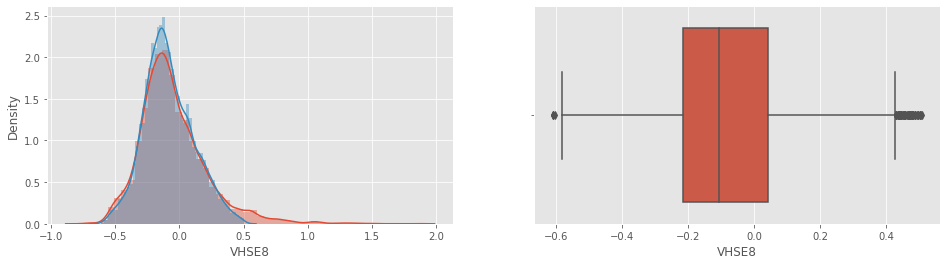

In [129]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['VHSE8'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['VHSE8'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['VHSE8'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['VHSE8'])
f.add_subplot(1,2,1)
sns.distplot(df_out['VHSE8'])

Original feature skewness with orange color long tail in distplot: 0.005063312366699313
Cleaned feature new skewness with blue color short  tail in displot: 0.018149155608255998
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ProtFP1', ylabel='Density'>

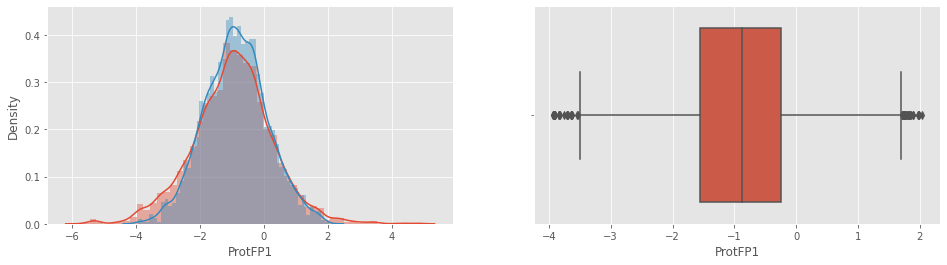

In [130]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ProtFP1'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ProtFP1'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP1'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ProtFP1'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ProtFP1'])

Original feature skewness with orange color long tail in distplot: -0.33281227070480474
Cleaned feature new skewness with blue color short  tail in displot: -0.12762736284482942
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ProtFP2', ylabel='Density'>

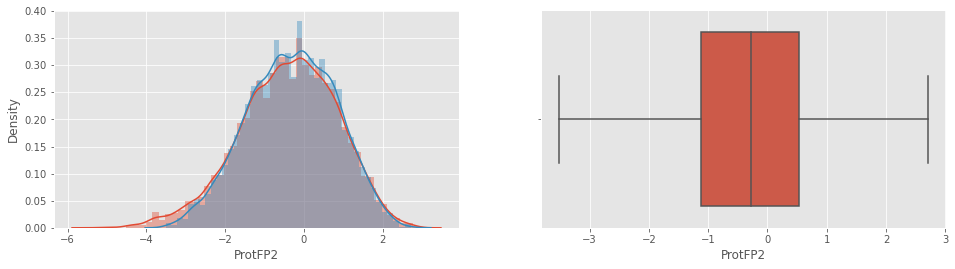

In [131]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ProtFP2'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ProtFP2'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP2'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ProtFP2'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ProtFP2'])

Original feature skewness with orange color long tail in distplot: 0.5070643451781158
Cleaned feature new skewness with blue color short  tail in displot: 0.32951561463602136
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ProtFP3', ylabel='Density'>

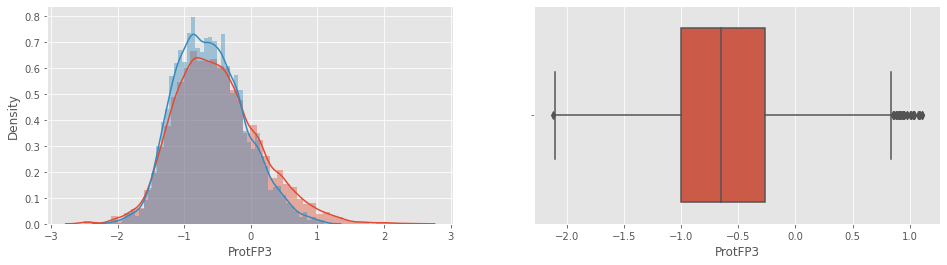

In [132]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ProtFP3'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ProtFP3'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP3'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ProtFP3'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ProtFP3'])

Original feature skewness with orange color long tail in distplot: -0.3320897421833068
Cleaned feature new skewness with blue color short  tail in displot: -0.17410151365980162
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ProtFP4', ylabel='Density'>

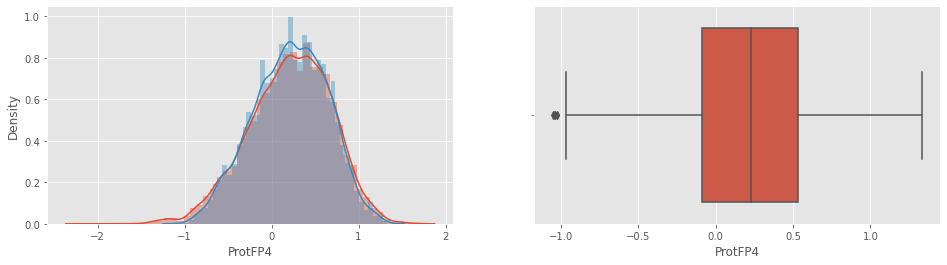

In [133]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ProtFP4'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ProtFP4'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP4'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ProtFP4'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ProtFP4'])

Original feature skewness with orange color long tail in distplot: -0.05221415384880116
Cleaned feature new skewness with blue color short  tail in displot: -0.03897651100395475
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ProtFP5', ylabel='Density'>

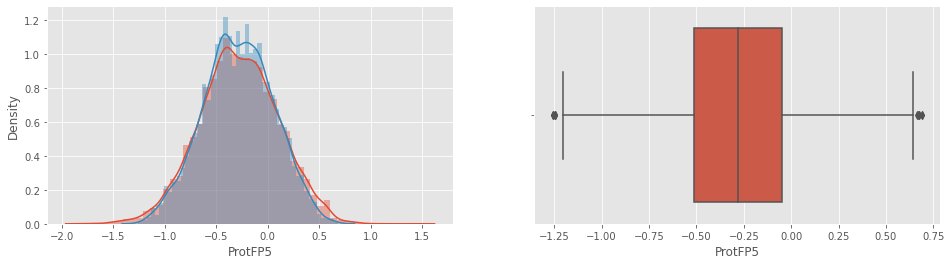

In [134]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ProtFP5'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ProtFP5'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP5'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ProtFP5'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ProtFP5'])

Original feature skewness with orange color long tail in distplot: -0.32448827023278576
Cleaned feature new skewness with blue color short  tail in displot: -0.004229280232286323
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ProtFP6', ylabel='Density'>

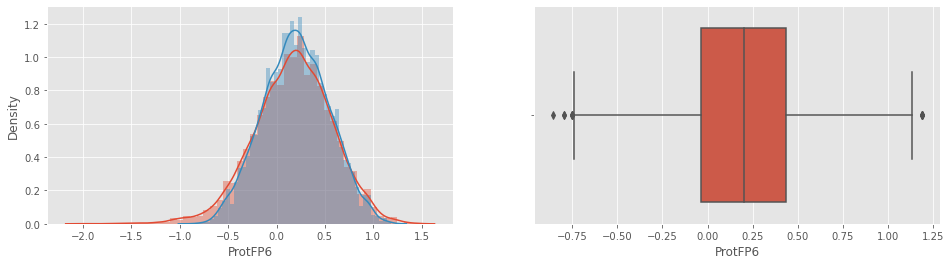

In [135]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ProtFP6'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ProtFP6'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP6'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ProtFP6'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ProtFP6'])

Original feature skewness with orange color long tail in distplot: -0.39023021748396086
Cleaned feature new skewness with blue color short  tail in displot: -0.2296797129691617
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ProtFP7', ylabel='Density'>

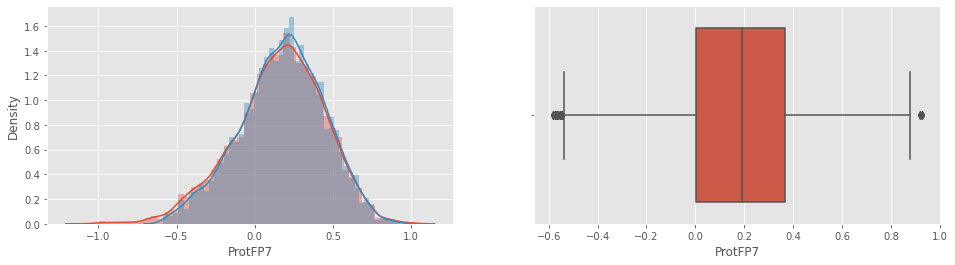

In [136]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ProtFP7'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ProtFP7'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP7'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ProtFP7'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ProtFP7'])

Original feature skewness with orange color long tail in distplot: -0.23838135499355734
Cleaned feature new skewness with blue color short  tail in displot: -0.01024205094851217
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ProtFP8', ylabel='Density'>

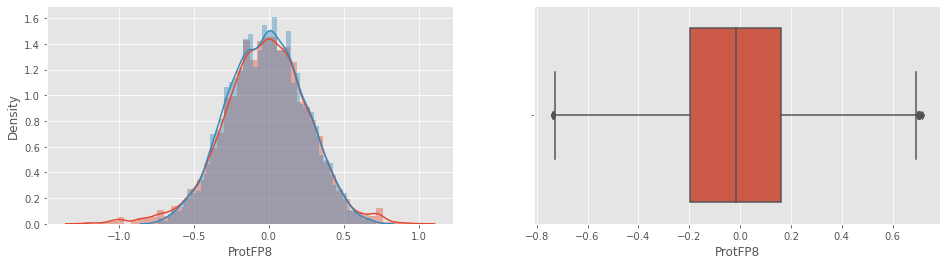

In [137]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ProtFP8'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ProtFP8'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ProtFP8'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ProtFP8'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ProtFP8'])

Original feature skewness with orange color long tail in distplot: -0.25113521525441823
Cleaned feature new skewness with blue color short  tail in displot: -0.09021584580043622
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ST1', ylabel='Density'>

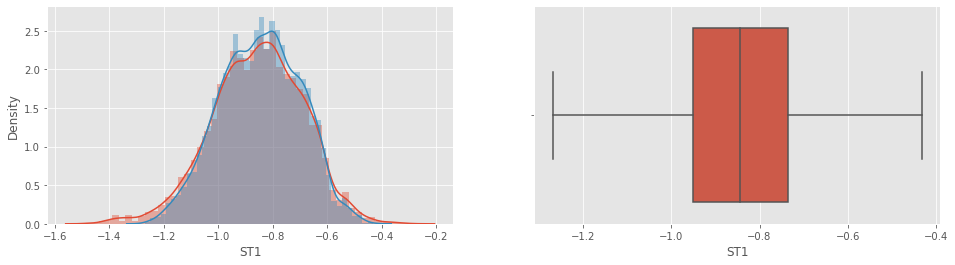

In [138]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ST1'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ST1'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ST1'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ST1'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ST1'])

Original feature skewness with orange color long tail in distplot: 0.011727058689388349
Cleaned feature new skewness with blue color short  tail in displot: 0.04883310704998438
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ST2', ylabel='Density'>

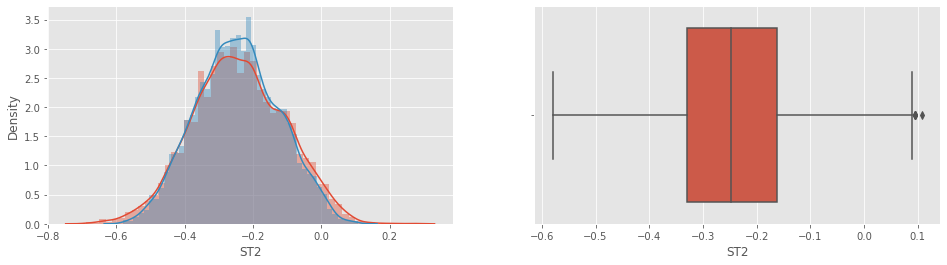

In [139]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ST2'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ST2'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ST2'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ST2'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ST2'])

Original feature skewness with orange color long tail in distplot: 0.05822001771436881
Cleaned feature new skewness with blue color short  tail in displot: 0.13128614619032514
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ST3', ylabel='Density'>

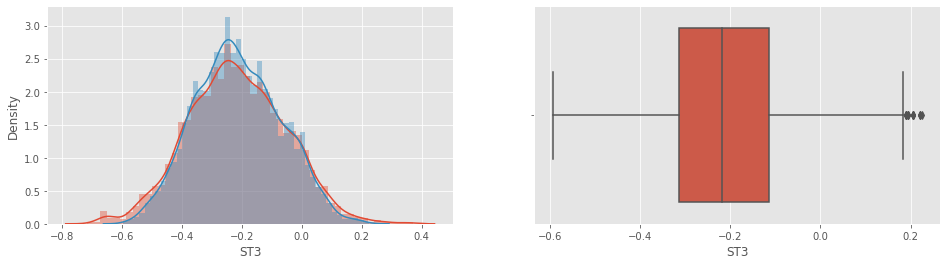

In [140]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ST3'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ST3'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ST3'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ST3'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ST3'])

Original feature skewness with orange color long tail in distplot: 0.40335945083645613
Cleaned feature new skewness with blue color short  tail in displot: 0.273495928423386
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ST4', ylabel='Density'>

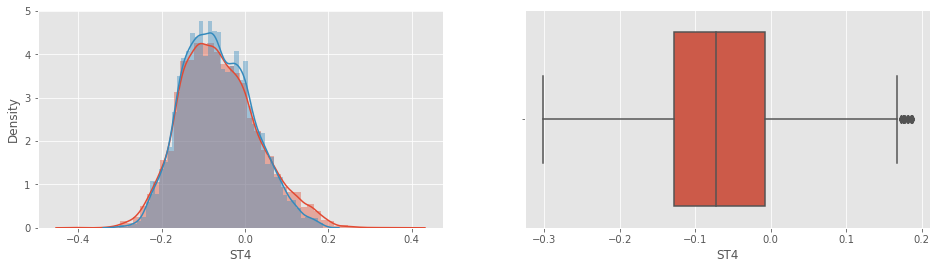

In [141]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ST4'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ST4'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ST4'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ST4'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ST4'])

Original feature skewness with orange color long tail in distplot: 0.015609317771528785
Cleaned feature new skewness with blue color short  tail in displot: -0.08341515926976346
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ST5', ylabel='Density'>

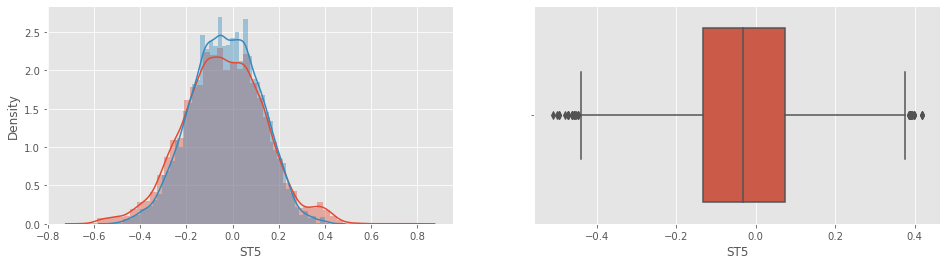

In [142]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ST5'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ST5'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ST5'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ST5'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ST5'])

Original feature skewness with orange color long tail in distplot: -0.4883650651481308
Cleaned feature new skewness with blue color short  tail in displot: -0.19455804537283353
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ST6', ylabel='Density'>

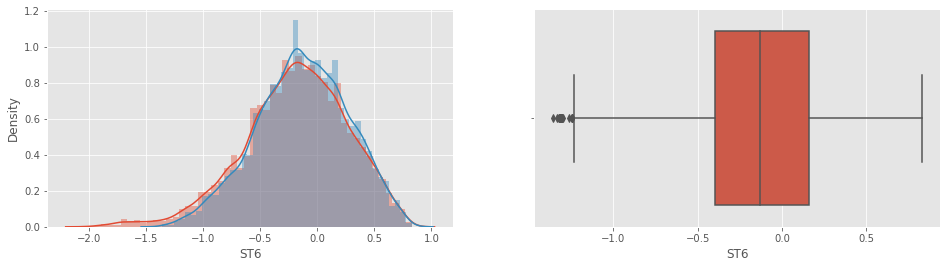

In [143]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ST6'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ST6'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ST6'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ST6'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ST6'])

Original feature skewness with orange color long tail in distplot: 0.2854960123883287
Cleaned feature new skewness with blue color short  tail in displot: -0.02004510707769131
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ST7', ylabel='Density'>

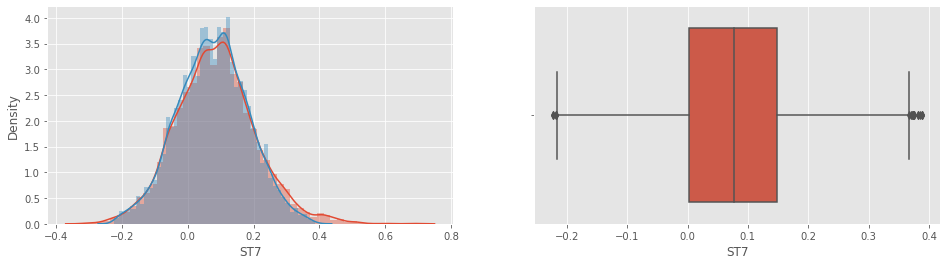

In [144]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ST7'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ST7'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ST7'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ST7'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ST7'])

Original feature skewness with orange color long tail in distplot: 0.5184103739616988
Cleaned feature new skewness with blue color short  tail in displot: 0.3679271295686574
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='ST8', ylabel='Density'>

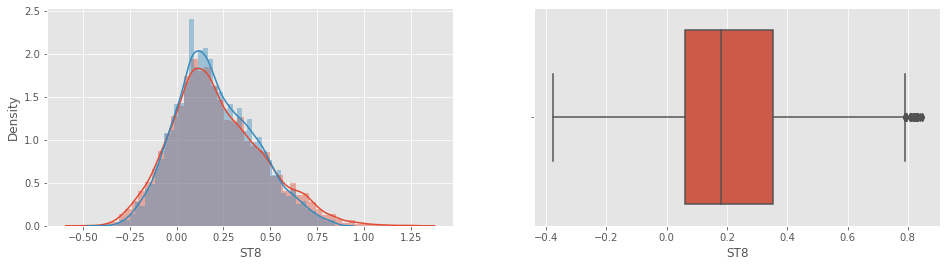

In [145]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['ST8'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['ST8'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['ST8'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['ST8'])
f.add_subplot(1,2,1)
sns.distplot(df_out['ST8'])

Original feature skewness with orange color long tail in distplot: 0.05224930055462429
Cleaned feature new skewness with blue color short  tail in displot: -0.0018660854880865512
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='BLOSUM1', ylabel='Density'>

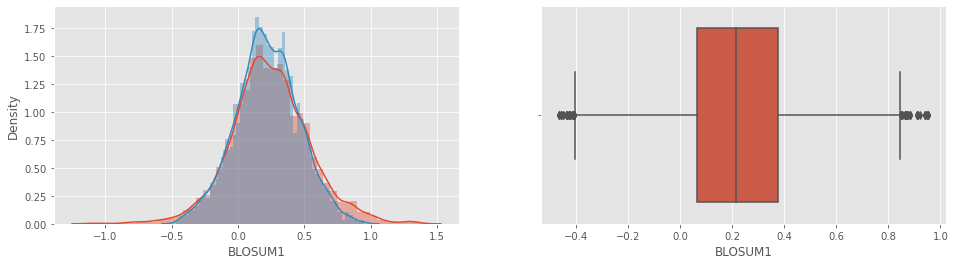

In [146]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['BLOSUM1'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['BLOSUM1'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM1'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['BLOSUM1'])
f.add_subplot(1,2,1)
sns.distplot(df_out['BLOSUM1'])

Original feature skewness with orange color long tail in distplot: 0.3008872469392341
Cleaned feature new skewness with blue color short  tail in displot: 0.252552039391723
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='BLOSUM2', ylabel='Density'>

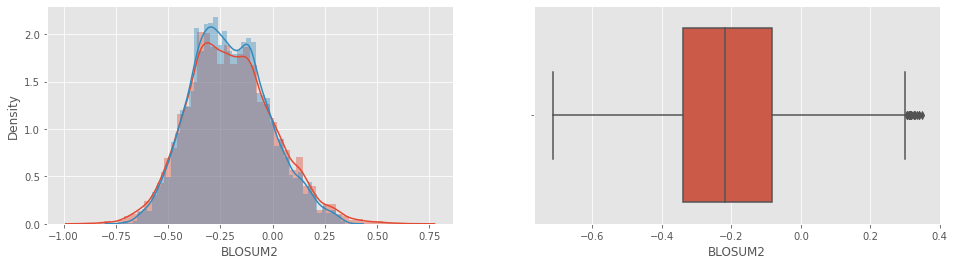

In [147]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['BLOSUM2'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['BLOSUM2'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM2'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['BLOSUM2'])
f.add_subplot(1,2,1)
sns.distplot(df_out['BLOSUM2'])

Original feature skewness with orange color long tail in distplot: 0.5501112560417255
Cleaned feature new skewness with blue color short  tail in displot: 0.24463915156217045
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='BLOSUM3', ylabel='Density'>

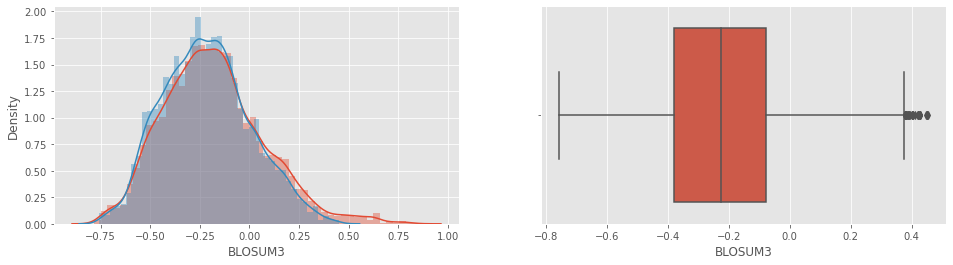

In [148]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['BLOSUM3'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['BLOSUM3'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM3'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['BLOSUM3'])
f.add_subplot(1,2,1)
sns.distplot(df_out['BLOSUM3'])

Original feature skewness with orange color long tail in distplot: -0.05370099465504765
Cleaned feature new skewness with blue color short  tail in displot: 0.016660184747336878
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='BLOSUM4', ylabel='Density'>

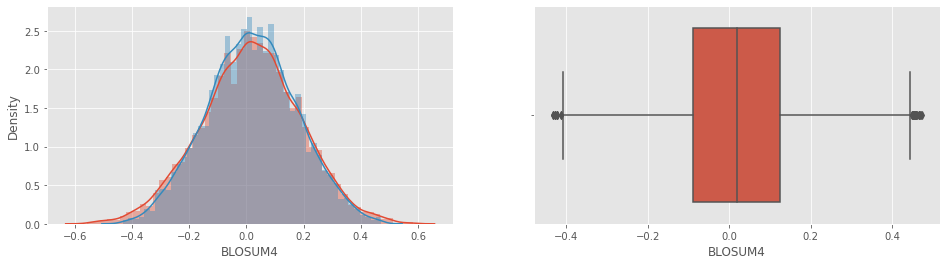

In [149]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['BLOSUM4'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['BLOSUM4'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM4'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['BLOSUM4'])
f.add_subplot(1,2,1)
sns.distplot(df_out['BLOSUM4'])

Original feature skewness with orange color long tail in distplot: 0.06187409132557913
Cleaned feature new skewness with blue color short  tail in displot: -0.0339246488709308
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='BLOSUM5', ylabel='Density'>

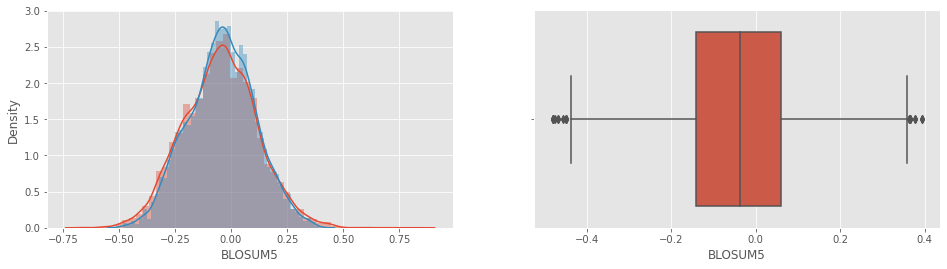

In [150]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['BLOSUM5'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['BLOSUM5'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM5'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['BLOSUM5'])
f.add_subplot(1,2,1)
sns.distplot(df_out['BLOSUM5'])

Original feature skewness with orange color long tail in distplot: -0.7810206433097696
Cleaned feature new skewness with blue color short  tail in displot: -0.18264984753407604
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='BLOSUM6', ylabel='Density'>

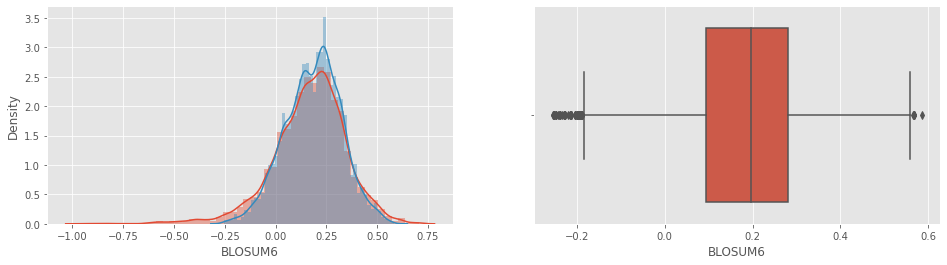

In [151]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['BLOSUM6'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['BLOSUM6'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM6'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['BLOSUM6'])
f.add_subplot(1,2,1)
sns.distplot(df_out['BLOSUM6'])

Original feature skewness with orange color long tail in distplot: 0.2450926212811337
Cleaned feature new skewness with blue color short  tail in displot: 0.2232193602771787
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='BLOSUM7', ylabel='Density'>

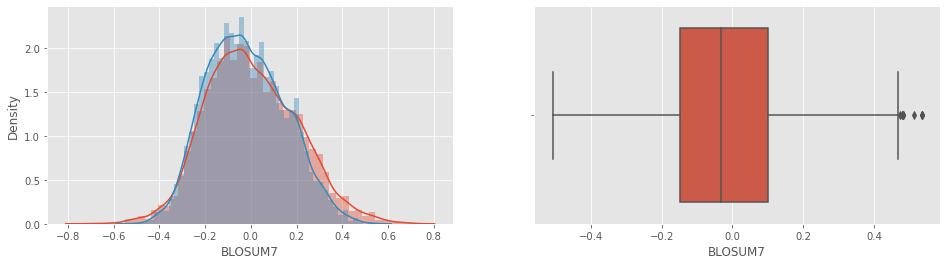

In [152]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['BLOSUM7'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['BLOSUM7'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM7'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['BLOSUM7'])
f.add_subplot(1,2,1)
sns.distplot(df_out['BLOSUM7'])

Original feature skewness with orange color long tail in distplot: -0.7321853940957384
Cleaned feature new skewness with blue color short  tail in displot: -0.4134293027117168
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='BLOSUM8', ylabel='Density'>

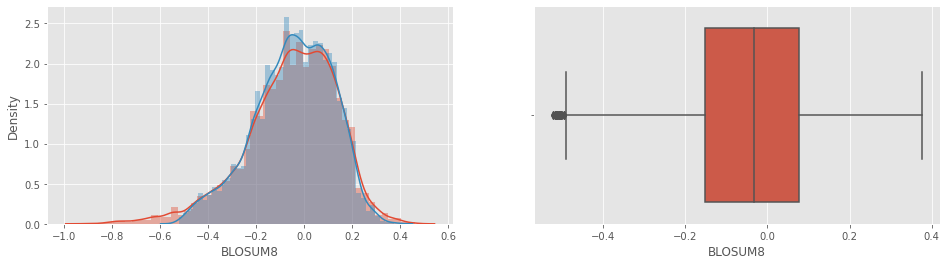

In [153]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['BLOSUM8'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['BLOSUM8'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM8'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['BLOSUM8'])
f.add_subplot(1,2,1)
sns.distplot(df_out['BLOSUM8'])

Original feature skewness with orange color long tail in distplot: -0.11283996874624591
Cleaned feature new skewness with blue color short  tail in displot: -0.006116673583575805
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='BLOSUM9', ylabel='Density'>

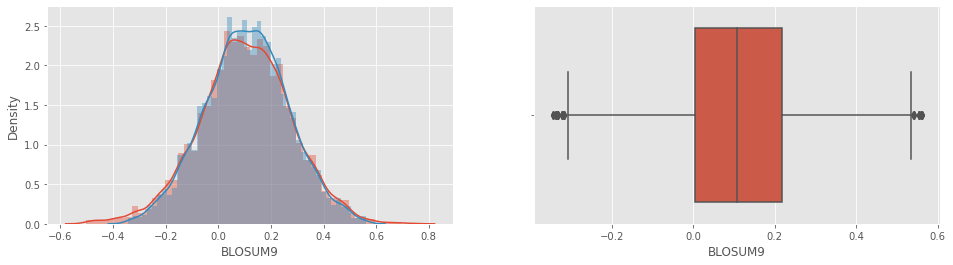

In [154]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['BLOSUM9'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['BLOSUM9'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM9'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['BLOSUM9'])
f.add_subplot(1,2,1)
sns.distplot(df_out['BLOSUM9'])

Original feature skewness with orange color long tail in distplot: -0.10179694290051473
Cleaned feature new skewness with blue color short  tail in displot: -0.08095687125379701
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='BLOSUM10', ylabel='Density'>

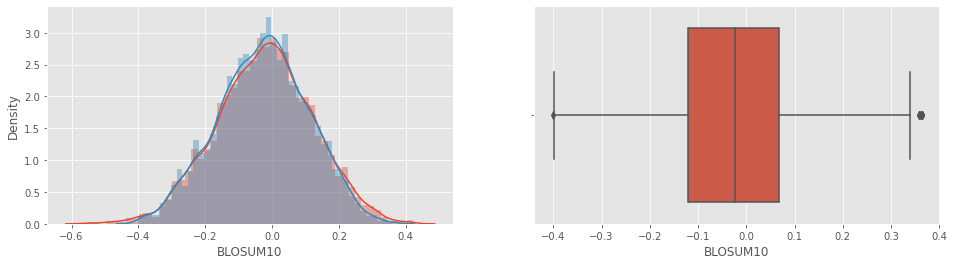

In [155]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['BLOSUM10'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['BLOSUM10'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['BLOSUM10'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['BLOSUM10'])
f.add_subplot(1,2,1)
sns.distplot(df_out['BLOSUM10'])

Original feature skewness with orange color long tail in distplot: 0.22169199188570773
Cleaned feature new skewness with blue color short  tail in displot: 0.19304827682325143
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='MSWHIM1', ylabel='Density'>

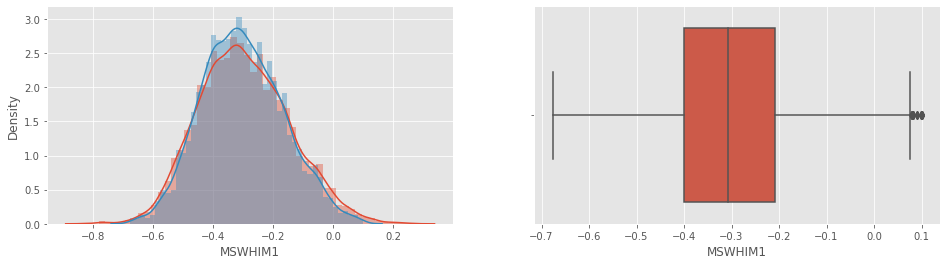

In [156]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['MSWHIM1'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['MSWHIM1'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['MSWHIM1'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['MSWHIM1'])
f.add_subplot(1,2,1)
sns.distplot(df_out['MSWHIM1'])

Original feature skewness with orange color long tail in distplot: -0.3489315035030427
Cleaned feature new skewness with blue color short  tail in displot: 0.011298326692252685
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='MSWHIM2', ylabel='Density'>

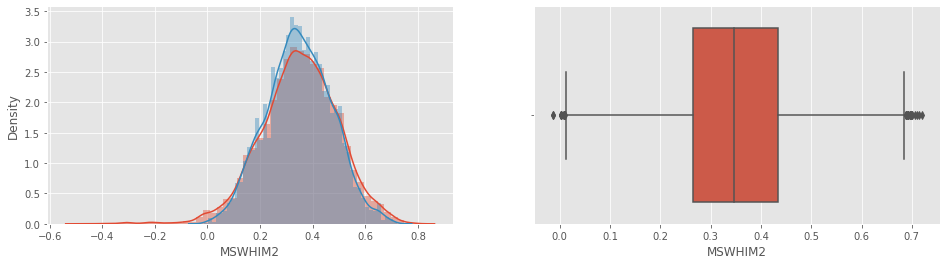

In [157]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['MSWHIM2'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['MSWHIM2'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['MSWHIM2'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['MSWHIM2'])
f.add_subplot(1,2,1)
sns.distplot(df_out['MSWHIM2'])

Original feature skewness with orange color long tail in distplot: 0.15686605274141377
Cleaned feature new skewness with blue color short  tail in displot: 0.23609728329804483
Boxplot showing feature cleaned of outliers


<AxesSubplot:xlabel='MSWHIM3', ylabel='Density'>

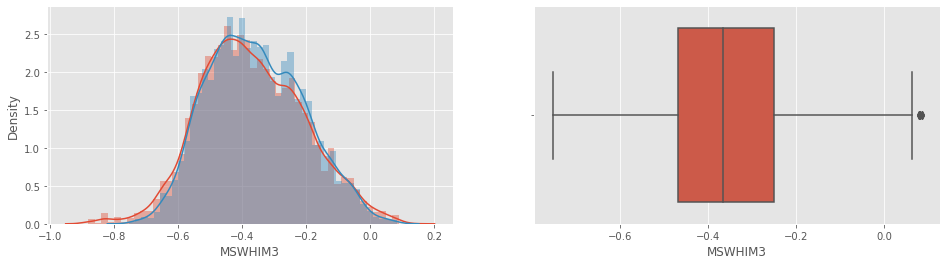

In [158]:
f=plt.figure(figsize=(16,4))
print('Original feature skewness with orange color long tail in distplot:',df['MSWHIM3'].skew()) #Original feature skewness
print('Cleaned feature new skewness with blue color short  tail in displot:',df_out['MSWHIM3'].skew()) # Cleaned features with new skewness
print('Boxplot showing feature cleaned of outliers')
f.add_subplot(1,2,1)
sns.distplot(df['MSWHIM3'])
f.add_subplot(1,2,2)
sns.boxplot(df_out['MSWHIM3'])
f.add_subplot(1,2,1)
sns.distplot(df_out['MSWHIM3'])

#### Cleaning the Hold-out set

In [159]:
Q1 = Val_df.quantile(0.25)
Q3 = Val_df.quantile(0.75)
IQR = Q3 - Q1

In [160]:
Val_df.shape

(15000, 68)

In [161]:
#print(Val_df < (Q1 - 1.5 * IQR)) |(Val_df > (Q3 + 1.5 * IQR))

The below code shows that the cleaned dataset has reduced from 15,000 to 10107.

In [162]:
#IQR scores calculated earlier to remove outliers
Valdf = Val_df[~((df < (Q1 - 1.5 * IQR)) |(Val_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Valdf.shape)

(10107, 68)


##### Drop Duplicates

Training set

In [163]:
df_out.duplicated().sum() 

6

In [164]:
df_out.drop_duplicates(keep=False, inplace=True)
df_out.duplicated().sum()

0

Hold-Out set

In [165]:
Valdf.duplicated().sum()

47

In [166]:
Valdf.drop_duplicates(keep=False, inplace=True)
Valdf.duplicated().sum()

0

## DATA PREPROCESSING 

The data set at this point was splitted before removing the missing value, this is to avoid data leakage. An occurance where common information are share between the training data and the testing data. In this report, mean was used for imputation, that is the nan values are replace with the means of each data values. Imputing the mean of the data for the missing data before splitting, allows a common information to be shared. But separating the data so as to avoid common information been share will prevent data leakage.  This was achieved by spliting the dataset into training and testing and then cleaning the nan values separately from the training and testing set. https://dl.acm.org/doi/pdf/10.1145/2382577.2382579,
https://www.youtube.com/watch?v=n9jz7G68pVg,
https://www.youtube.com/watch?v=yuOOo0FQklQ.

In addition, to avoid overfitting, the traning dataset data was splitted equally (50%) for training and testing. I have worked with two senario to determine this split was better. Initially, I worked with 80:20 split. Result clearly showed a higher scores for training set but when deployed to the testing the accuracy was low.  Therefore, I have ascertained equal split is better and have implemented it in the training of the model.

The Same process was applied to both training dataset and hold-out dataset

In [167]:
# Creating a vector for Training data set
X_T=df_out.iloc[:,:-1]
y_T=df_out['Class'] = pd.factorize(df_out.Class)[0]
X_T.shape

(11239, 68)

In [168]:
X_V=Valdf.iloc[:,:]# Vector for Hold out dataset

Spliting of the Dataset

In [169]:
# Trainng Data set
from sklearn.model_selection import train_test_split
Xtrain_T, Xtest_T, ytrain_T, ytest_T = train_test_split(X_T, y_T, test_size=0.50, random_state=1)
Xtrain_T.shape, ytrain_T.shape,Xtest_T.shape,ytest_T.shape 

((5619, 68), (5619,), (5620, 68), (5620,))

The two data sets features with nan values removed

In [170]:
Xtrain_T[Xtrain_T.columns[Xtrain_T.isnull().any()]].isnull().sum() # Training dataset

KF6     2918
KF9     2918
KF10    2918
F1      5185
T2       186
ST7       32
dtype: int64

In [171]:
testV=pd.DataFrame(X_V)# Hold-out dataset

Cleaning the nan values by using mean TRAINING SET

In [172]:
Xtrain_T['KF6'].fillna(value =Xtrain_T['KF6'].mean(), inplace=True)
Xtrain_T['KF9'].fillna(value =Xtrain_T['KF9'].mean(), inplace=True)
Xtrain_T['KF10'].fillna(value =Xtrain_T['KF10'].mean(), inplace=True)
Xtrain_T['F1'].fillna(value =Xtrain_T['F1'].mean(), inplace=True)
Xtrain_T['T2'].fillna(value =Xtrain_T['T2'].mean(), inplace=True)
Xtrain_T['ST7'].fillna(value =Xtrain_T['ST7'].mean(), inplace=True)

In [173]:
Xtest_T['KF6'].fillna(value =Xtest_T['KF6'].mean(), inplace=True)
Xtest_T['KF9'].fillna(value =Xtest_T['KF9'].mean(), inplace=True)
Xtest_T['KF10'].fillna(value =Xtest_T['KF10'].mean(), inplace=True)
Xtest_T['F1'].fillna(value =Xtest_T['F1'].mean(), inplace=True)
Xtest_T['T2'].fillna(value =Xtest_T['T2'].mean(), inplace=True)
Xtest_T['ST7'].fillna(value =Xtest_T['ST7'].mean(), inplace=True)

Cleaning the nan values by using mean hold-out SET

In [174]:
testV['KF6'].fillna(value =testV['KF6'].mean(), inplace=True)
testV['KF9'].fillna(value =testV['KF9'].mean(), inplace=True)
testV['KF10'].fillna(value =testV['KF10'].mean(), inplace=True)
testV['F1'].fillna(value =testV['F1'].mean(), inplace=True)
testV['T2'].fillna(value =testV['T2'].mean(), inplace=True)
testV['ST7'].fillna(value =testV['ST7'].mean(), inplace=True)

All the data sets have been cleaned of Nan values

In [175]:
Xtrain_T[Xtrain_T.columns[Xtrain_T.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [176]:
testV[testV.columns[testV.isnull().any()]].isnull().sum()

Series([], dtype: float64)

Drop ID and Epitope columns as they cannot be used for training the model

In [177]:
# Training dataset
cols = [0,1]
Xtrain_T.drop(df_out.columns[cols], axis =1, inplace=True)
Xtest_T.drop(df_out.columns[cols], axis =1, inplace=True)

In [178]:
# Hold-out dataset
cols = [0,1]
#trainV.drop(XtrainV.columns[cols], axis =1, inplace=True)
testV.drop(testV.columns[cols], axis =1, inplace=True)

### SKLEARN MODULES for Scaling, Feature selection, Dimensional reduction and Model fitting

In [179]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix # For creation of the confusion matrix
from sklearn.metrics import classification_report # For creation of precision, recall and f1-measures
from sklearn.metrics import accuracy_score # For help in comparing data given using accuracy score vs confusion matrix
from sklearn.model_selection import cross_val_score
import warnings # Allows better control of warning messages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

##### HOLD-OUT DATASET Scaling and Feature selection using PCA

Pipeline was used for scaling and dimensionality reduction using principle component analysis 

In [180]:
pipeline_pca=Pipeline([('myscaler',StandardScaler()),
                     ('mypca',PCA(n_components=15))])
#pcaV=pipeline_pca.fit(Xtest_T,ytest_T) 
pcaV=pipeline_pca.fit(testV) 

##### DATASET Scaling, Feature Selection with pca and Model fiting of the imbalanced data set

Pipeline was used to perform scaling, dimensionality reduction and model training. The dataset was reduced from a high dimenionality to low dimension by selecting 15 features using the principle component Analysis.  Five models were used to trained the dataset, from which the model with the best accuracy was obtained.

In [181]:
pipeline_dt=Pipeline([('myscaler',StandardScaler()),
                     ('mypca',PCA(n_components=15)),
                     ('dt_classifier',DecisionTreeClassifier(criterion="entropy", max_depth=3))])
pipeline_lr=Pipeline([('scaler1', StandardScaler()),
                    ('pca1', PCA(n_components =15)),
                    ('lr_classifier', LogisticRegression(random_state =0))])
pipeline_nb=Pipeline([('scaler3', StandardScaler()),
                    ('pca3', PCA(n_components =15)),
                    ('nb_classifier', GaussianNB())])
pipeline_kn=Pipeline([('scaler4', StandardScaler()),
                    ('pca4', PCA(n_components =15)),
                    ('kn_classifier', KNeighborsClassifier())])
pipeline_rf=Pipeline([('scaler5', StandardScaler()),
                    ('pca5', PCA(n_components =15)),
                    ('rf_classifier', RandomForestClassifier())])

pipelines = [pipeline_dt, pipeline_lr, pipeline_nb, pipeline_kn, pipeline_rf]

best_accuracy=0.0
best_classifier=0
best_pipeline=""
pipe_dict = {0: 'Decision Tree', 1: 'Logistic Regression', 2: 'GaussianNB', 3: ' KNeighbors', 4: 'Random Forest'}
for pipe in pipelines:
    pipe.fit(Xtrain_T,ytrain_T)   

This shows accuracy of training data set

In [182]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(Xtrain_T, ytrain_T)))

Decision Tree Test Accuracy: 0.9104822922228154
Logistic Regression Test Accuracy: 0.9081687132941805
GaussianNB Test Accuracy: 0.9054991991457555
 KNeighbors Test Accuracy: 0.9346858871685353
Random Forest Test Accuracy: 0.9887880405766151


The above accuracy scores were presented for the different models prio to balancing the dataset. Random Forest and KNeighbor appears to have the highest scores. Accuracy here tells whether our model is performing correctly, and with high score for random forest, using it for predictions will be assumed to be doing well.  This may not be the case especially that the dataset is imbalance. It implicitly does not give details information regarding application.  All the models have high scores, It appears our model is bias.  In the next stage, the data will be balanced to compare with this scores

This shows accuracy of testing data set

The test split set also have high scores. Comparison with the balanced data should show if the scores are really accurate or also bias

In [183]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(Xtest_T, ytest_T)))

Decision Tree Test Accuracy: 0.90355871886121
Logistic Regression Test Accuracy: 0.9060498220640569
GaussianNB Test Accuracy: 0.9033807829181495
 KNeighbors Test Accuracy: 0.9137010676156584
Random Forest Test Accuracy: 0.9048042704626335


This shows the best model classifier

In [184]:
for i, model in enumerate(pipelines):
    if model.score(Xtrain_T,ytrain_T)>best_accuracy:
        best_accuracy = model.score(Xtrain_T,ytrain_T)
        best_pipeline=model
        best_classifier =i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Random Forest


Fitting the training set on two selected model with high accuracy score for predictions on test data

In [185]:
Rf=pipeline_rf.fit(Xtrain_T,ytrain_T)
KN=pipeline_kn.fit(Xtrain_T, ytrain_T)

P0=Rf.predict(Xtest_T)
P1=KN.predict(Xtest_T)

print('rForest:',P0)
print('Kneighbour:', P1)

rForest: [0 0 0 ... 0 0 0]
Kneighbour: [0 0 0 ... 0 0 0]


### Balancing the dataset for comparism with result from the imbalance dataset

The Class distribution shows that the training data is technically inbalanced, that is there is an extreme disproportionate sample of negatives compare to positives. This will lead to bias during the training of the model, the model will tend to learn from higher samples compare to lower sample.  Bias will in turn increase true -negatives and false-positives rates. To overcome this in the model, we can balanced the dataset to approximately contain equal number of samples in all the classes.  In this work, the Random Oversampling have been used. This rebalancing method tend to duplicates examples in the minority class with replacement and adds them to the training dataset.

In [186]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

The halfway pre-processed data were used, as the nan value at the point have not been dropped

In [187]:
X_T.shape, y_T.shape

((11239, 68), (11239,))

In [188]:
### RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy=0.5)
X_testT, y_testT = (Xtest_T, ytest_T)
os =  RandomOverSampler()
X_trainT, y_trainT = os.fit_sample(X_T,y_T) # shuffle the dataset a
X_trainT.shape,y_trainT.shape

((20398, 68), (20398,))

The initial split done for y after preprocessing above was 5619, this consist of both negatives "0" with 5103 count and positives "1" with 516 count.  The random over sampling with the strategy 0f 0.5 split the data into two after oversampling with replacement. The input data passed as X_T and y_T are from the vector created above prio to dropping the nan values.  The resample data below is the outcome of rebalancing perform on the data.

In [189]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(ytrain_T)))
print('Resampled dataset shape {}'.format(Counter(y_trainT)))

Original dataset shape Counter({0: 5103, 1: 516})
Resampled dataset shape Counter({0: 10199, 1: 10199})


This step was reintroduced to so that after data oversampling, any possible nan that might have been resampled is removed

In [190]:
X_trainT['KF6'].fillna(value =Xtrain_T['KF6'].mean(), inplace=True)
X_trainT['KF9'].fillna(value =Xtrain_T['KF9'].mean(), inplace=True)
X_trainT['KF10'].fillna(value =Xtrain_T['KF10'].mean(), inplace=True)
X_trainT['F1'].fillna(value =Xtrain_T['F1'].mean(), inplace=True)
X_trainT['T2'].fillna(value =Xtrain_T['T2'].mean(), inplace=True)
X_trainT['ST7'].fillna(value =Xtrain_T['ST7'].mean(), inplace=True)

Dropping the ID and Epitope fearues as they cannot be use on the model

In [191]:
cols = [0,1]
X_trainT.drop(df_out.columns[cols], axis =1, inplace=True)

Scaling,dimensional reduction and model fiting of resample data

In [192]:
pipeline_dtp=Pipeline([('scaler1', StandardScaler()),
                    ('pca1', PCA(n_components =15)),
                    ('lr_classifier', DecisionTreeClassifier(criterion="entropy", max_depth=3))])
pipeline_lrp=Pipeline([('scaler1', StandardScaler()),
                    ('pca1', PCA(n_components =15)),
                    ('lr_classifier', LogisticRegression(random_state =0))])

pipeline_nbp=Pipeline([('scaler3', StandardScaler()),
                    ('pca3', PCA(n_components =15)),
                    ('nb_classifier', GaussianNB())])

pipeline_knp=Pipeline([('scaler4', StandardScaler()),
                    ('pca4', PCA(n_components =15)),
                    ('kn_classifier', KNeighborsClassifier())])

pipeline_rfp=Pipeline([('scaler5', StandardScaler()),
                    ('pca5', PCA(n_components =15)),
                    ('rf_classifier', RandomForestClassifier())])

# List of pipline
pipelines = [pipeline_dt,pipeline_lrp, pipeline_nbp, pipeline_knp, pipeline_rfp]

best_accuracy=0.0
best_classifier=0
best_pipeline=""

# Dictionary of piplines and classifier types for ease of reference
pipe_dict = {0: 'Decision Tree', 1: 'Logistic Regression', 2: 'GaussianNB', 3: ' KNeighbors', 4: 'Random Forest'}
# Fit the pipeline
for pipe in pipelines:
    pipe.fit(X_trainT, y_trainT)     

In [193]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_trainT, y_trainT))) #Training data

Decision Tree Test Accuracy: 0.6551622708108638
Logistic Regression Test Accuracy: 0.6493773899401902
GaussianNB Test Accuracy: 0.6404549465633885
 KNeighbors Test Accuracy: 0.9597019315619179
Random Forest Test Accuracy: 0.9865182861064811


In [194]:
for i, model in enumerate(pipelines):
    if model.score(X_trainT,y_trainT)>best_accuracy:
        best_accuracy = model.score(X_trainT,y_trainT)
        best_pipeline=model
        best_classifier =i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Random Forest


##### Hyperparameter Tuning

GrdiSearch was used to find the optimal hyperparameters of Logistic Regression and Random Forest results in the most 'accurate' predictions. The gridsearch exhaustively generates candidates of parameter values as specified. In the logistic regresion, it first takes the logreg as the estimator that is the object of the classifier. The param grid is a dictionary object that holds the hyperparameter we want to try. the CV is the cross validation.

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_trainT, y_trainT)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.6698222002701546


The score of the Logistic Regression improved from what it was, after undertaking parameter tuning

##### Hyperparameter on RandomForestClassifier

In [197]:
n_estimators_range = np.arange(10,200,10) 

max_features_range= np.arange(1,6,1)
param_grid=dict(max_features=max_features_range, n_estimators=n_estimators_range)
rf = RandomForestClassifier()
grid=GridSearchCV(estimator=rf, param_grid=param_grid,cv=5)
grid.fit(X_trainT,y_trainT)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

The Random Forest was also hyper tuned as can be seen above.  The scores improved after hypertuning compare to what it was before.
This model presents a high score and was used for predictions of the hold out set.  The confusion matrix also provides a good report with higher F1 score.

In [198]:
print('The best parameters are %s with a score of %0.3f'
    %(grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 1, 'n_estimators': 170} with a score of 0.973


Predictions on  the test datat

In [199]:
#grid.predict(X_testT)
rFor=grid.predict(X_testT)
rFor

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [200]:
log=logreg_cv.predict(X_testT)
log

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

Predictions on Hold-outset

In [201]:
y_Prediction=grid.predict(testV)
y_Prediction

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [202]:
log1=logreg_cv.predict(testV)
log1

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [203]:
y_Prediction.shape

(10016,)

####  Confusion Matrix report

In [204]:
# This is taken from the Python documentation, ravel() is a useful function for retrieving these values separately.
truenegatives, falsepositives, falsenegatives, truepositives = confusion_matrix(ytest_T, rFor).ravel()
# This is just to clearly illustrate what they are.
print('TN:' + str(truenegatives), '|| FP: ' + str(falsepositives), '|| FN: ' + str(falsenegatives), '|| TP:' + str(truepositives))

TN:4943 || FP: 153 || FN: 4 || TP:520


In [205]:
#P0=Rf.predict(Xtest_T)
print('RForest:')
print(confusion_matrix(y_testT,rFor))
print(accuracy_score(y_testT,rFor))
print(classification_report(y_testT,rFor))

RForest:
[[4943  153]
 [   4  520]]
0.9720640569395018
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5096
           1       0.77      0.99      0.87       524

    accuracy                           0.97      5620
   macro avg       0.89      0.98      0.93      5620
weighted avg       0.98      0.97      0.97      5620



In [206]:
print('LRegression:')
print(confusion_matrix(y_testT,log))
print(accuracy_score(y_testT,log))
print(classification_report(y_testT, log))

LRegression:
[[3529 1567]
 [ 156  368]]
0.6934163701067616
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      5096
           1       0.19      0.70      0.30       524

    accuracy                           0.69      5620
   macro avg       0.57      0.70      0.55      5620
weighted avg       0.89      0.69      0.76      5620



### EVALUATION OF F1-SCORE

Report of two models are presented above, Random Forest among the two gave a higher performance scores for F1-Score, this is because it is weighted on Precision and recall which also gave a higher scores. 

The performance of the model was evaluated with F1 scores. The F1-score is the weighted average of precision and recall.  Also called harmonic mean, it uses precision and recall.   The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall) from Sklearn documentation(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
Precision is the ratio of correctly predicted positive observations to total predicted positive observation (true positive/false positive +true positive).  It addresses the question of all that is labelled negatives, how many are actual negative and vice versa.  Precision is good measure to determine when the cost of false positive is high. A high precision relates to low positive.  If our model predicts negatives as positives, for example, in giving vacine, a patient will not take a vaccine on the ground that it is assume the vaccine will have impact on his or her health.  The implication is that if patient is denied taking the vaccine because of the positive predictions and get infected with the disease. This could be detrimental to them and possibly spread the disease.  While Recall is the ratio of correctly predicted positive observation captured to all observation in actual positive class (true positives/false negative + true Positive). A low recall shows many false Negatives.   If the model label negative to responses which should be positive.  The consequence is that patients will be giving the vaccine, and it have adverse effect on patient health because in actual sense they should not be given the vaccine, this is also a problem.
F1-score tend to seek a balance between the scores of precision and recall. Especially with an unevenly distributed data set. In it is better for a classification problem compared to using accuracy scores.  Accuracy score tend to favour class of larger and even distributed dataset  and does not implicitly show how well the model was trained. 

In the random forest confusion matrix, Out of the 5620 sample data used for testing the model 673 was predicted positive and 4947 was predicted to be negatives. The figures in the diagonals to the left are correctly predicted while those in the diagonal to the right are falsely predicted. With recall of 99%, it means the false negatives are very low,  and classification for negatives is almost correct. The precision of 77% show the Positives is also low.  The F1 tells us that the prediction are 98% correct.

The Random forest report is in contrast to that of Logistic regression, recall is very low while precision is moderately high and F1 is also high but not as good as random forest.  This emphasis the fact, that different model will, in respectively of the hypertuning will perform differently. the reason for this will need to be a subject of further investigation.

In [208]:
Class=pd.DataFrame(y_Prediction)#, columns=['Negative'])
Predictions=np.where(Class<=0,
        'Negative','Positive')
yPrediction=pd.DataFrame(Predictions, columns =['Predictions'])
yPrediction

Predictions
0        Positive
1        Positive
2        Positive
3        Negative
4        Negative
...           ...
10011    Negative
10012    Negative
10013    Negative
10014    Negative
10015    Negative

[10016 rows x 1 columns]

In [209]:
testV.shape # cleaned hold-out set

(10016, 66)

In [210]:
Val_df.shape # original hold-outset

(15000, 68)

In [211]:
X_V.shape

(10016, 68)

In [212]:
yPrediction.shape

(10016, 1)

In [217]:
submission=pd.DataFrame({
    "ID":Val_df['ID'],
     "Class": yPrediction['Predictions']})

In [218]:
submission

ID     Class
0      EEEIAQVATVSSNGD  Positive
1      KNEEEIAQVATVSSN  Positive
2      KNSSPVKNEEEIAQV  Positive
3      PVKNEEEIAQVATVS  Negative
4      SSPVKNEEEIAQVAT  Negative
...                ...       ...
14995  DVSLRFGDRKLFEDV       NaN
14996  GDRKLFEDVNIKFTE       NaN
14997  RFGDRKLFEDVNIKF       NaN
14998  RKLFEDVNIKFTEGN       NaN
14999  SLRFGDRKLFEDVNI       NaN

[15000 rows x 2 columns]

In [220]:
submission.to_csv('site-packages.csv', index=False, sep='\t')

###  CONCLUSION


The process of undertaking this assignment was quite insightful as it provdies a practical hands-on on learning new things.  It was also challeneging especially that the programming language used is a developing knowledge.  One thing I have learnt in this hands-on work on data is that, quality of data are very important to the results they can produce.  
The different activity involve in preparing the data for training and evaluation were exploratory.  A feature of the dataset was practically a tool, experimenting with it, viewing the data, studying the data, understanding its attributes, performing cleaning and refining the data was very interesting.  It was am opportunity to put theoretical knowledge to practical use.